In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Netflix dataset.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data["director"].fillna("Unknown", inplace = True)
data["cast"].fillna("Unknown", inplace = True)
data["country"].fillna("Unknown", inplace = True)

In [7]:
data.isna().sum(axis = 0)

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [8]:
data["date_added"] = pd.to_datetime(data["date_added"])
data["duration"] = data["duration"].str.split().str[0]

In [9]:
show_id = []
country = []
agegroup=[]
rating=[]
type1 = []
for i in range(len(data)):
    if data.loc[i,"rating"] == "TV-Y":
        show_id.append(data.loc[i,"show_id"])
        country.append(data.loc[i,"country"])
        agegroup.append("<6")
        rating.append("TV-Y")
        type1.append(data.loc[i,"type"])
    elif data.loc[i,"rating"] == "TV-G":
        show_id.extend(list(data.loc[i,["show_id"]])*4)
        country.extend(list(data.loc[i,["country"]])*4)
        agegroup.extend(["<6","7-13","14-17","Child>17"])
        rating.extend(["TV-G"]*4)
        type1.extend(list(data.loc[i,["type"]])*4)
    elif (data.loc[i,"rating"]== "TV-7") or (data.loc[i,"rating"]== "TV-7-FV"):
        show_id.append(data.loc[i,"show_id"])
        country.append(data.loc[i,"country"])
        agegroup.append("7-13")
        rating.append(data.loc[i,"rating"])
        type1.append(data.loc[i,"type"])
    elif data.loc[i,"rating"]=="G":
        show_id.extend(list(data.loc[i,["show_id"]])*5)
        country.extend(list(data.loc[i,["country"]])*5)
        agegroup.extend(["<6","7-13","14-17","Child>17","Adult"])
        type1.extend(list(data.loc[i,["type"]])*5)
        rating.extend(["G"]*5)
    elif data.loc[i,"rating"] == "TV-PG":
        show_id.append(data.loc[i,"show_id"])
        country.append(data.loc[i,"country"])
        agegroup.append("7-13")
        rating.append("TV-PG")
        type1.append(data.loc[i,"type"])
    elif (data.loc[i,"rating"]== "TV-14") or (data.loc[i,"rating"]== "PG-13"):
        show_id.append(data.loc[i,"show_id"])
        country.append(data.loc[i,"country"])
        agegroup.append("14-17")
        rating.append(data.loc[i,"rating"])
        type1.append(data.loc[i,"type"])
    elif (data.loc[i,"rating"]== "PG") or (data.loc[i,"rating"]== "R") or (data.loc[i,"rating"]== "TV-MA"):
        show_id.extend(list(data.loc[i,["show_id"]])*2)
        country.extend(list(data.loc[i,["country"]])*2)
        agegroup.extend(["Child>17","Adult"])
        rating.extend([data.loc[i,"rating"]]*2)
        type1.extend(list(data.loc[i,["type"]])*2)
    elif (data.loc[i,"rating"]== "NC-17") or (data.loc[i,"rating"]== "UR") or (data.loc[i,"rating"]== "NR"):
        show_id.append(data.loc[i,"show_id"])
        country.append(data.loc[i,"country"])
        agegroup.append("Adult")
        rating.append(data.loc[i,"rating"])
        type1.append(data.loc[i,"type"])    


In [10]:
age_group = pd.DataFrame([show_id, agegroup]).T
age_group.rename(columns = {0:"show_id", 1: "agegroup"}, inplace = True)
age_group

,show_id,agegroup
0,s1,14-17
1,s2,Child>17
2,s2,Adult
3,s3,Child>17
4,s3,Adult
...,...,...
13572,s8805,Child>17
13573,s8805,Adult
13574,s8806,Child>17
13575,s8806,Adult


In [11]:
data1 = pd.merge(data, age_group, on = "show_id")
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,agegroup
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",14-17
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Child>17
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adult
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Child>17
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Child>17
13573,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adult
13574,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Child>17
13575,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Adult


In [12]:
# Unnesting the Cast column in the dataset
actor = []
show_id = []
for i in range(len(data)):
    for j in data.loc[i,"cast"].split(','):
        actor.append(j.strip())
        show_id.append(data.loc[i,"show_id"])
df = pd.DataFrame([show_id,actor]).T
df.rename(columns = {0:"show_id", 1: "actor"}, inplace = True)
data2 = pd.merge(data1, df, on = "show_id")
data2.drop("cast",axis = 1, inplace = True)

In [13]:
# Unnesting the country column in the dataset
show_id3 = []
country2 = []
for i in range(len(data)):
    for j in data.loc[i,"country"].split(','):
        country2.append(j.strip())
        show_id3.append(data.loc[i,"show_id"])
df2 = pd.DataFrame([show_id3, country2]).T
df2.rename(columns = {0:"show_id", 1:"country1"}, inplace = True)
data3 = pd.merge(data2, df2, on = "show_id")
data3.drop("country", axis = 1, inplace = True)
data3.rename(columns = {"country1":"country"},inplace = True)
data3

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,agegroup,actor,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",14-17,Unknown,United States
1,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Child>17,Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Child>17,Khosi Ngema,South Africa
3,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Child>17,Gail Mabalane,South Africa
4,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Child>17,Thabang Molaba,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127253,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,14-17,Manish Chaudhary,India
127254,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,14-17,Meghna Malik,India
127255,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,14-17,Malkeet Rauni,India
127256,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,14-17,Anita Shabdish,India


In [14]:
# Unnesting the listed_in columns in data
show_id = []
genre = []
for i in range(len(data)):
    for j in data.loc[i,"listed_in"].split(','):
        genre.append(j.strip())
        show_id.append(data.loc[i,"show_id"])
df3 = pd.DataFrame([show_id, genre]).T
df3.rename(columns = {0:"show_id", 1:"genre"}, inplace = True)
data4 = pd.merge(df3, data3, on = "show_id")
data4.drop(["listed_in"], axis = 1, inplace = True)
#data4.rename(columns = {"country1":"country"},inplace = True)

In [15]:
data4.head()

,show_id,genre,type,title,director,date_added,release_year,rating,duration,description,agegroup,actor,country
0,s1,Documentaries,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",14-17,Unknown,United States
1,s2,International TV Shows,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Child>17,Ama Qamata,South Africa
2,s2,International TV Shows,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Child>17,Khosi Ngema,South Africa
3,s2,International TV Shows,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Child>17,Gail Mabalane,South Africa
4,s2,International TV Shows,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Child>17,Thabang Molaba,South Africa


In [16]:
Netflix_age = data3.groupby("country").aggregate(min_date = ("date_added","min")).reset_index()
Netflix_age["NFlix_age"] = round((max(data["date_added"])-Netflix_age["min_date"]).dt.days/30,2)
data5 = pd.merge(data4, Netflix_age,on = "country")
data5.drop("min_date", axis =1, inplace = True)
data5

,show_id,genre,type,title,director,date_added,release_year,rating,duration,description,agegroup,actor,country,NFlix_age
0,s1,Documentaries,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",14-17,Unknown,United States,167.20
1,s8,Dramas,Movie,Sankofa,Haile Gerima,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",Child>17,Kofi Ghanaba,United States,167.20
2,s8,Dramas,Movie,Sankofa,Haile Gerima,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",Child>17,Oyafunmike Ogunlano,United States,167.20
3,s8,Dramas,Movie,Sankofa,Haile Gerima,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",Child>17,Alexandra Duah,United States,167.20
4,s8,Dramas,Movie,Sankofa,Haile Gerima,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",Child>17,Nick Medley,United States,167.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293677,s8789,International Movies,Movie,You Carry Me,Ivona Juka,2016-07-01,2015,TV-MA,157,"A soap opera producer, director and makeup art...",Adult,Juraj Dabic,Montenegro,63.73
293678,s8789,International Movies,Movie,You Carry Me,Ivona Juka,2016-07-01,2015,TV-MA,157,"A soap opera producer, director and makeup art...",Adult,Natasa Dorcic,Montenegro,63.73
293679,s8789,International Movies,Movie,You Carry Me,Ivona Juka,2016-07-01,2015,TV-MA,157,"A soap opera producer, director and makeup art...",Adult,Sebastian Cavazza,Montenegro,63.73
293680,s8789,International Movies,Movie,You Carry Me,Ivona Juka,2016-07-01,2015,TV-MA,157,"A soap opera producer, director and makeup art...",Adult,Ana Begic,Montenegro,63.73


C:\Users\awani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


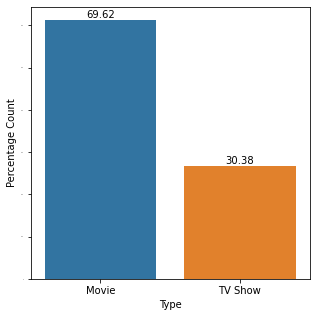

In [17]:
# Understanding the content types available on Netflix Platform
plt.figure(figsize = (5,5))
ax = sns.countplot(data["type"])
label = round((data["type"].value_counts()*100/data["type"].value_counts().sum()),2).values
plt.bar_label(container = ax.containers[0],labels = label)
plt.xlabel("Type", fontsize = 10)
plt.ylabel("Percentage Count", fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 0)
plt.show()

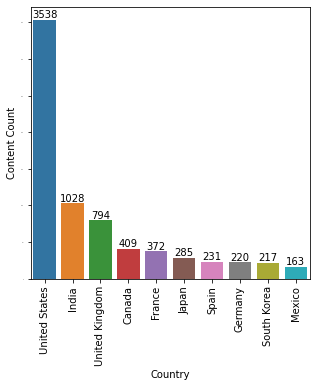

In [18]:
z = data3[["show_id","country"]].drop_duplicates().groupby("country").aggregate(content_count = ("show_id","count")).reset_index().sort_values("content_count", ascending = False)
plt.figure(figsize = (5,5))
ax = sns.barplot(x = z[z["country"]!="Unknown"]["country"][0:10], y = z[z["country"]!="Unknown"]["content_count"][0:10])
plt.bar_label(container = ax.containers[0])
plt.xlabel("Country", fontsize = 10)
plt.ylabel("Content Count", fontsize = 10)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 0)
plt.show()

In [19]:
z1 = data3[["show_id","type","country"]].drop_duplicates().groupby(["country","type"]).aggregate(content_count = ("show_id","count")).sort_values("content_count", ascending = False).reset_index()
z1

,country,type,content_count
0,United States,Movie,2692
1,India,Movie,949
2,United States,TV Show,846
3,United Kingdom,Movie,531
4,Unknown,Movie,382
...,...,...,...
179,Sri Lanka,Movie,1
180,Sudan,Movie,1
181,Lithuania,Movie,1
182,Cayman Islands,Movie,1


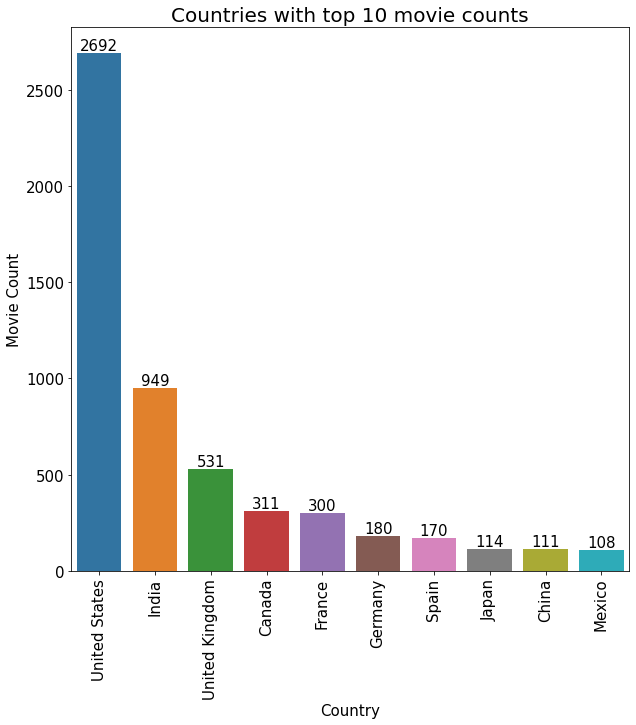

In [20]:
plt.figure(figsize = (10,10))
ax1 = sns.barplot(x = z1[(z1["country"]!="Unknown") & (z1["type"] == "Movie")]["country"][0:10], y = z1[(z1["country"]!="Unknown")& (z1["type"] == "Movie")]["content_count"][0:10])
plt.bar_label(container = ax1.containers[0], fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Movie Count", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title("Countries with top 10 movie counts", fontsize = 20)
plt.show()



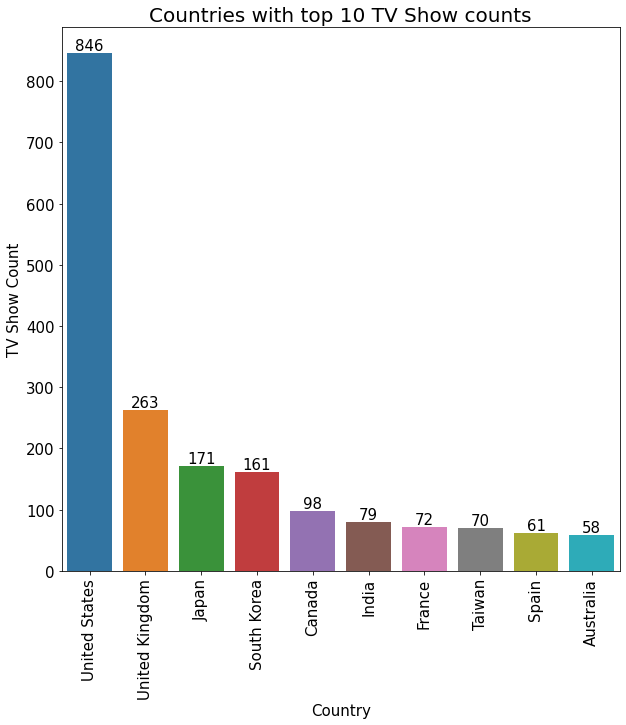

In [21]:
plt.figure(figsize = (10,10))
ax2 = sns.barplot(x = z1[(z1["country"]!="Unknown")& (z1["type"] == "TV Show")]["country"][0:10], y = z1[(z1["country"]!="Unknown")& (z1["type"] == "TV Show")]["content_count"][0:10])
plt.bar_label(container = ax2.containers[0], fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("TV Show Count", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title("Countries with top 10 TV Show counts", fontsize = 20)
plt.show()

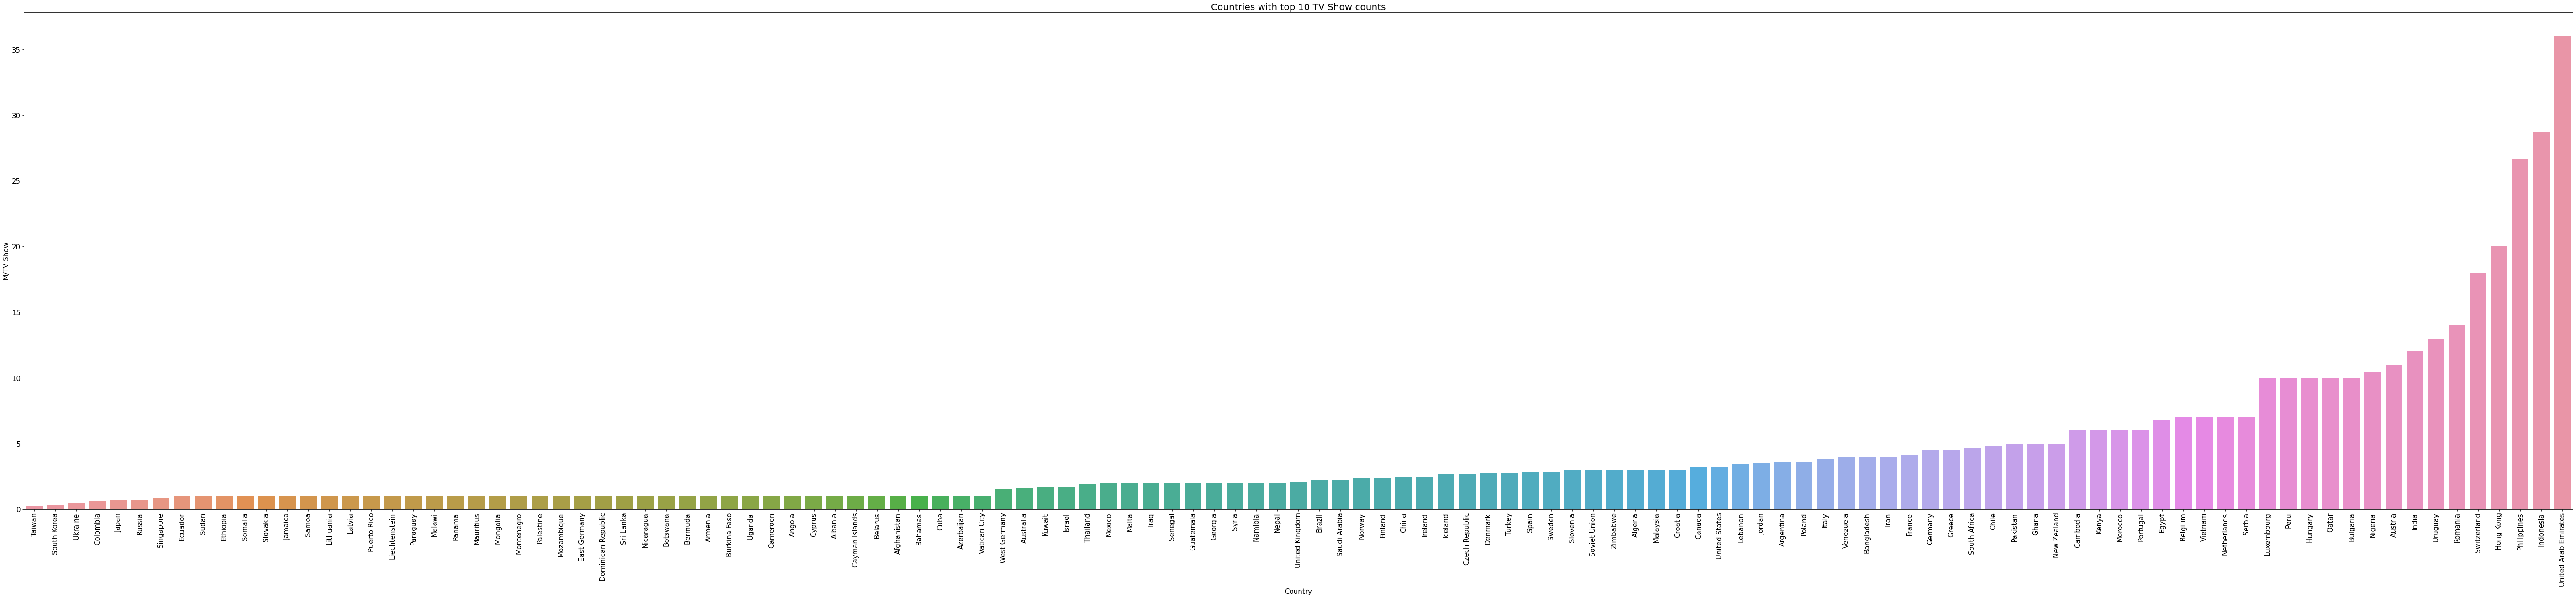

In [22]:
z2 = z1.pivot(index = "country", columns = "type", values = "content_count").reset_index()
z2.loc[z2["country"] == '',"country"] = "Unknown"
# As devision by zero is not defined, for countries where no movi content or TV Show content is releases, the count is increased
# by 1 to avoid zero division error
z2["TV Show"].fillna(1, inplace = True)
z2["Movie"].fillna(1, inplace = True)
z2["M/TV Show"] = z2["Movie"]/z2["TV Show"]
z2.sort_values("M/TV Show", inplace = True)
plt.figure(figsize = (100,20))
ax = sns.barplot(x = z2[z2["country"] != "Unknown"]["country"], y = z2[z2["country"]!= "Unknown"]["M/TV Show"])
#plt.bar_label(container = ax.containers[0], fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("M/TV Show", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title("Countries with top 10 TV Show counts", fontsize = 20)
plt.show()

C:\Users\awani\AppData\Local\Temp/ipykernel_15952/351570473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3["year_added"] = z3["date_added"].dt.year
C:\Users\awani\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


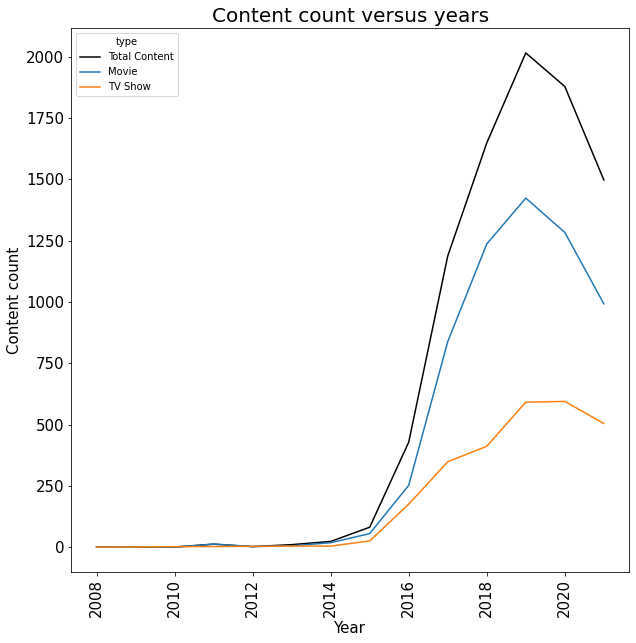

In [23]:
z3 = data[["show_id","country", "type","date_added"]]
z3["year_added"] = z3["date_added"].dt.year
z3.dropna(subset = ["date_added"], inplace = True)
total_content_by_yr = z3.groupby(["year_added"]).aggregate(content_count = ("show_id","count")).sort_values("year_added").reset_index()
all_content_by_yr = z3.groupby(["year_added","type"]).aggregate(content_count = ("show_id", "count")).sort_values("year_added").reset_index()
# Data where date on which the content was added is not available has been dropped.
plt.figure(figsize = (10,10))
sns.lineplot(x = total_content_by_yr["year_added"].astype(int), y = total_content_by_yr["content_count"], label = "Total Content", color = 'black')
#plt.label(ax.containers[0])
#sns.lineplot(x = total_content_by_yr[total_content_by_yr["type"] == "Movie"]["year_added"], y = total_content_by_yr[total_content_by_yr["type"] == "Movie"]["content_count"], label = "Total Content")
sns.lineplot(x = all_content_by_yr["year_added"].astype(int), y = all_content_by_yr["content_count"], hue = all_content_by_yr["type"] )
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Content count", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title("Content count versus years", fontsize = 20)
plt.show()

Please enter the name of CountryIndia


C:\Users\awani\AppData\Local\Temp/ipykernel_15952/2832148262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3["year_added"] = z3["date_added"].dt.year
C:\Users\awani\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


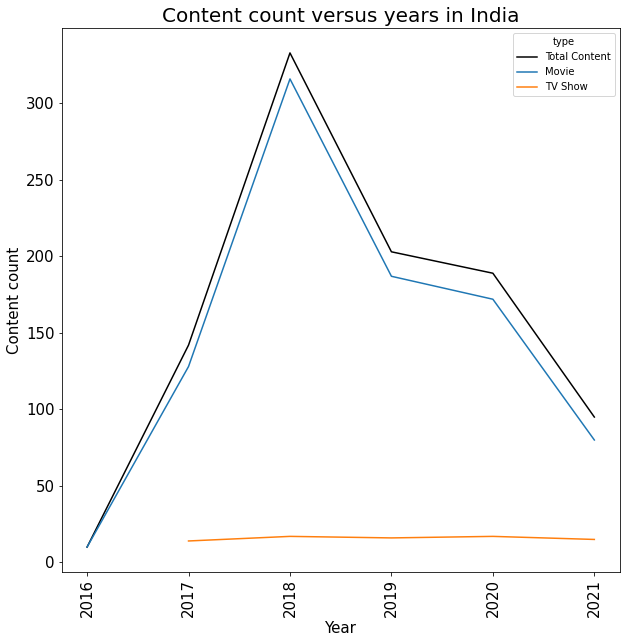

In [24]:
# Getting content distribution over years for different countries
j = input("Please enter the name of Country")
z3 = data[["show_id","country", "type","date_added"]]
z3["year_added"] = z3["date_added"].dt.year
z3.dropna(subset = ["date_added"], inplace = True)
z3 = z3.loc[z3["country"] == j, ::]
total_content_by_yr = z3.groupby(["year_added"]).aggregate(content_count = ("show_id","count")).sort_values("year_added").reset_index()
all_content_by_yr = z3.groupby(["year_added","type"]).aggregate(content_count = ("show_id", "count")).sort_values("year_added").reset_index()
# Data where date on which the content was added is not available has been dropped.
plt.figure(figsize = (10,10))
sns.lineplot(x = total_content_by_yr["year_added"].astype(int), y = total_content_by_yr["content_count"], label = "Total Content", color = 'black')
#plt.label(ax.containers[0])
#sns.lineplot(x = total_content_by_yr[total_content_by_yr["type"] == "Movie"]["year_added"], y = total_content_by_yr[total_content_by_yr["type"] == "Movie"]["content_count"], label = "Total Content")
sns.lineplot(x = all_content_by_yr["year_added"].astype(int), y = all_content_by_yr["content_count"], hue = all_content_by_yr["type"] )
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Content count", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title(f"Content count versus years in {j}", fontsize = 20)
plt.show()

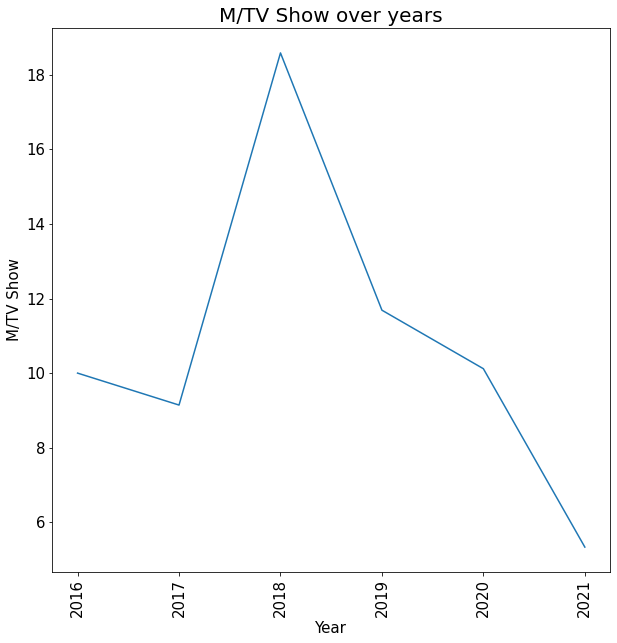

In [25]:
z4= all_content_by_yr.pivot(index = "year_added", columns = "type").reset_index()
z4.columns = ["year_added", "movie_count", "TV_Show_Count"]
z4["movie_count"].fillna(1,inplace = True)
z4["TV_Show_Count"].fillna(1,inplace = True)
z4["M/TV Show"]= z4["movie_count"]/z4["TV_Show_Count"]
plt.figure(figsize = (10,10))
ax = sns.lineplot(x = z4["year_added"], y = z4["M/TV Show"])
plt.xlabel("Year", fontsize = 15)
plt.ylabel("M/TV Show", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title("M/TV Show over years", fontsize = 20)
plt.show()

Please enter the name of the countryIndia


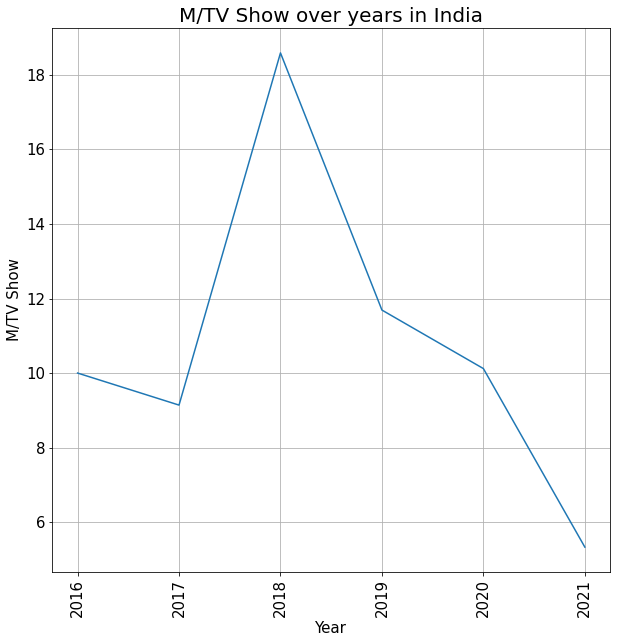

,year,movie_count,tv_show_count,M/TV Show
0,2016.0,10.0,1.0,10.00
1,2017.0,128.0,14.0,9.14
2,2018.0,316.0,17.0,18.59
3,2019.0,187.0,16.0,11.69
4,2020.0,172.0,17.0,10.12
5,2021.0,80.0,15.0,5.33


In [26]:
# Plotting movie M/TV Show ratio for different countries
j = input("Please enter the name of the country")
z5 = z3.loc[z3["country"] == j].groupby(["year_added","type"]).aggregate(content_count = ("show_id", "count")).sort_values("year_added").reset_index()
z6 = z5.pivot(index = "year_added", columns = "type", values = "content_count").reset_index()
z6.fillna(1, inplace = True)
z6.columns = ["year","movie_count", "tv_show_count"]
z6["M/TV Show"] = round(z6["movie_count"]/z6["tv_show_count"],2)
plt.figure(figsize = (10,10))
sns.lineplot(x = z6["year"], y = z6["M/TV Show"])
plt.xlabel("Year", fontsize = 15)
plt.ylabel("M/TV Show", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title(f"M/TV Show over years in {j}", fontsize = 20)
plt.grid()
plt.show()
z6

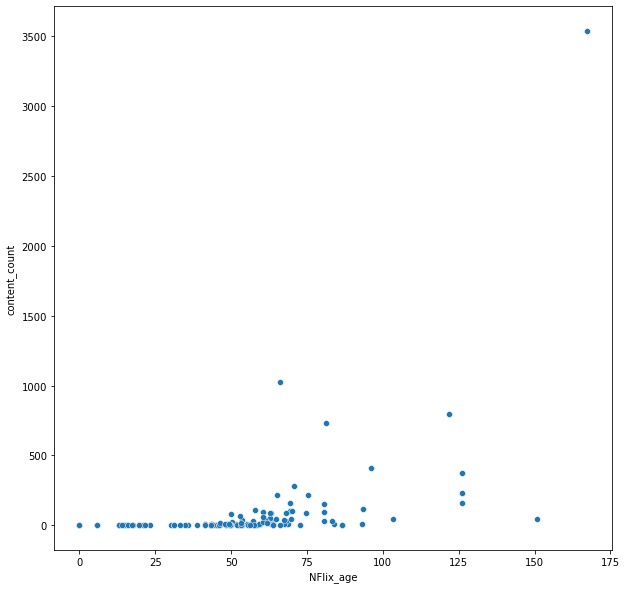

In [27]:
z7 = data5[["country","show_id","NFlix_age"]].drop_duplicates()
z8 = z7.groupby(["country"]).aggregate(content_count = ("show_id", "count"), NFlix_age = ("NFlix_age","mean")).reset_index()
z8.loc[z8["country"] == '',"country"] = "Unknown"
plt.figure(figsize = (10,10))
sns.scatterplot(x = z8["NFlix_age"], y = z8["content_count"])
plt.show()

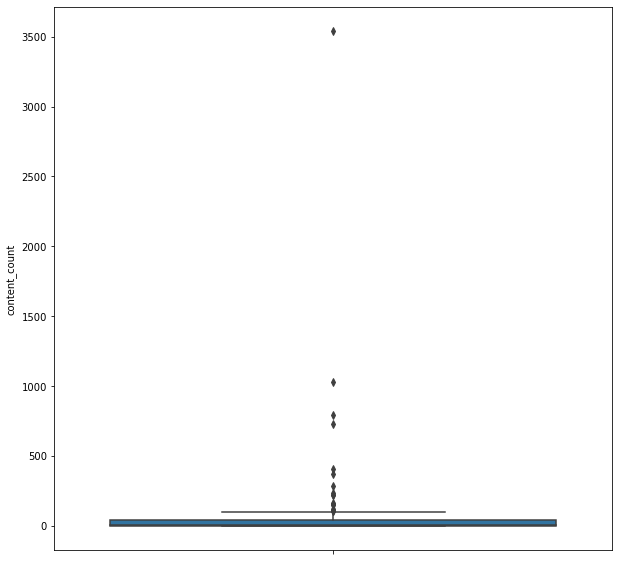

In [28]:
plt.figure(figsize = (10,10))
sns.boxplot(y = z8["content_count"])
plt.show()

In [29]:
np.percentile(z8["content_count"], q = [25,50,75])

array([ 1. ,  6. , 41.5])

In [30]:
len(z8[z8["content_count"] > 104])

16

In [31]:
z8[z8["content_count"] > 104]["country"]

7           Australia
21             Canada
24              China
34              Egypt
37             France
39            Germany
43          Hong Kong
46              India
54              Japan
67             Mexico
100       South Korea
102             Spain
110            Turkey
114    United Kingdom
115     United States
116           Unknown
Name: country, dtype: object

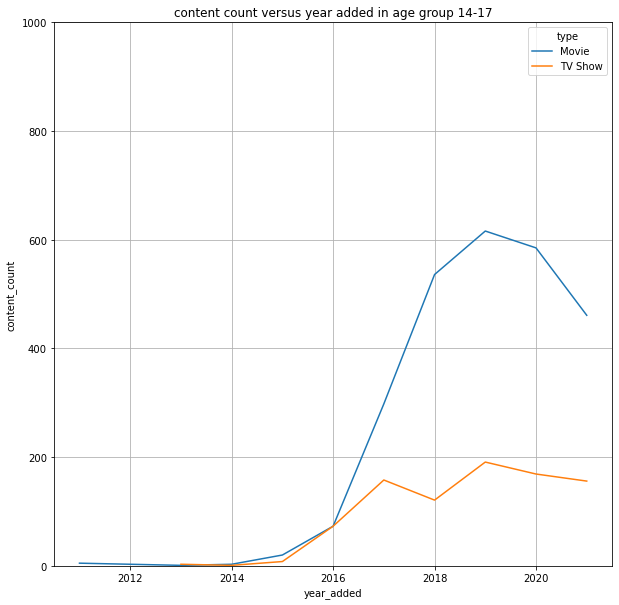

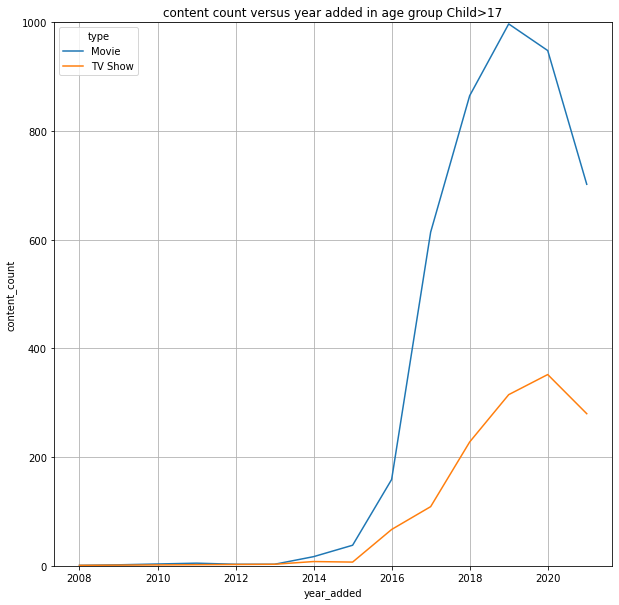

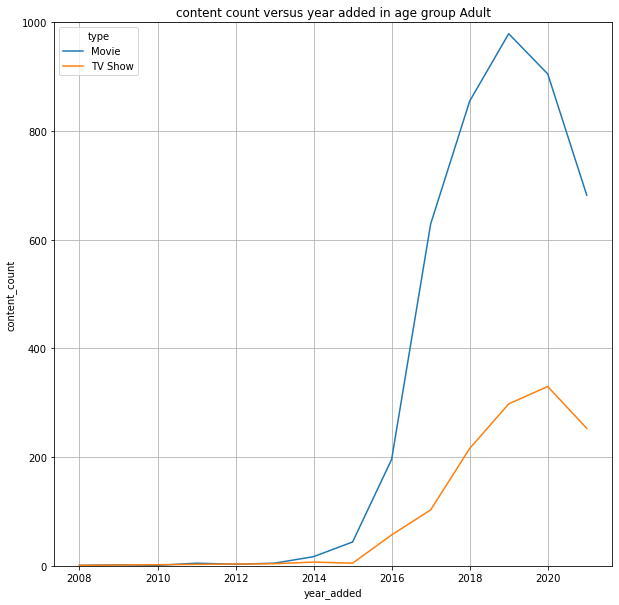

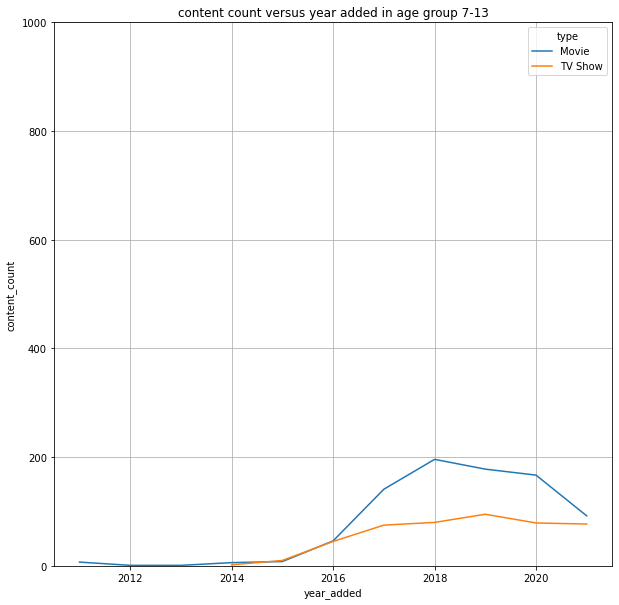

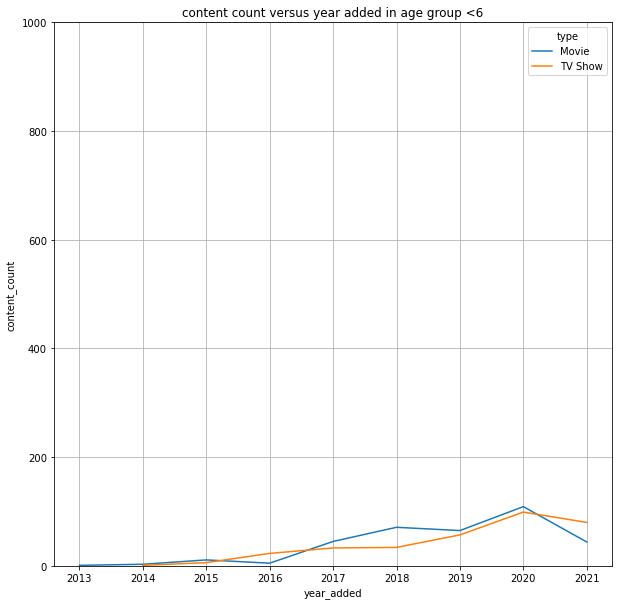

In [32]:
# Getting the count of contents released for different age groups in different years
for i in data4["agegroup"].unique():
    z7 = data4.loc[data4["agegroup"] == i, ["show_id","country","date_added","type"]].drop_duplicates()
    z7["year_added"] = z7["date_added"].dt.year
    z8 = z7.groupby(["year_added","type"]).aggregate(content_count = ("show_id", "count")).reset_index()
    plt.figure(figsize = (10,10))
    sns.lineplot(x = z8["year_added"], y = z8["content_count"], hue = z8["type"],ci = None)
    plt.ylim(0,1000)
    plt.title(f"content count versus year added in age group {i}")    
    plt.grid()
    plt.show()
    

Please enter the country nameIndia


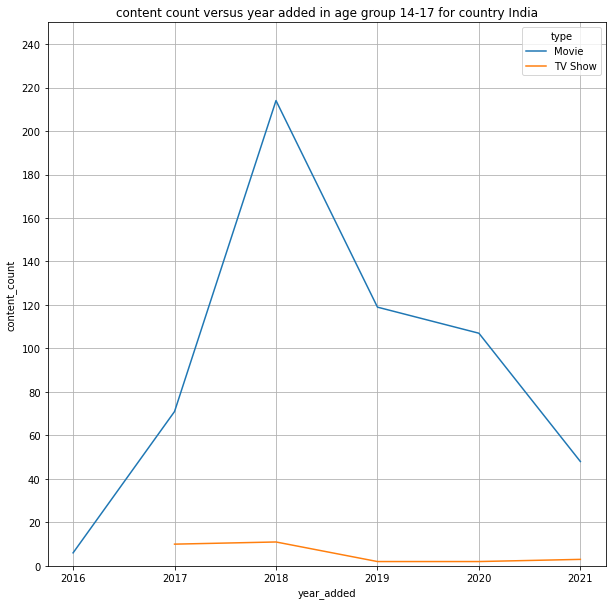

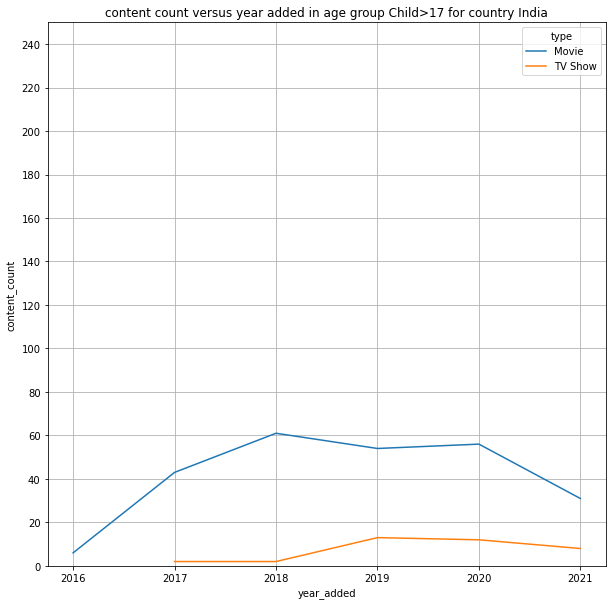

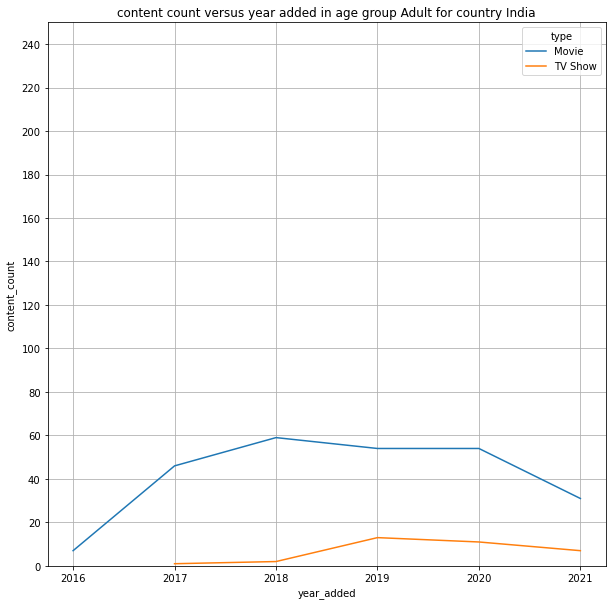

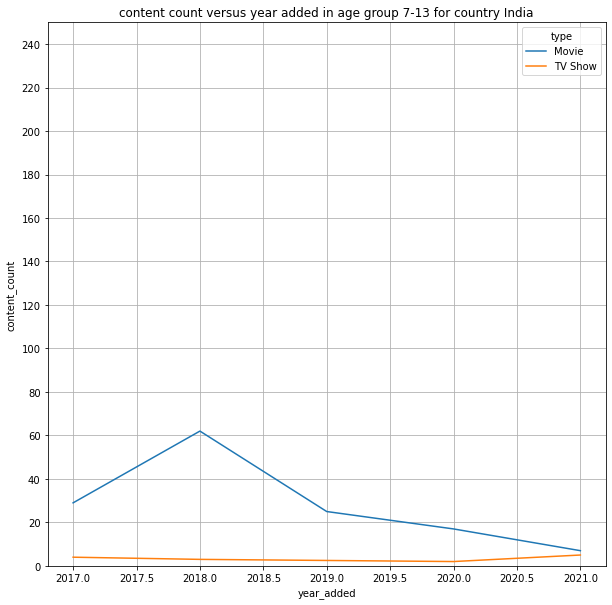

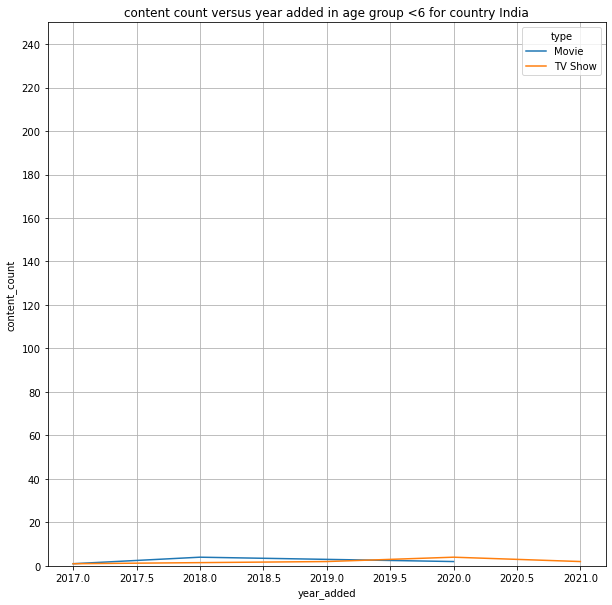

In [33]:
# Getting the count of contents released for different age groups in different years based on country input from user
j = input("Please enter the country name")
for i in data4["agegroup"].unique():
    z7 = data4.loc[(data4["agegroup"] == i) & (data4["country"] == j) , ["show_id","date_added","type"]].drop_duplicates()
    z7["year_added"] = z7["date_added"].dt.year
    z8 = z7.groupby(["year_added","type"]).aggregate(content_count = ("show_id", "count")).reset_index()
    plt.figure(figsize = (10,10))
    sns.lineplot(x = z8["year_added"], y = z8["content_count"], hue = z8["type"],ci = None)
    plt.ylim(0,250)
    plt.yticks(list(range(0,250,20)))
    plt.grid()
    plt.title(f"content count versus year added in age group {i} for country {j}")    
    plt.show()
    

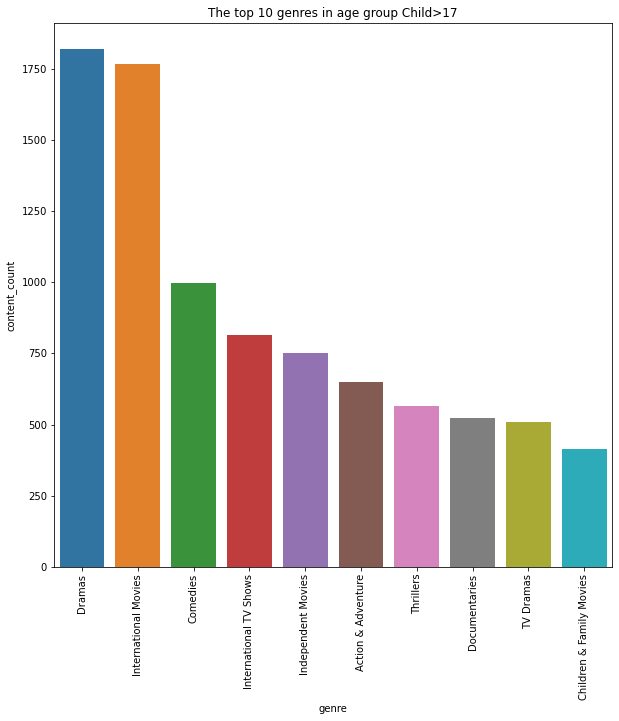

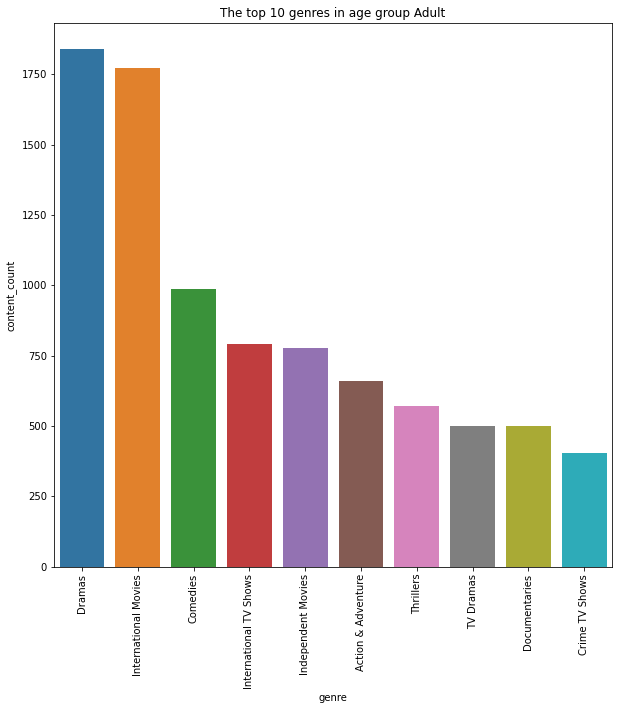

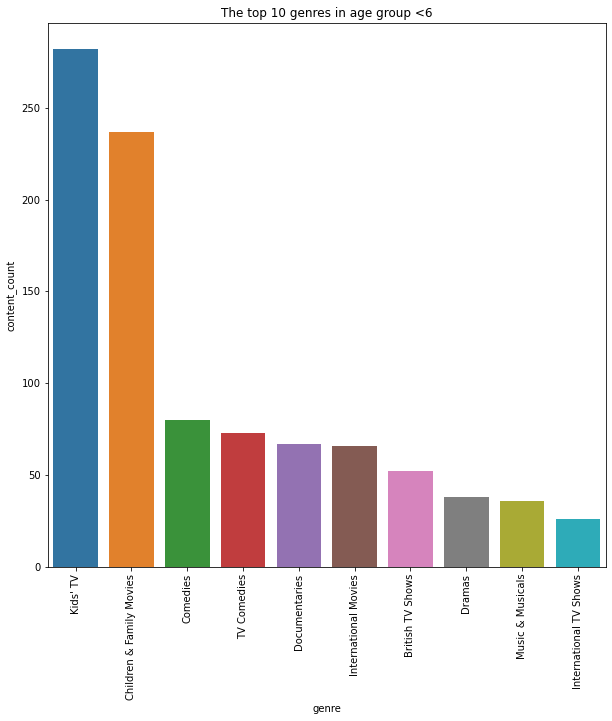

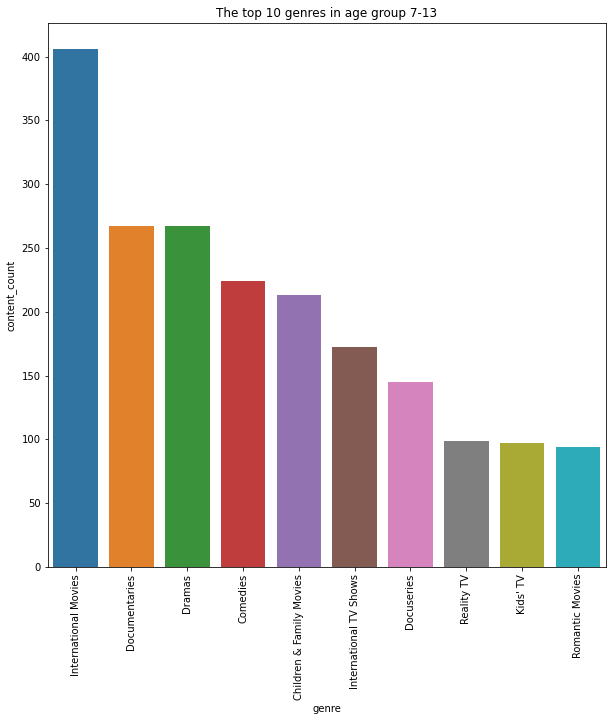

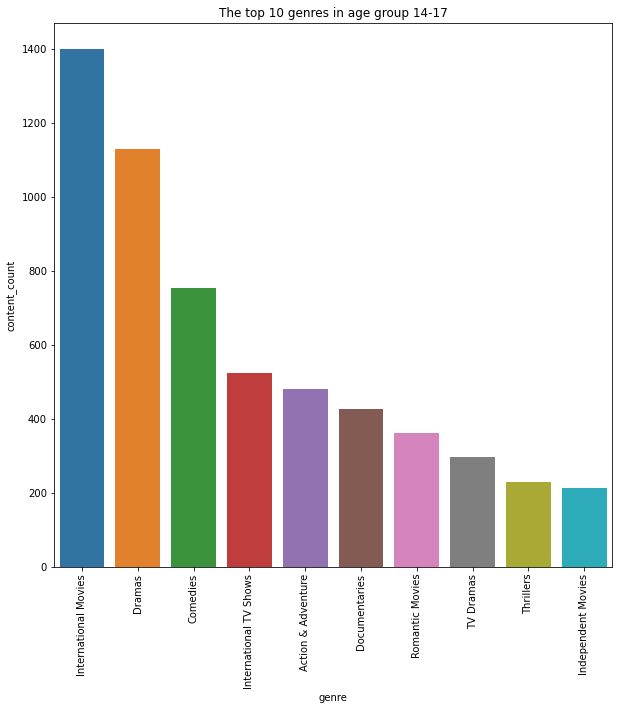

In [34]:
z9 = data4[["show_id","genre","agegroup","country"]].drop_duplicates()
z10= z9.groupby(["agegroup","genre"]).aggregate(content_count = ("show_id","count")).sort_values(["agegroup","content_count"], ascending = [False, False]).reset_index()
for i in z10["agegroup"].unique():
    plt.figure(figsize = (10,10))
    sns.barplot(x = z10.loc[z10["agegroup"] == i, "genre"][0:10], y = z10.loc[z10["agegroup"] == i, "content_count"][0:10])
    plt.title(f"The top 10 genres in age group {i}")
    plt.xticks(rotation = 90)
    plt.show()


Enter the country nameIndia


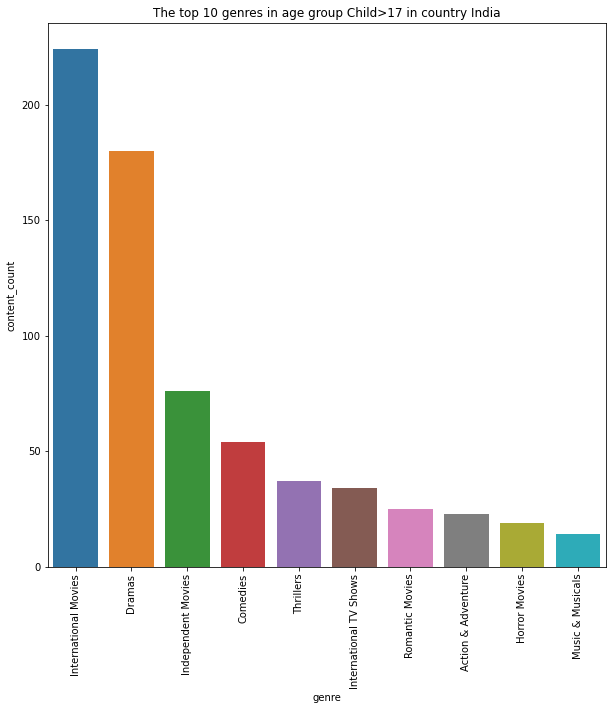

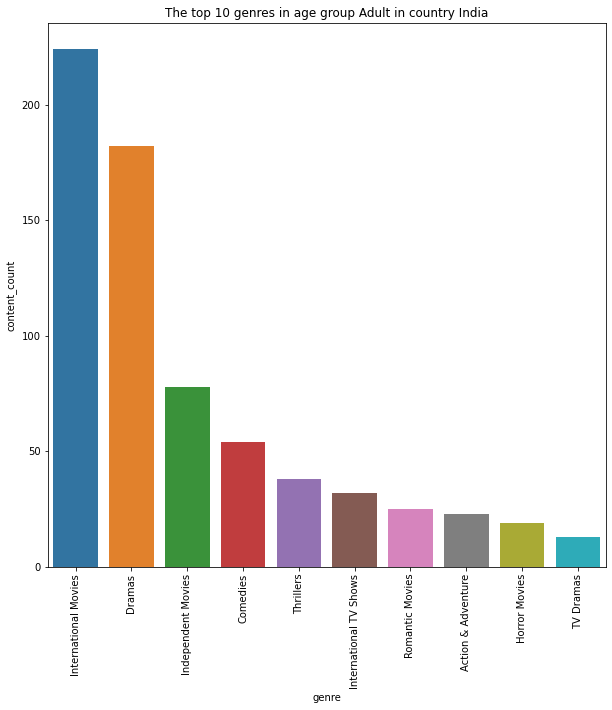

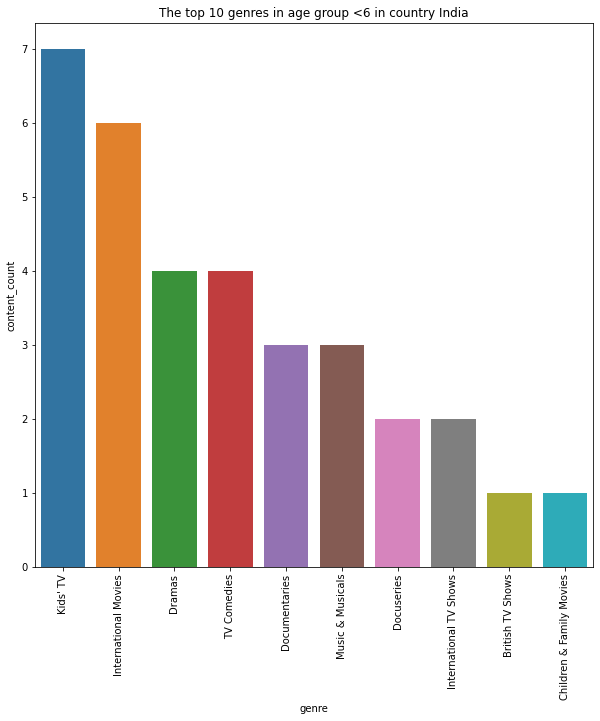

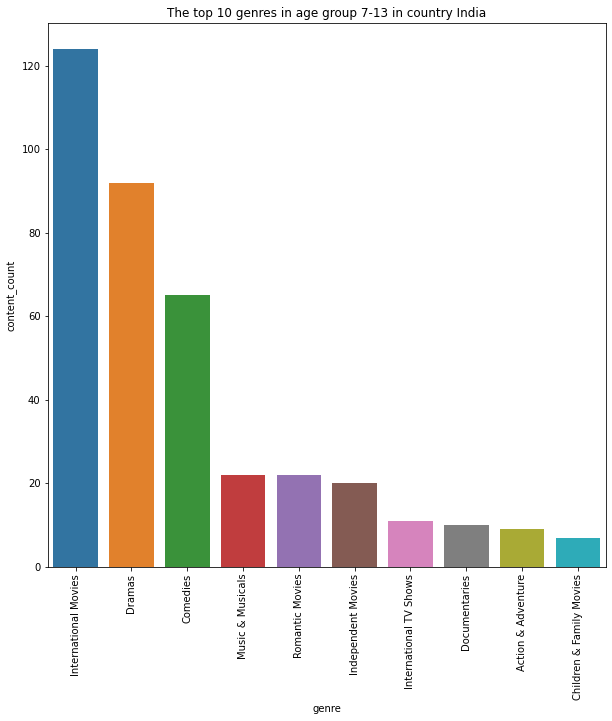

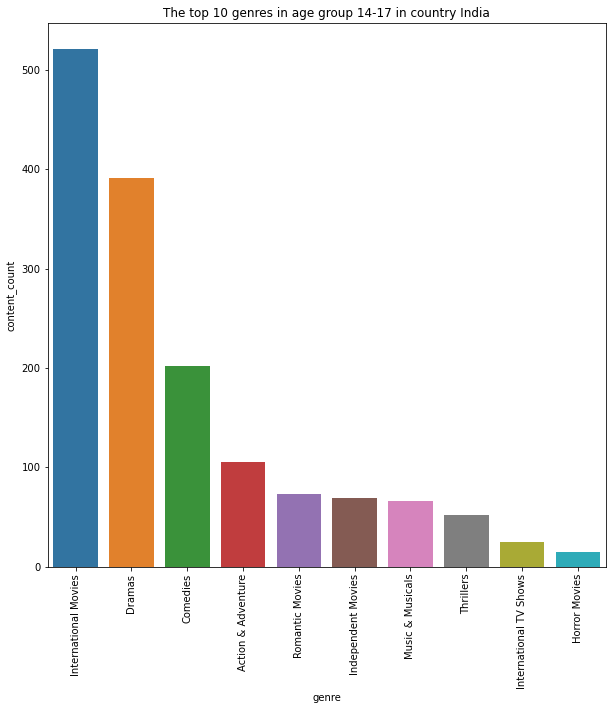

In [35]:
j = input("Enter the country name")
z9 = data4.loc[data4["country"] == j, ["show_id","genre","agegroup","country"]].drop_duplicates()
z10= z9.groupby(["agegroup","genre"]).aggregate(content_count = ("show_id","count")).sort_values(["agegroup","content_count"], ascending = [False, False]).reset_index()
for i in z10["agegroup"].unique():
    plt.figure(figsize = (10,10))
    sns.barplot(x = z10.loc[z10["agegroup"] == i, "genre"][0:10], y = z10.loc[z10["agegroup"] == i, "content_count"][0:10])
    plt.title(f"The top 10 genres in age group {i} in country {j}")
    plt.xticks(rotation = 90)
    plt.show()

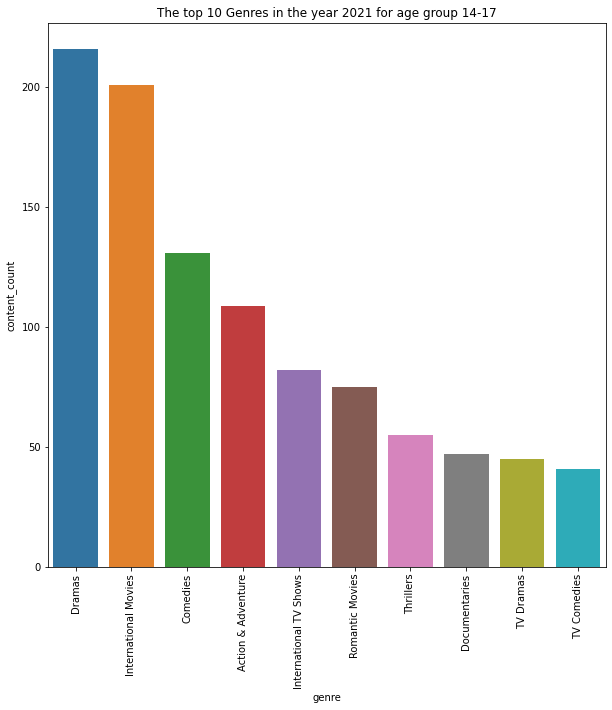

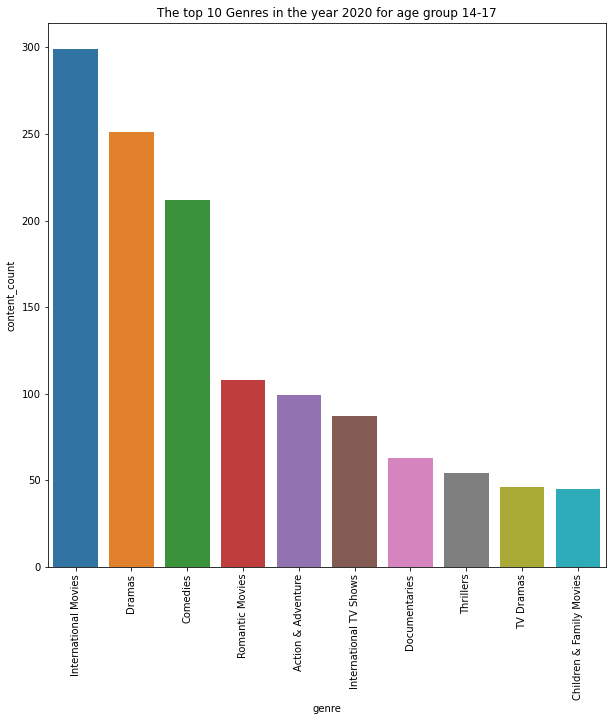

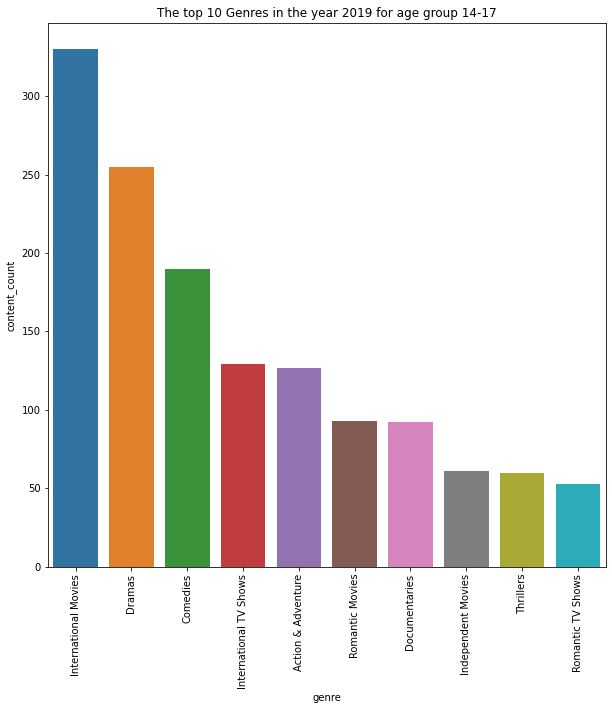

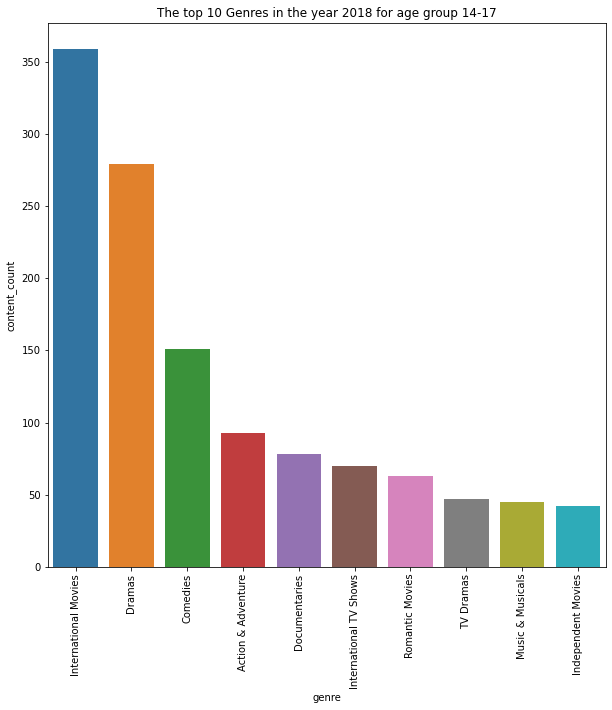

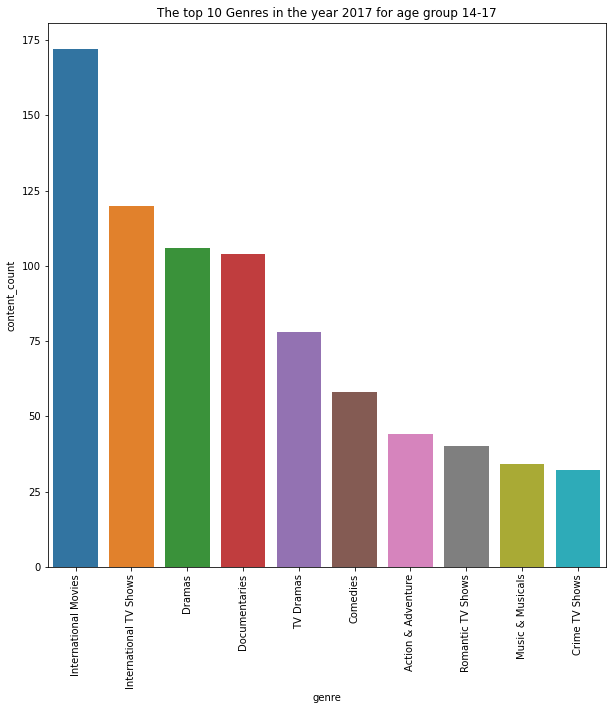

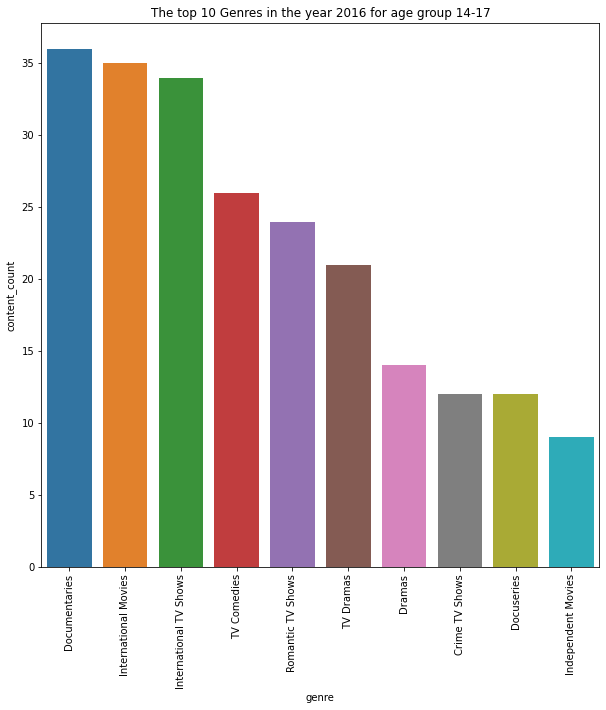

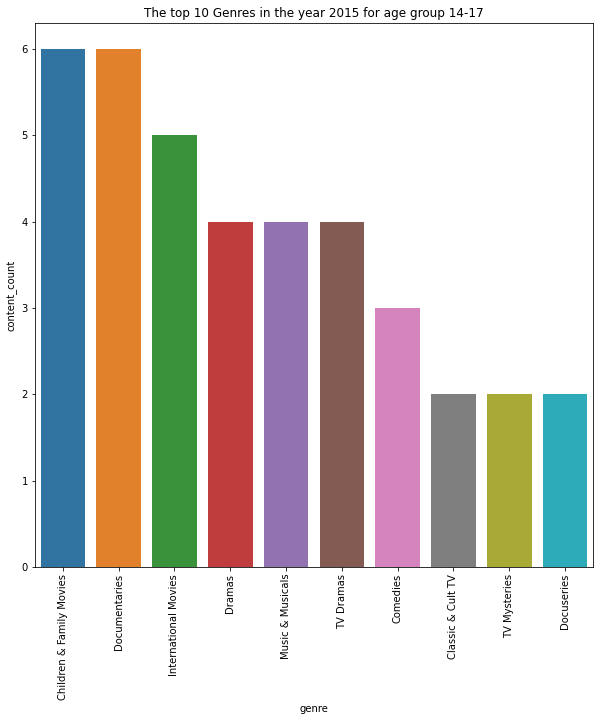

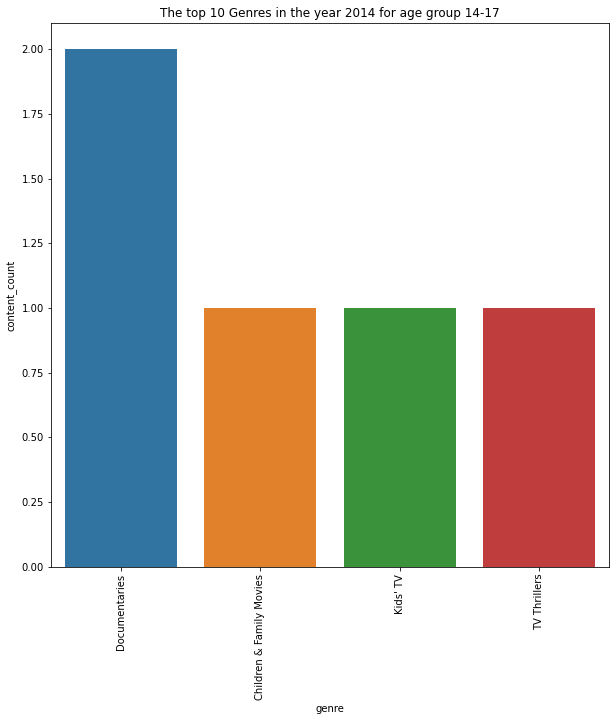

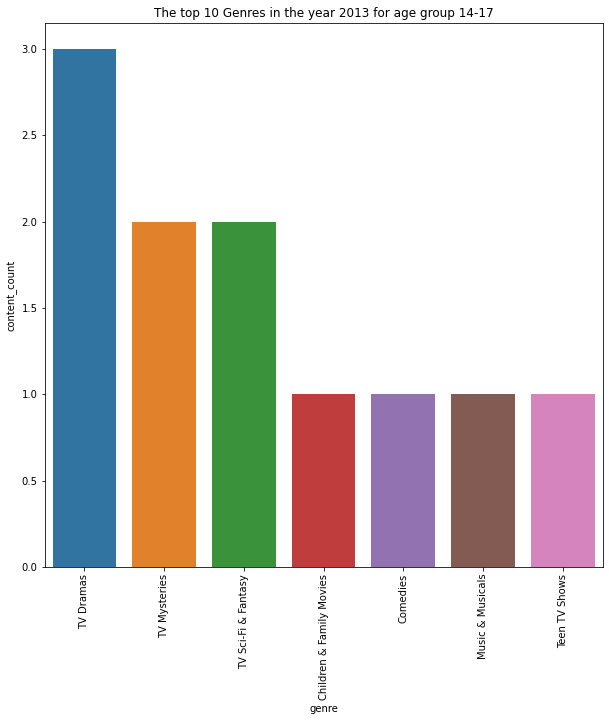

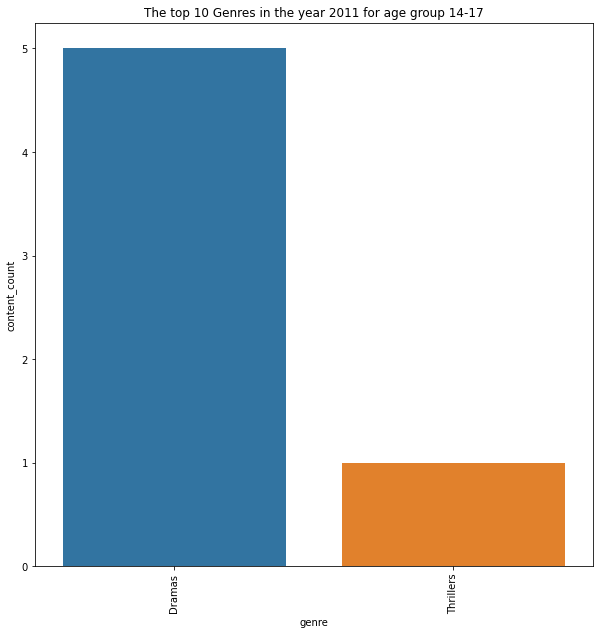

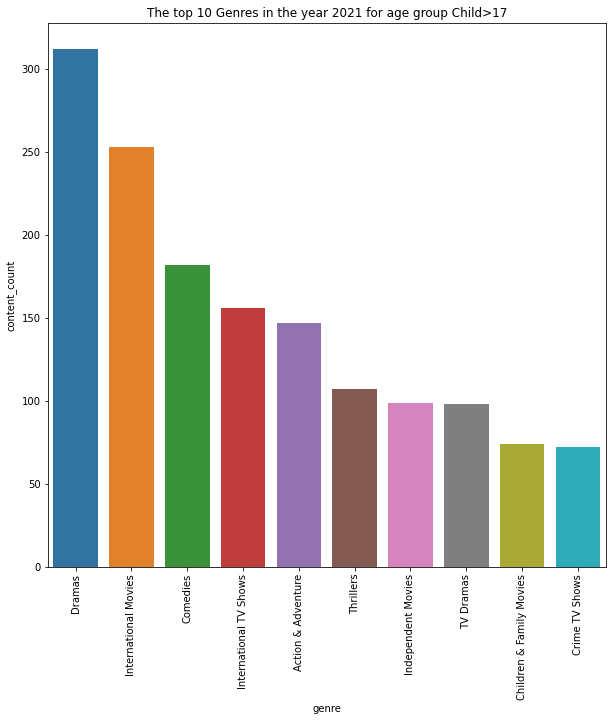

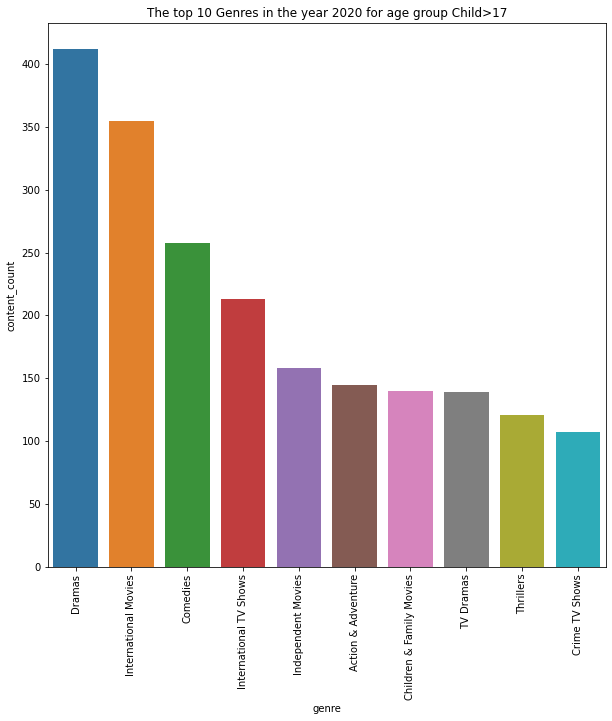

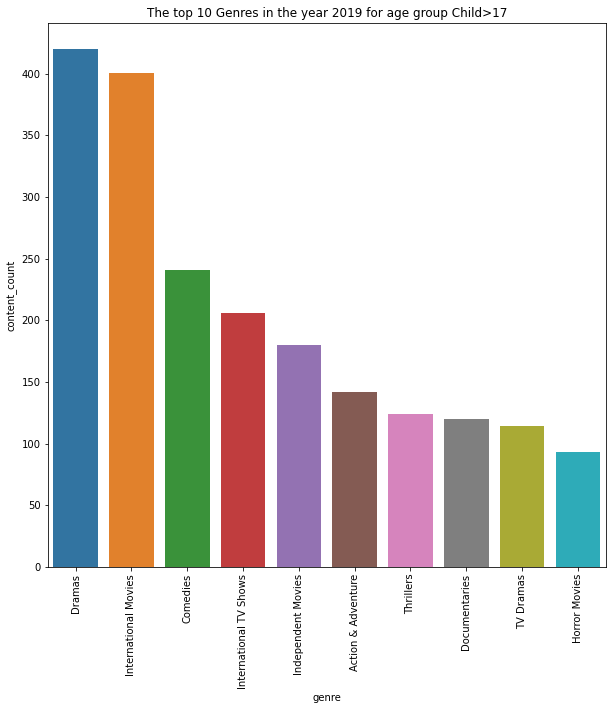

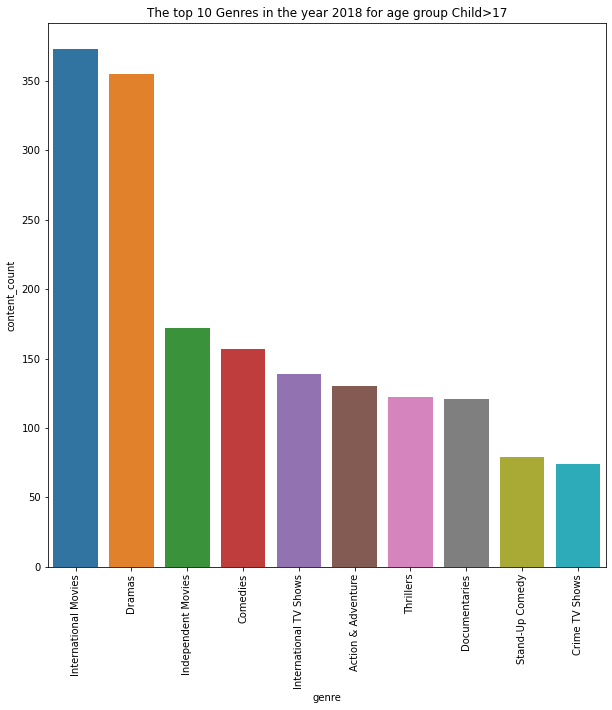

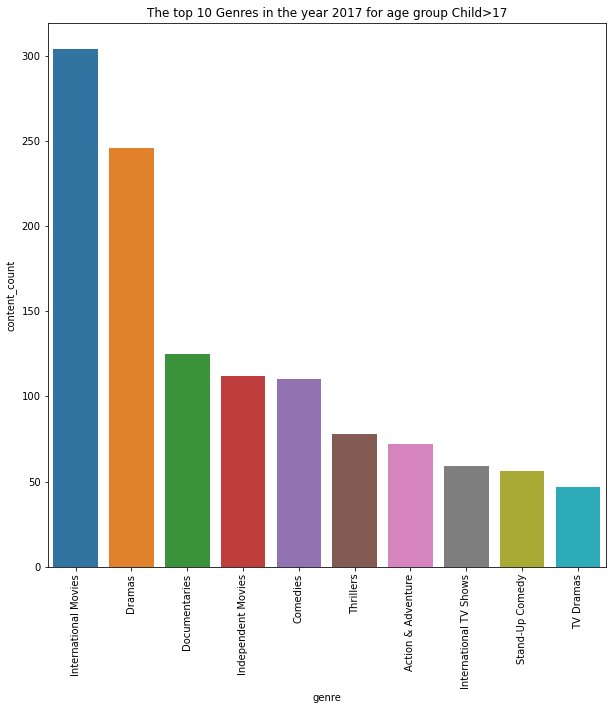

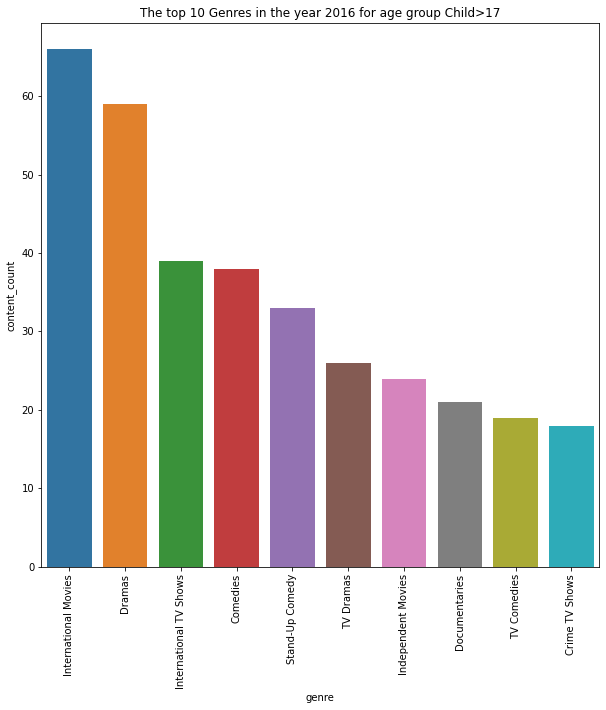

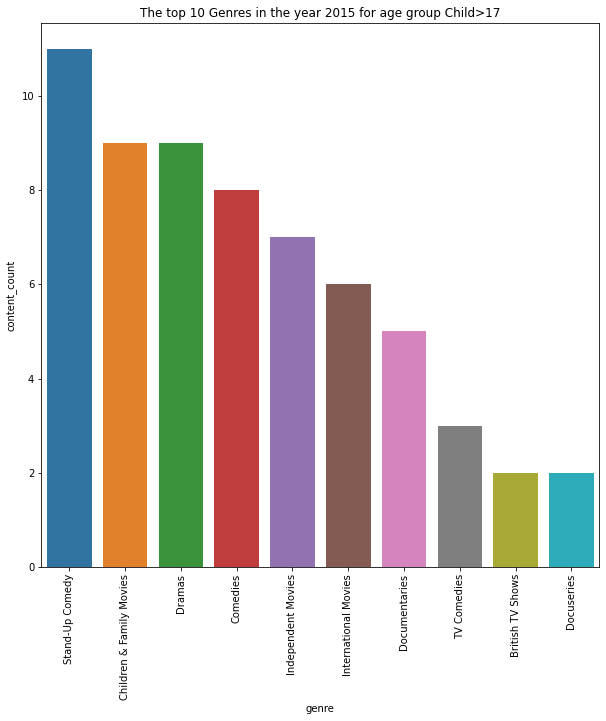

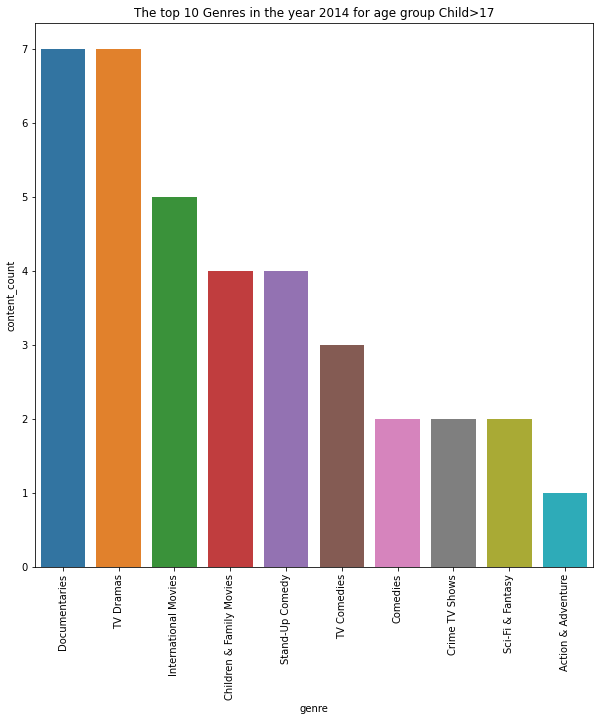

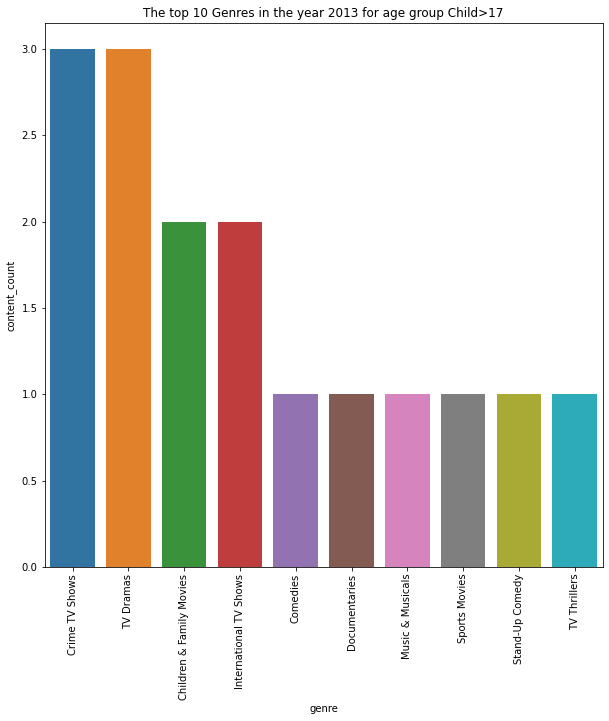

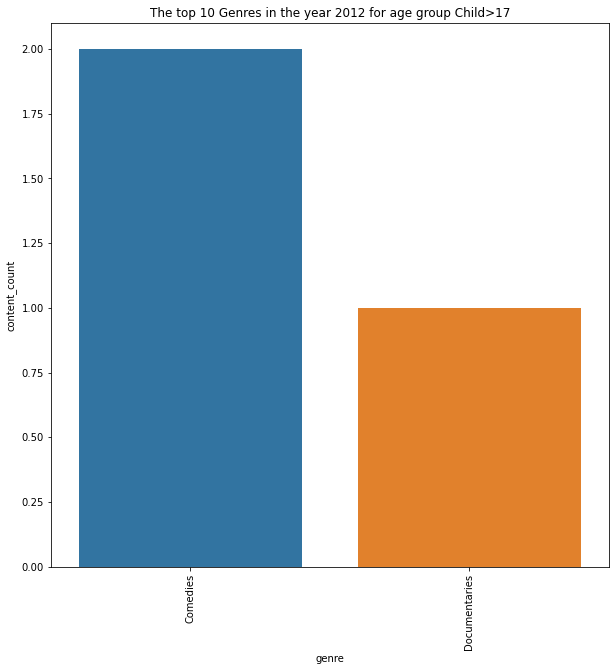

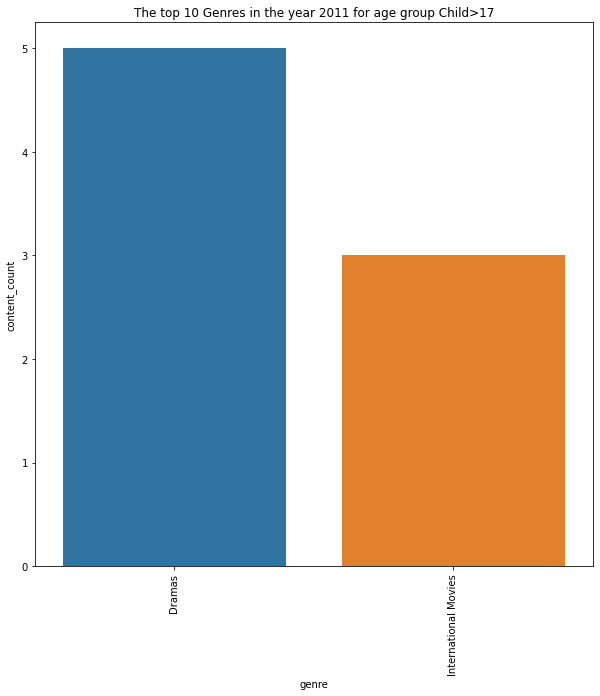

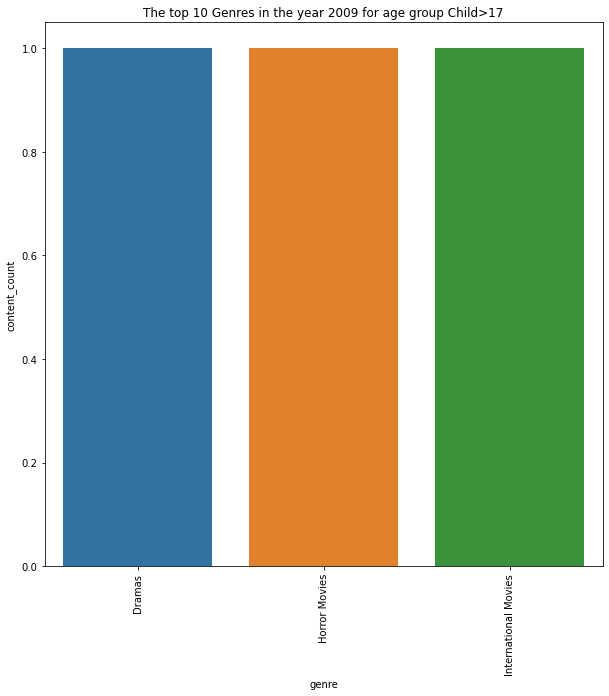

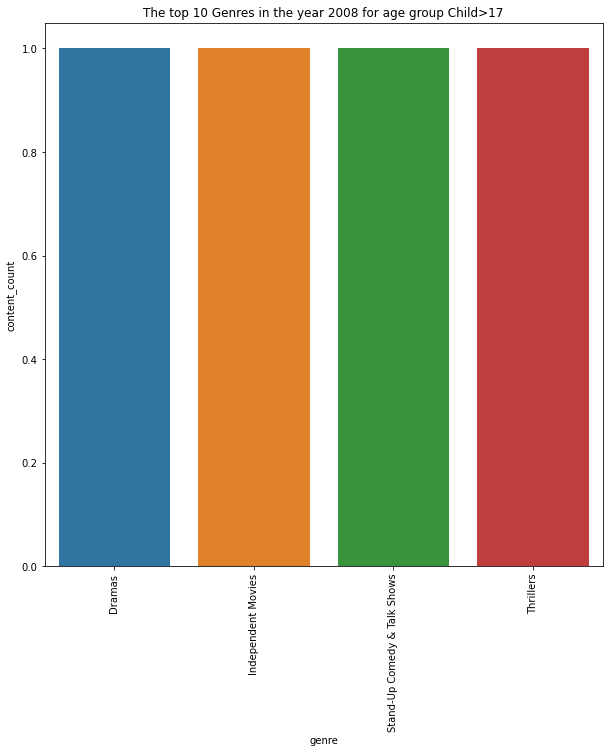

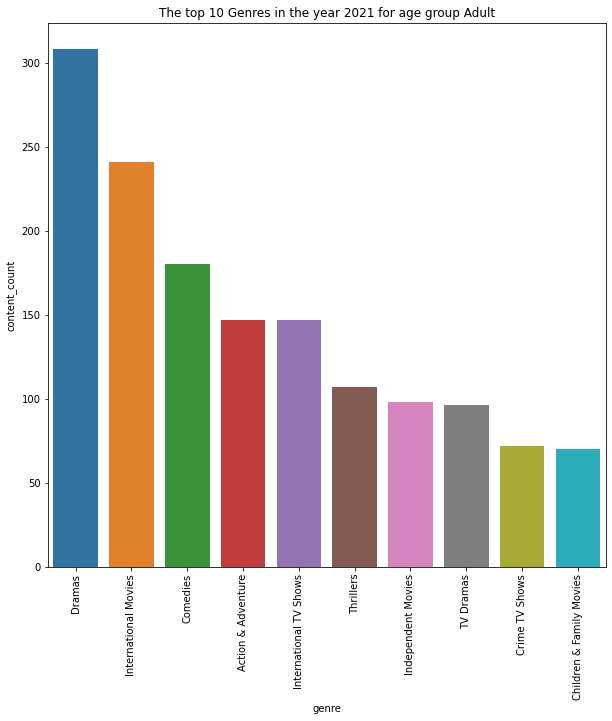

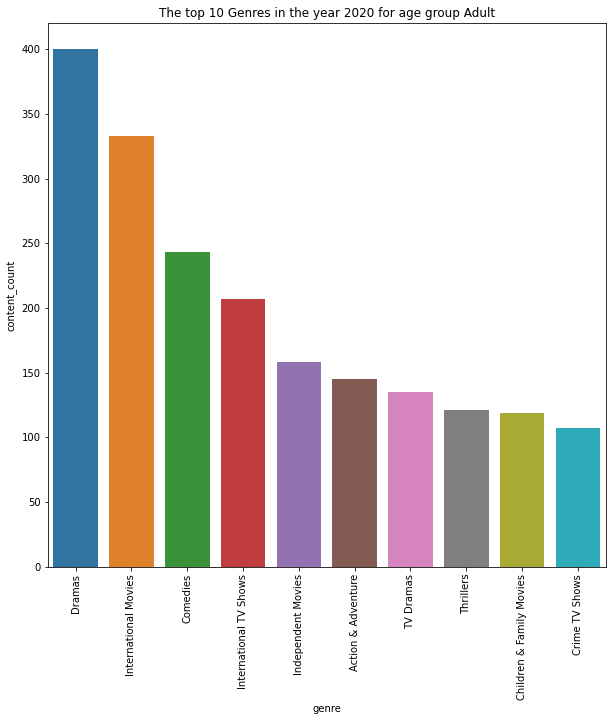

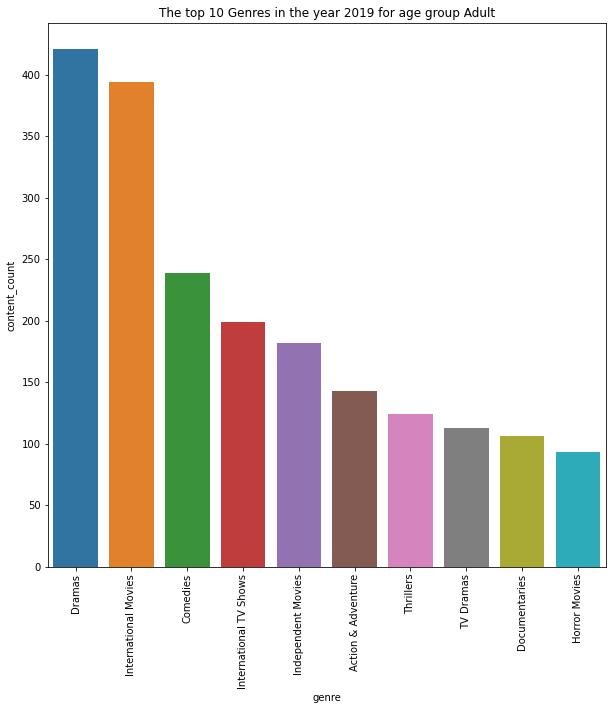

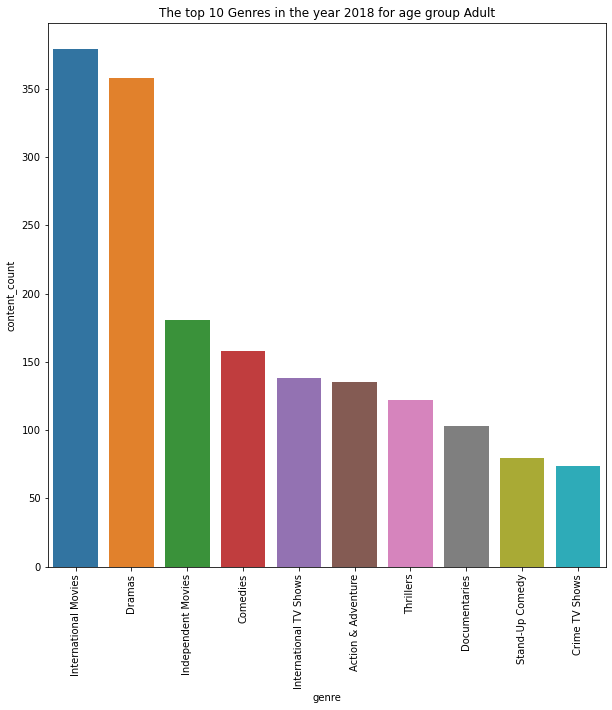

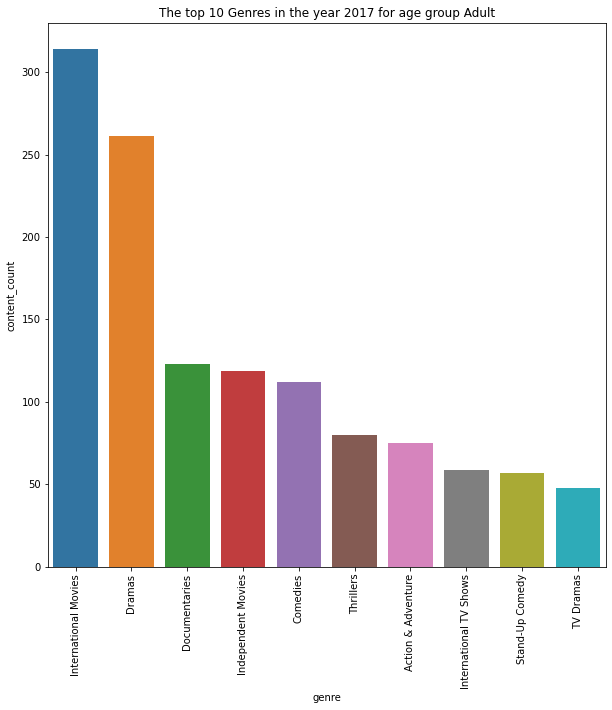

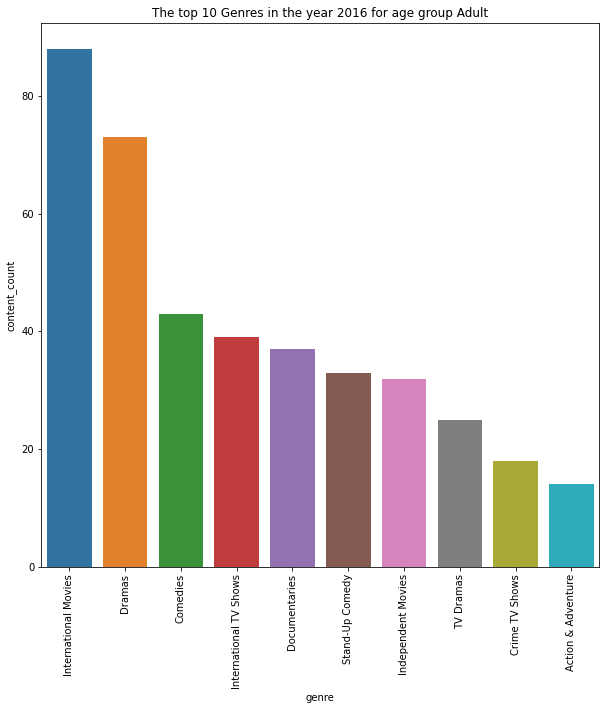

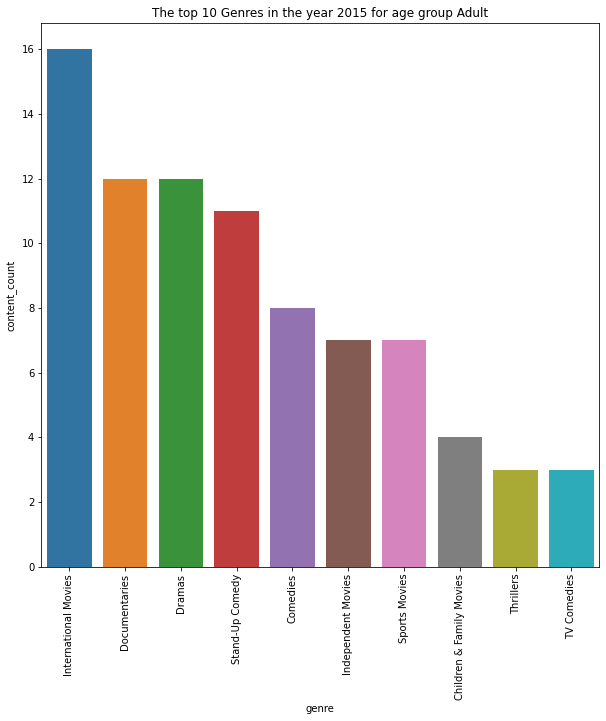

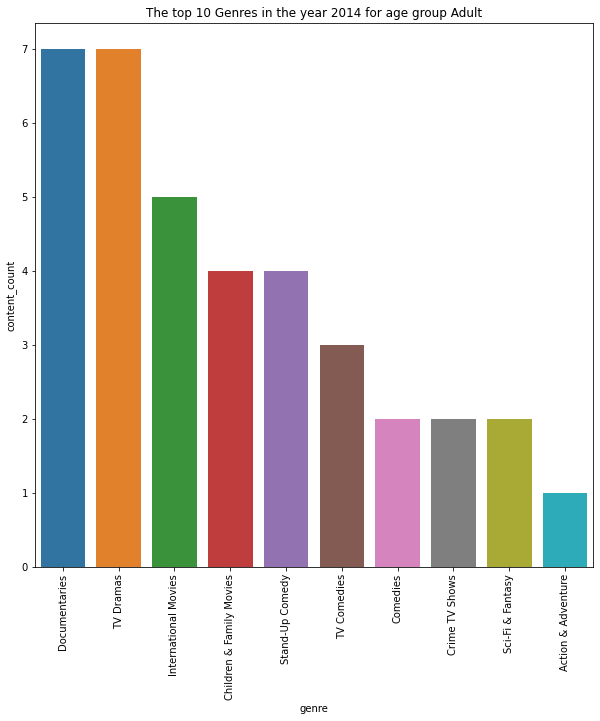

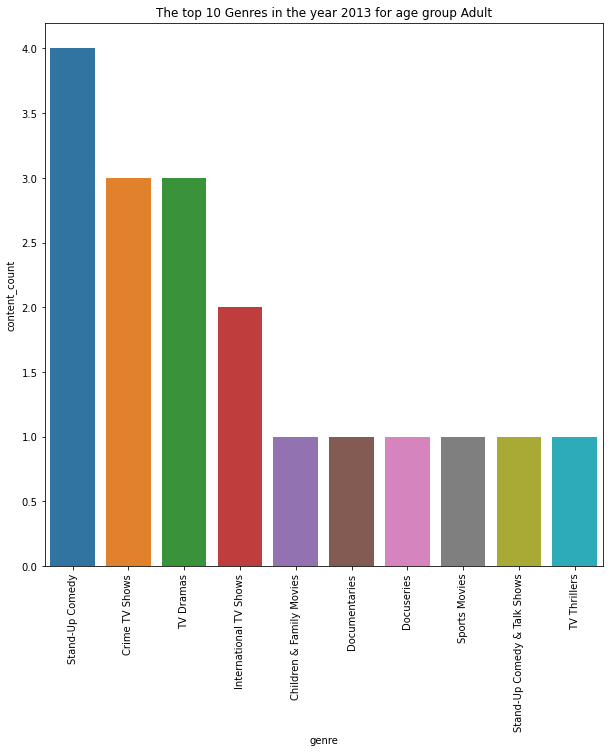

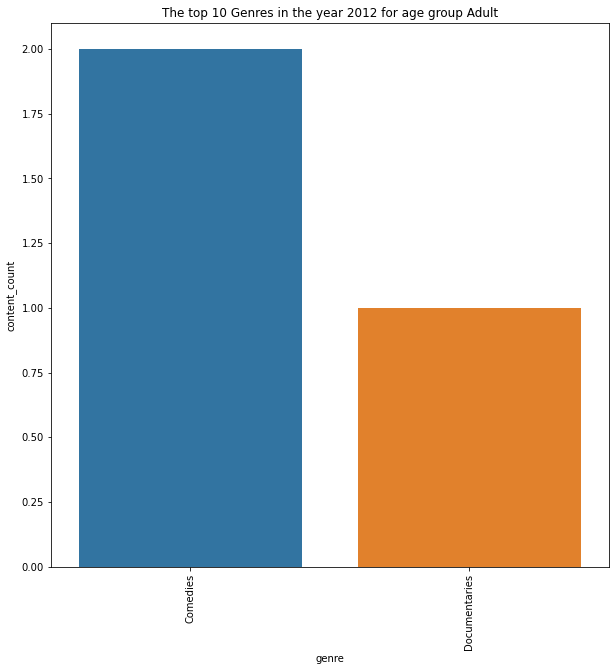

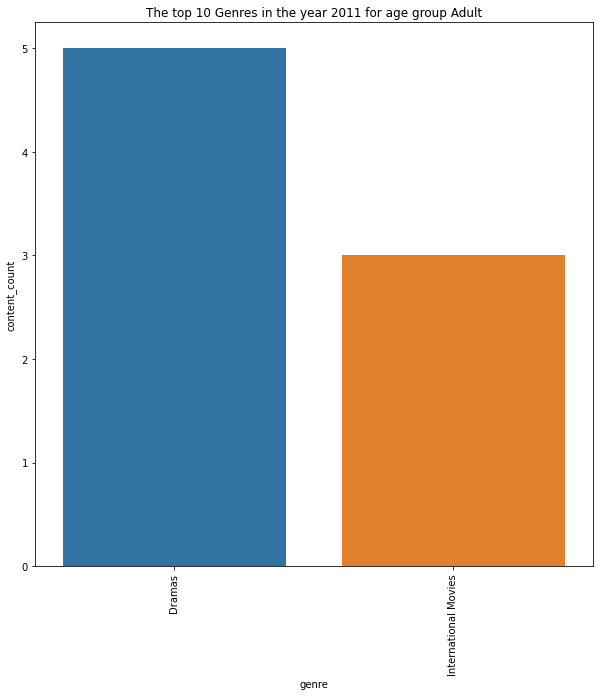

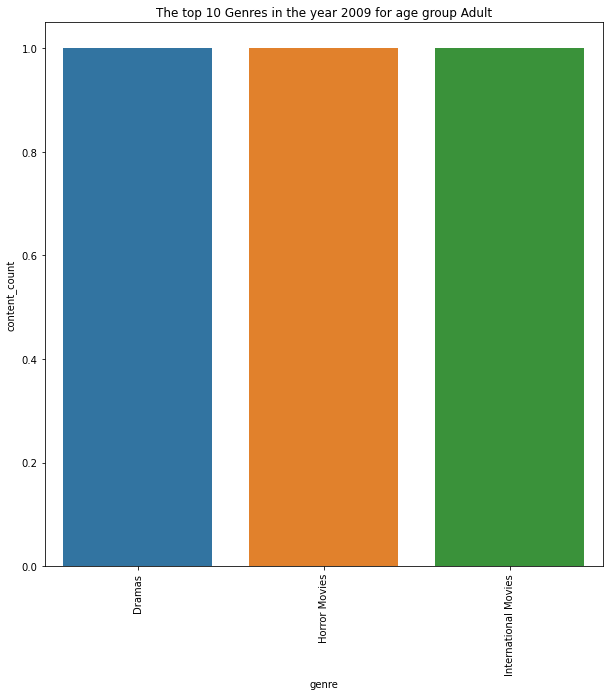

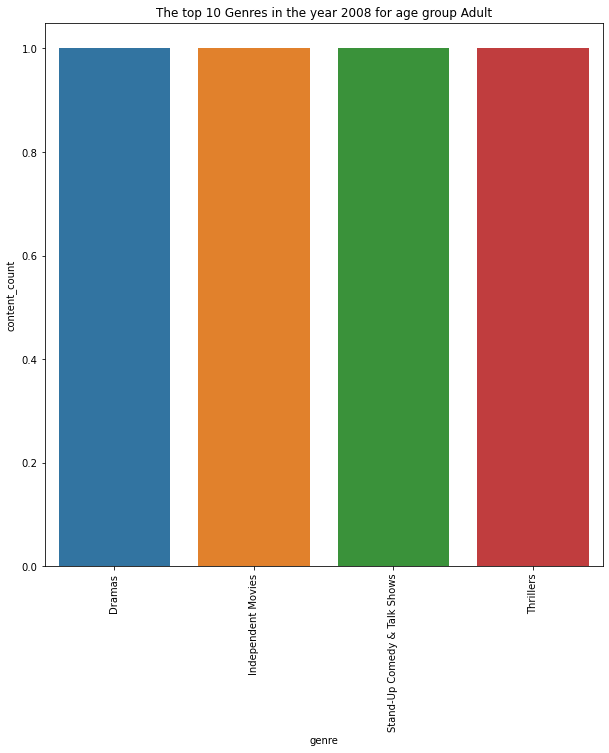

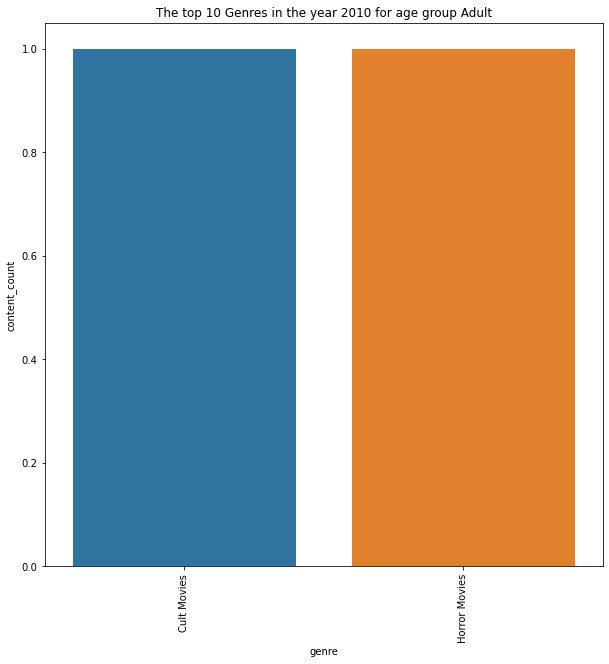

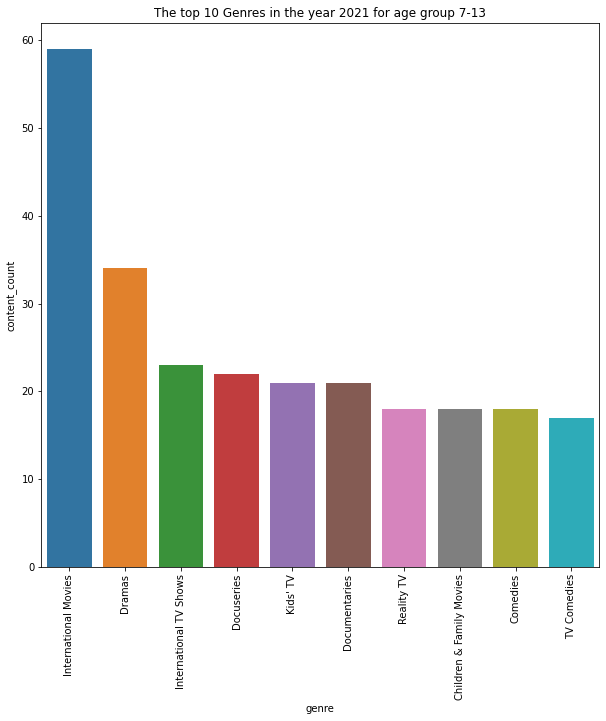

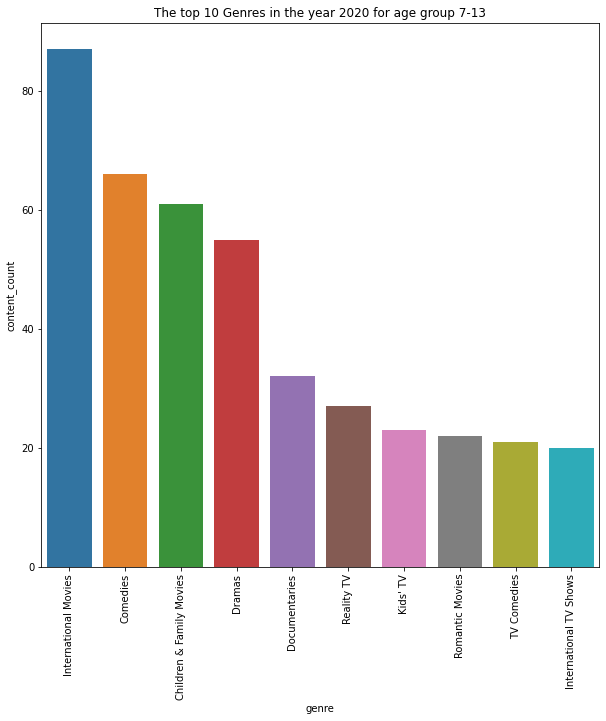

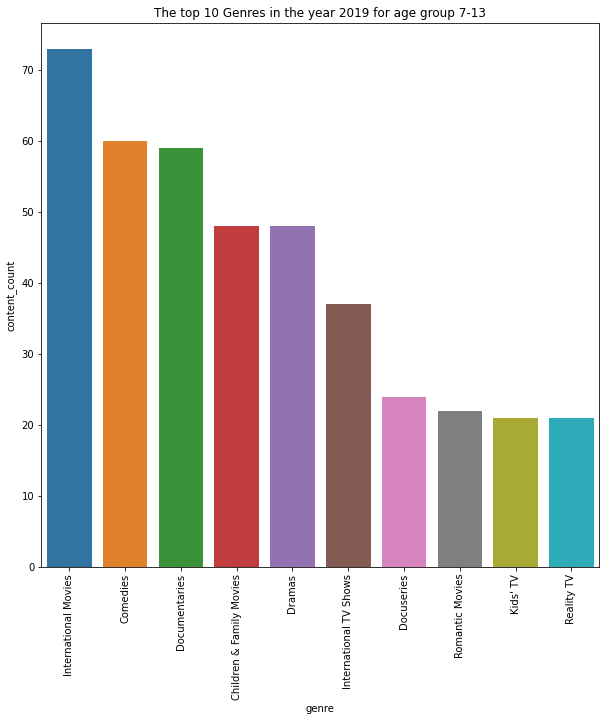

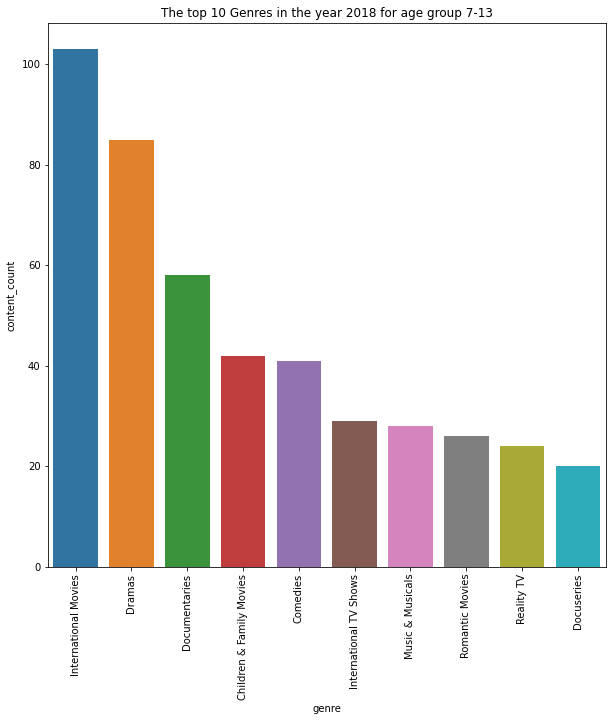

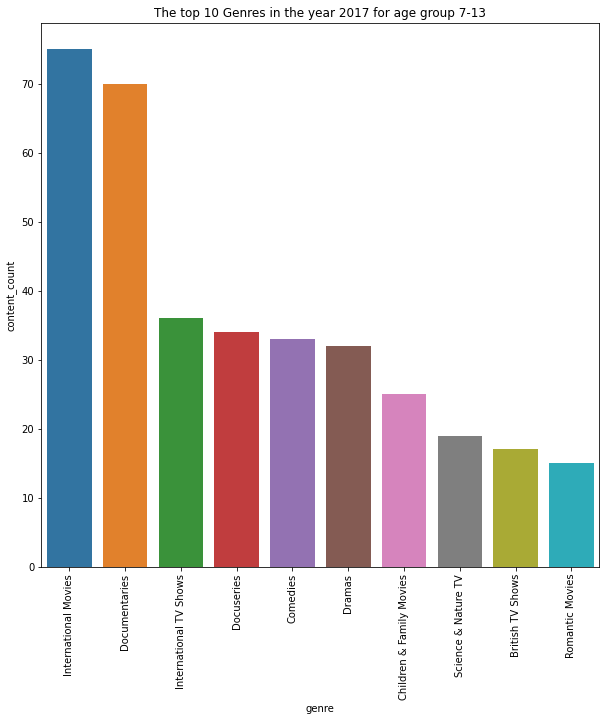

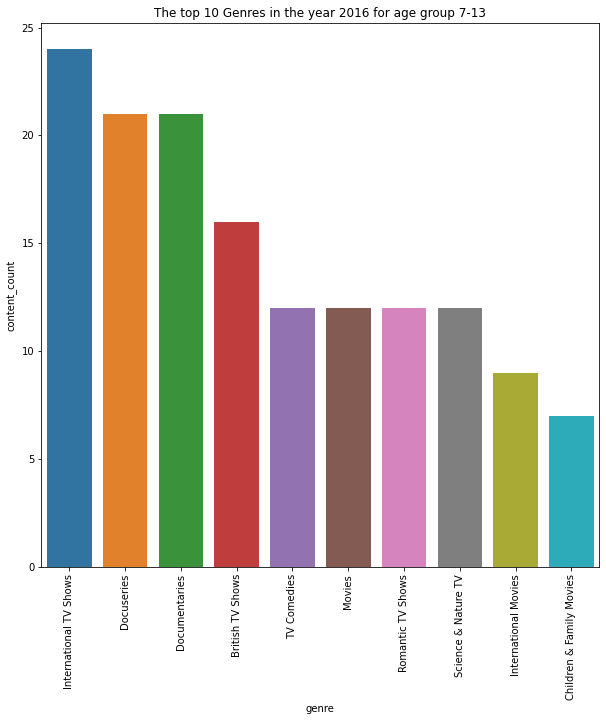

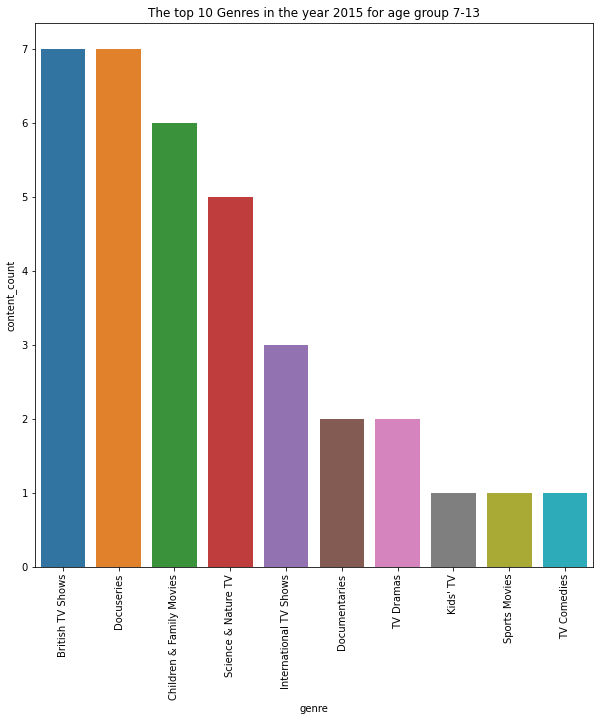

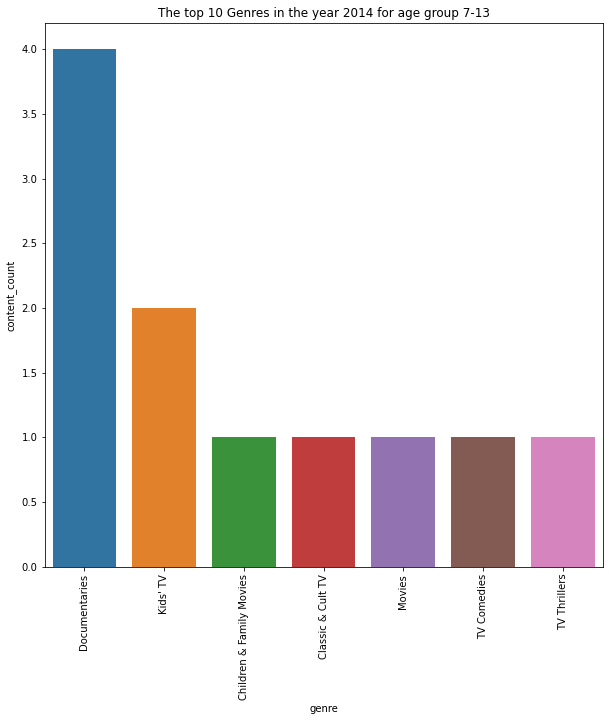

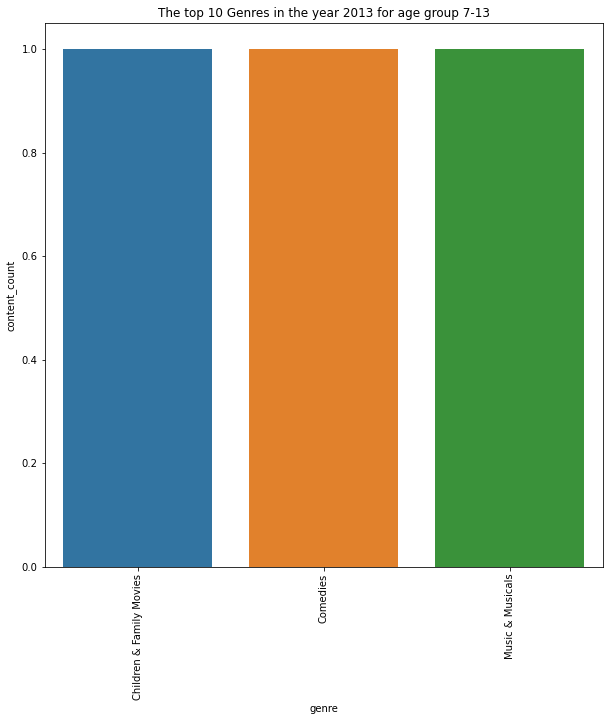

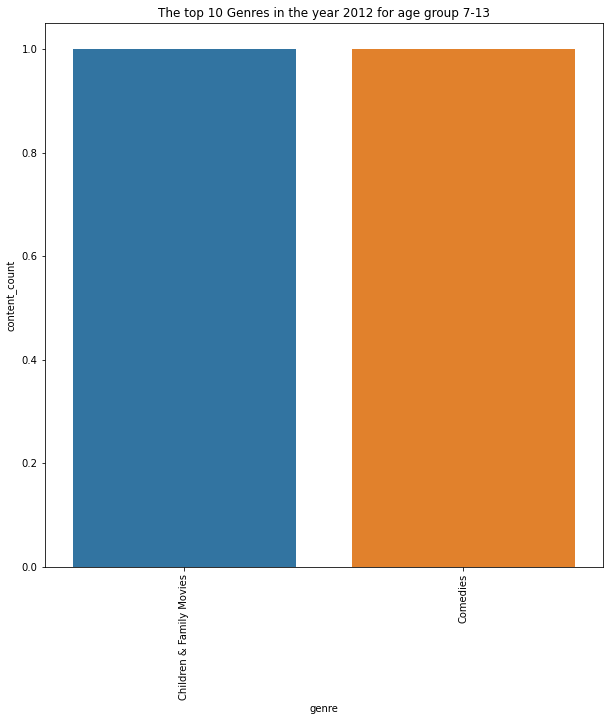

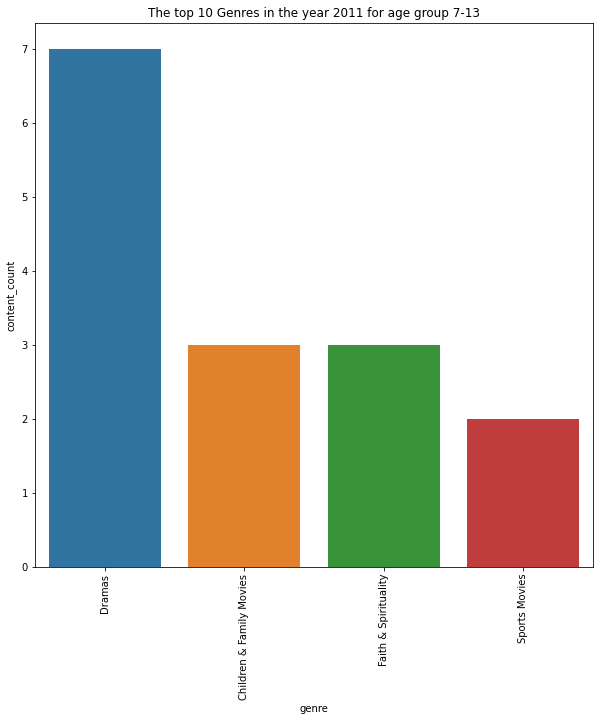

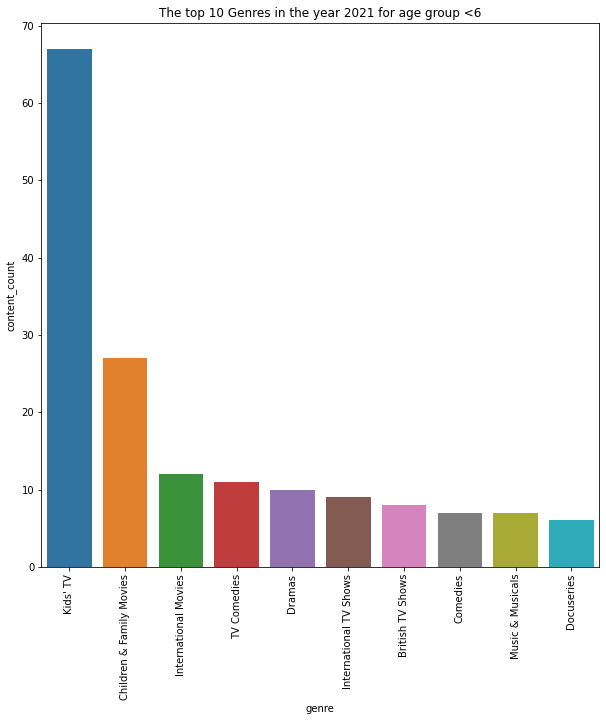

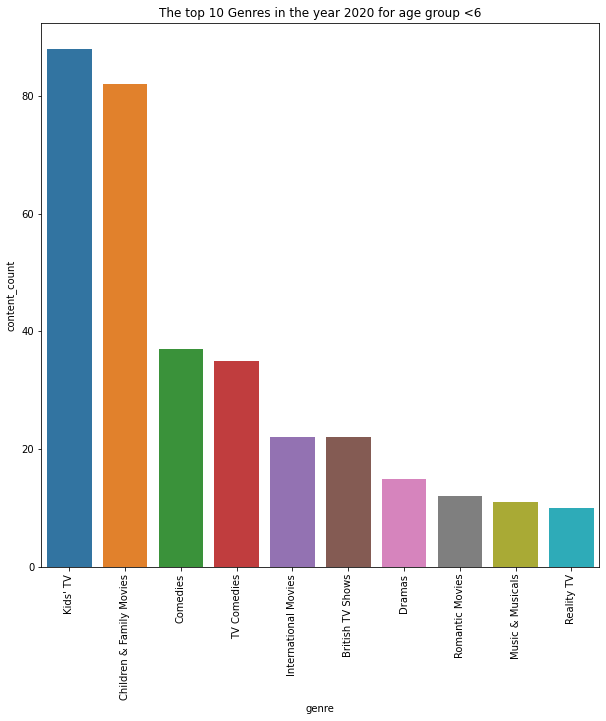

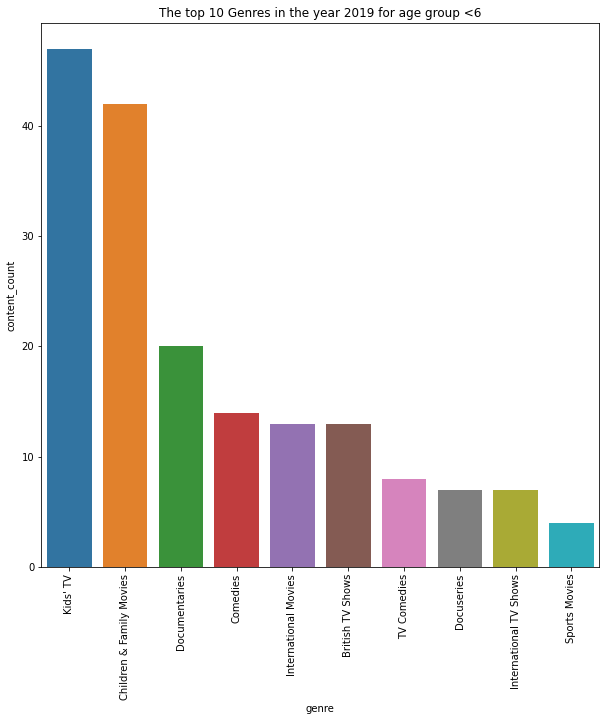

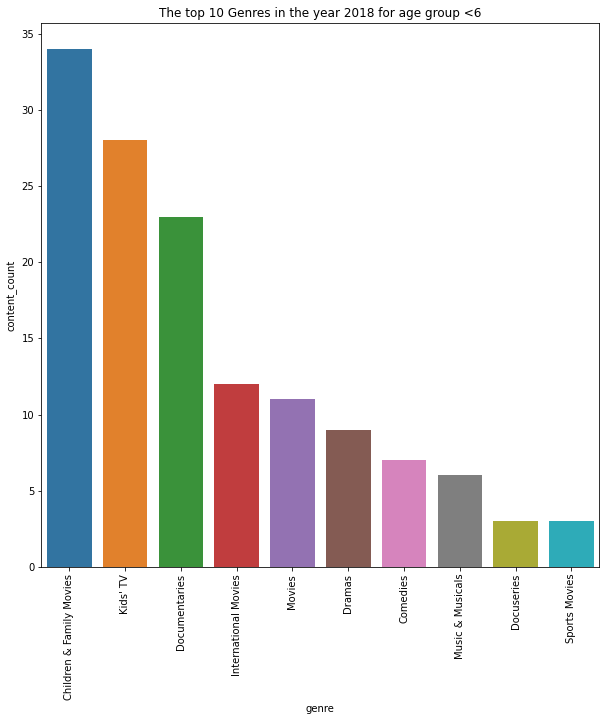

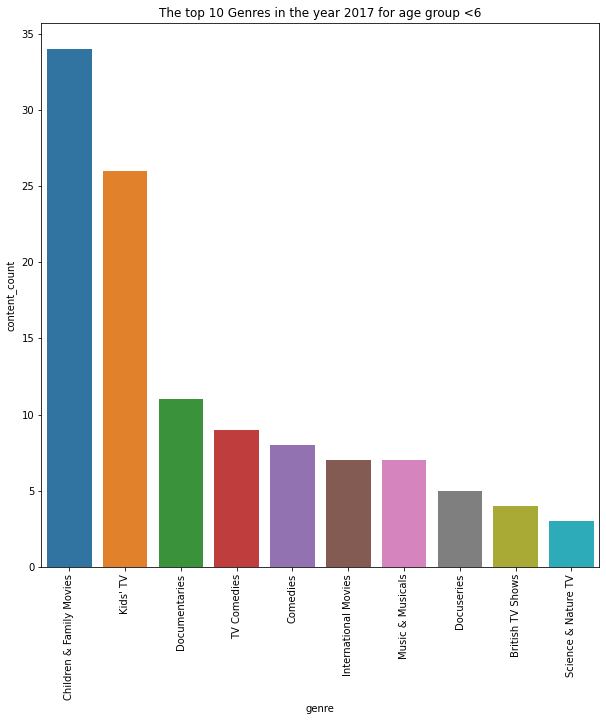

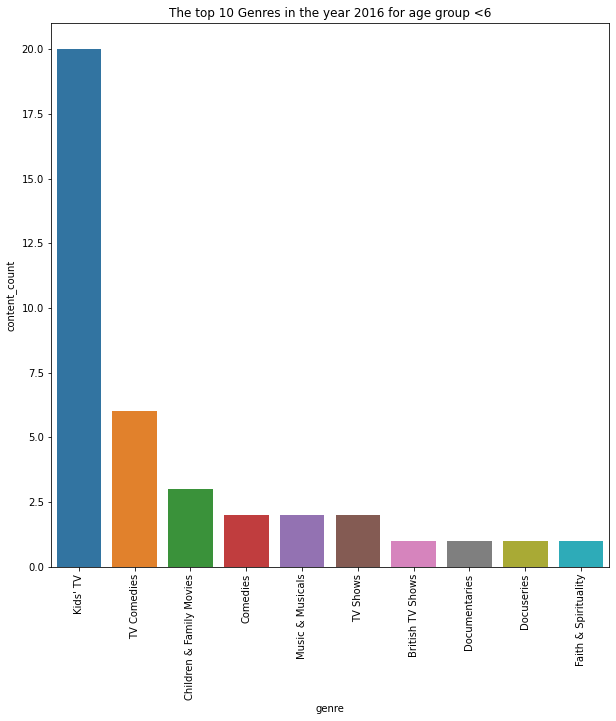

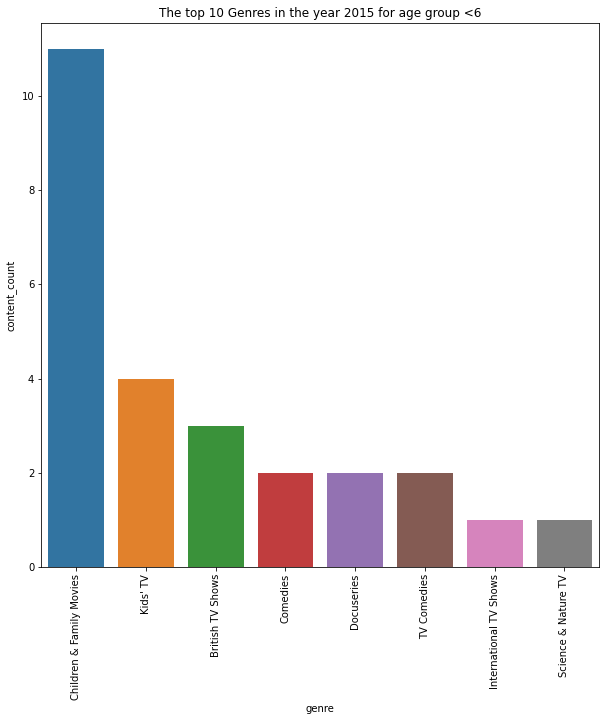

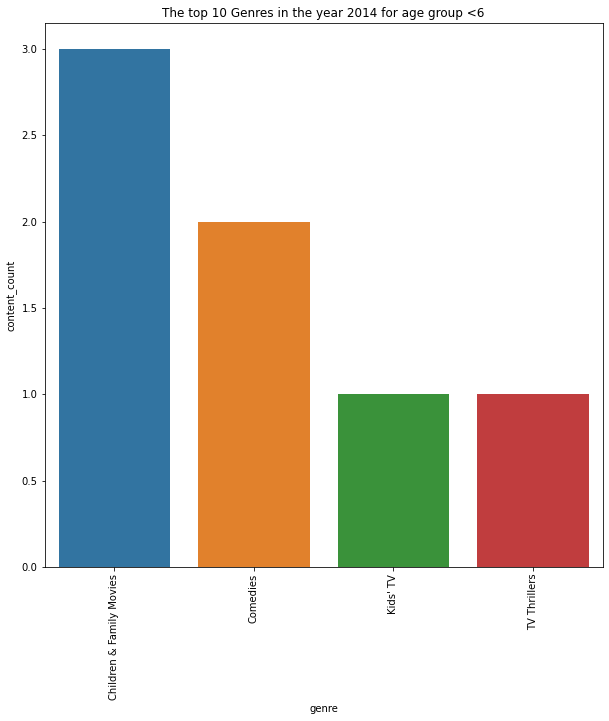

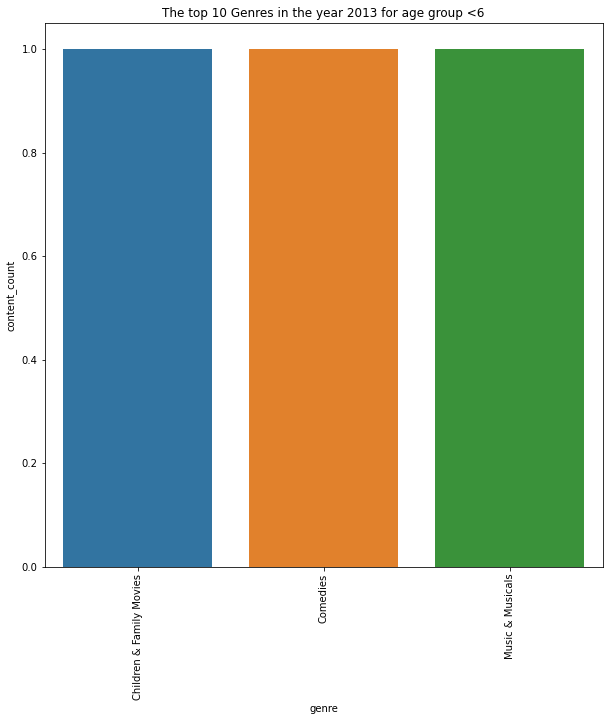

In [36]:
# Understanding the top 10 Genres for ech year for each age group over the years
ageg = []
year = []
genres = []
z11 = data.dropna(subset = ["date_added"])
for j in data4["agegroup"].unique() :
    for i in z11["date_added"].dt.year.unique():
        z12 = data4.loc[(data4["date_added"].dt.year == i) & (data4["agegroup"] == j), ["show_id","genre","country"]].drop_duplicates()
        if len(z12) > 0:
            z13 = z12.groupby("genre").aggregate(content_count = ("show_id","count")).sort_values("content_count", ascending = False).reset_index()
            plt.figure(figsize = (10,10))
            sns.barplot(x = z13["genre"][0:10], y = z13["content_count"][0:10])
            plt.xticks(rotation = 90)
            plt.title(f"The top 10 Genres in the year {i} for age group {j}")
            plt.show()
            ageg.append(j)
            year.append(i)
            genres.append(z13["genre"][0:10].values)
            genres
top10genre = pd.DataFrame([ageg, year, genres]).T  
top10genre.columns = ["age group", "year", "genres"]

In [37]:
#top10genre.to_csv("Top 10 Genres.csv")

In [38]:
# Understanding the top 10 genres for each age group over the years for the country input by the user.

PLease enter the country nameIndia


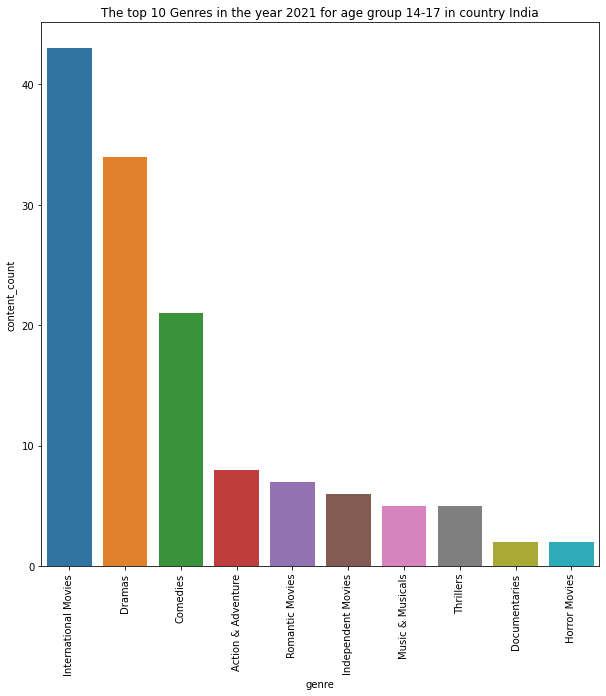

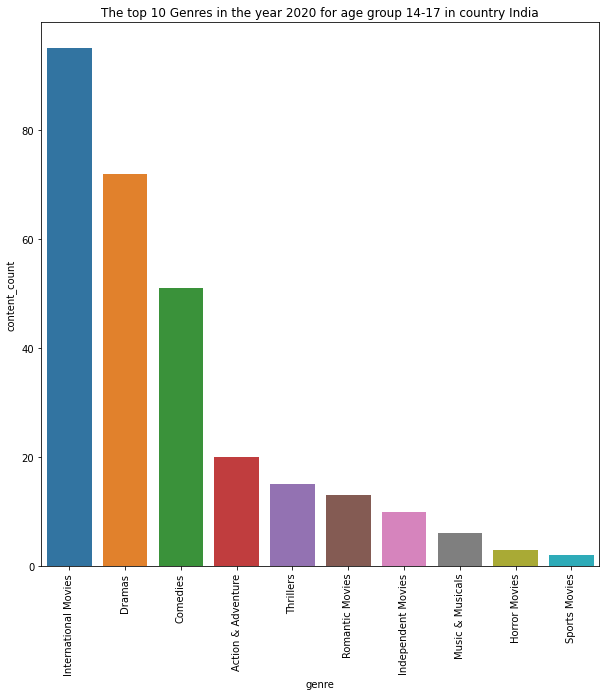

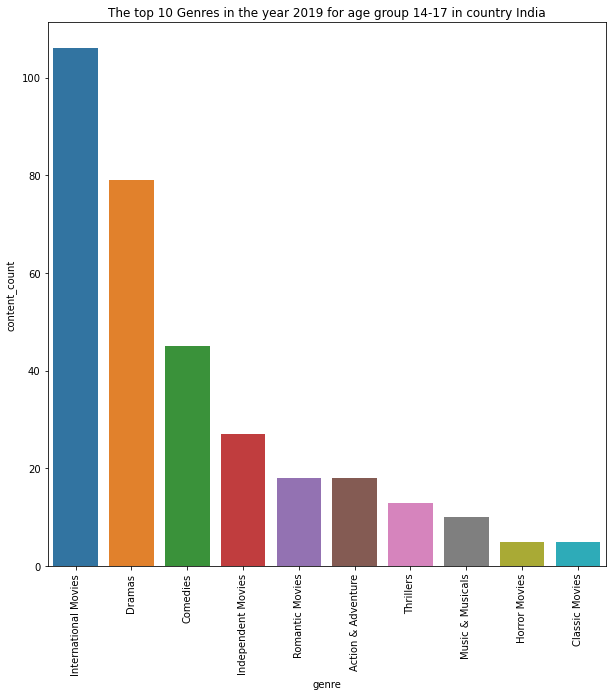

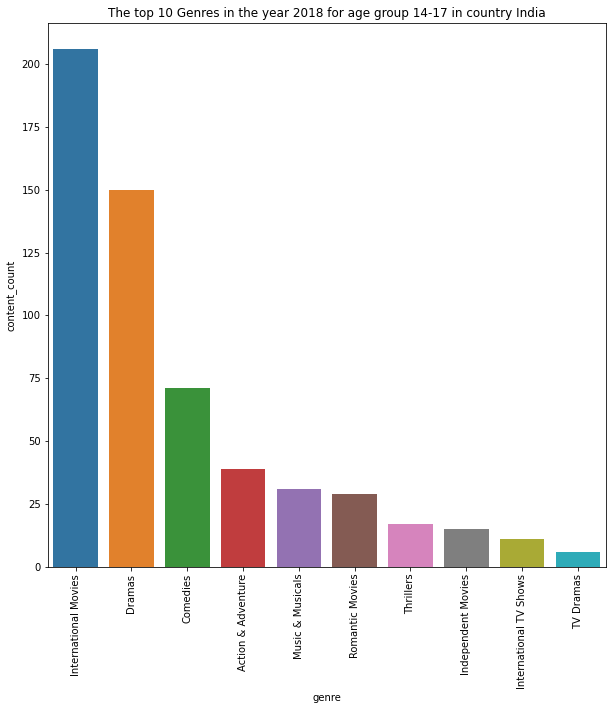

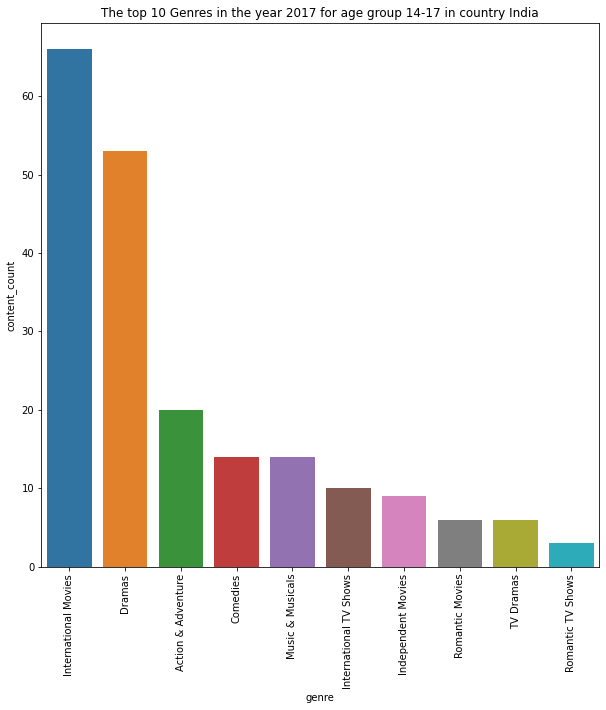

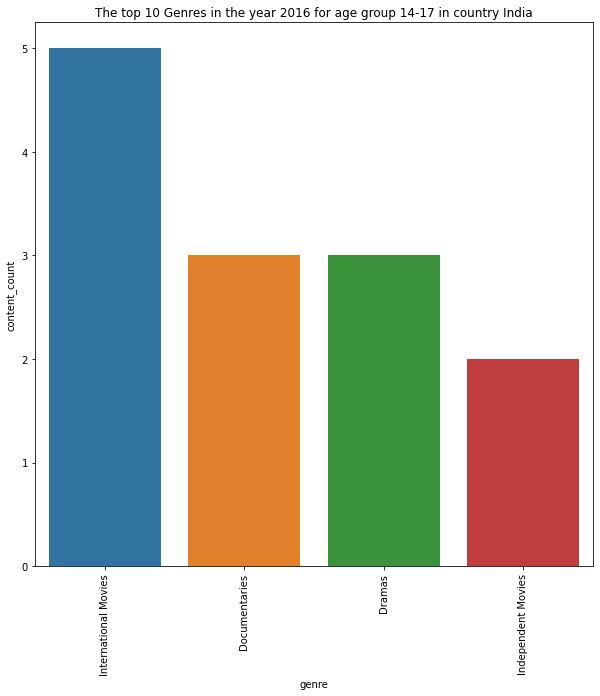

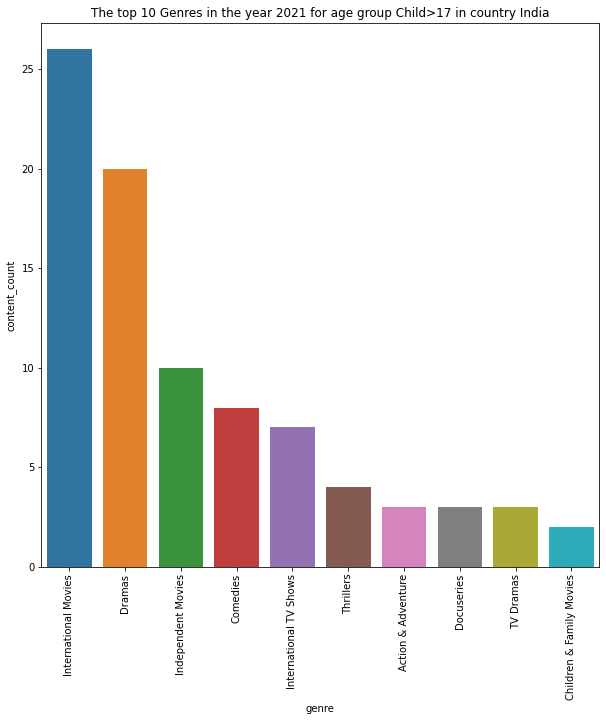

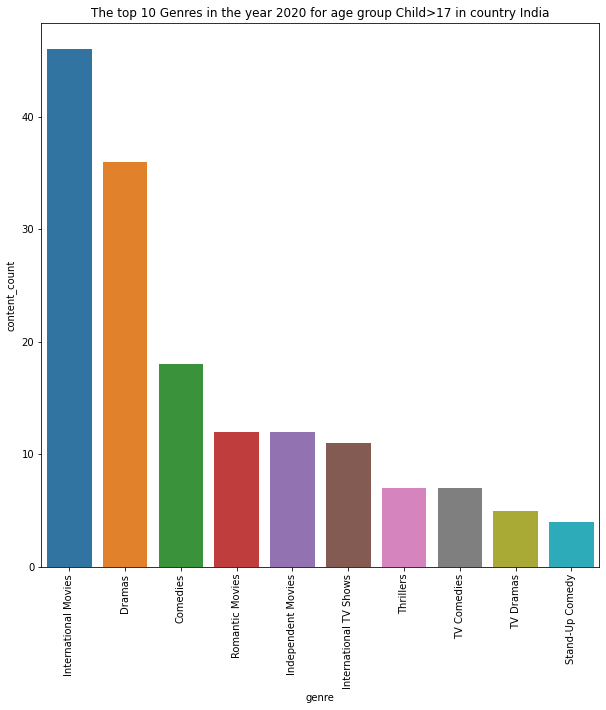

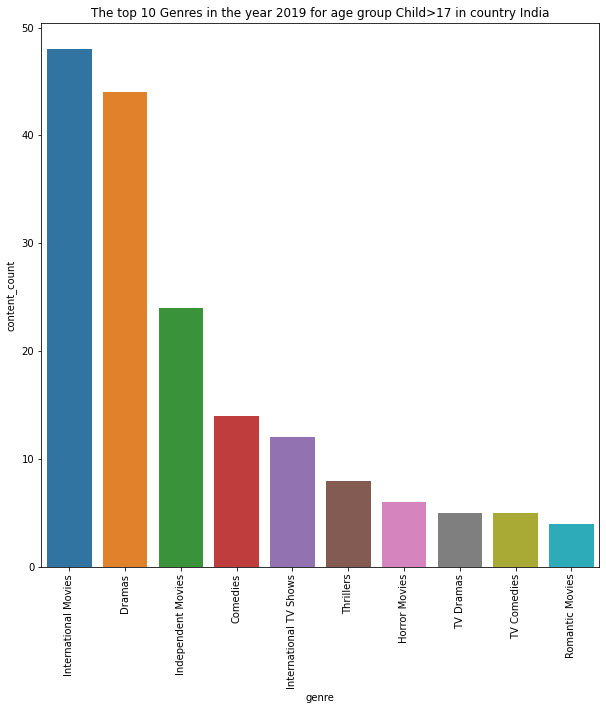

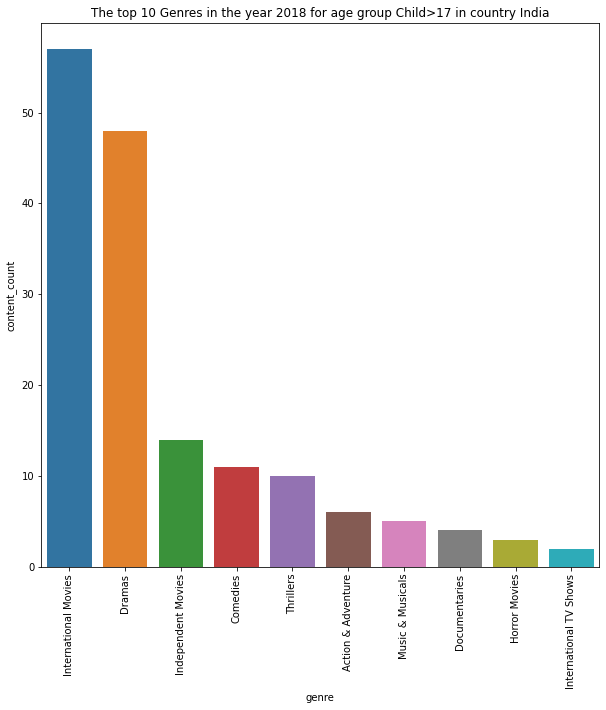

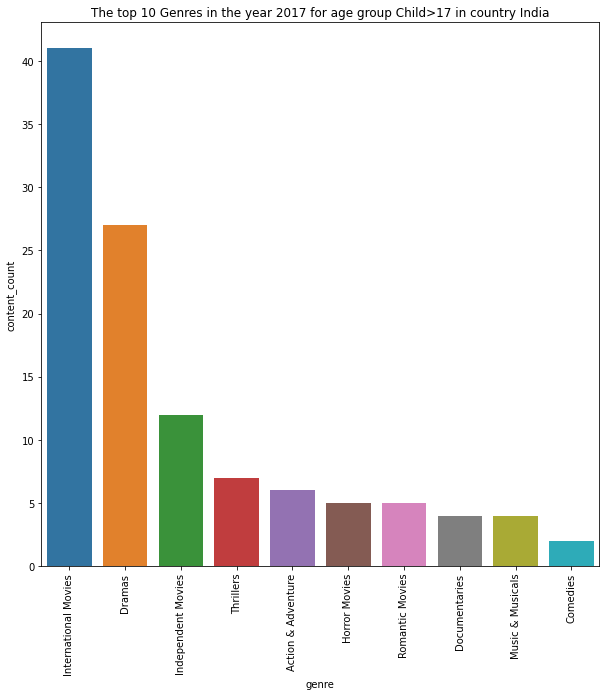

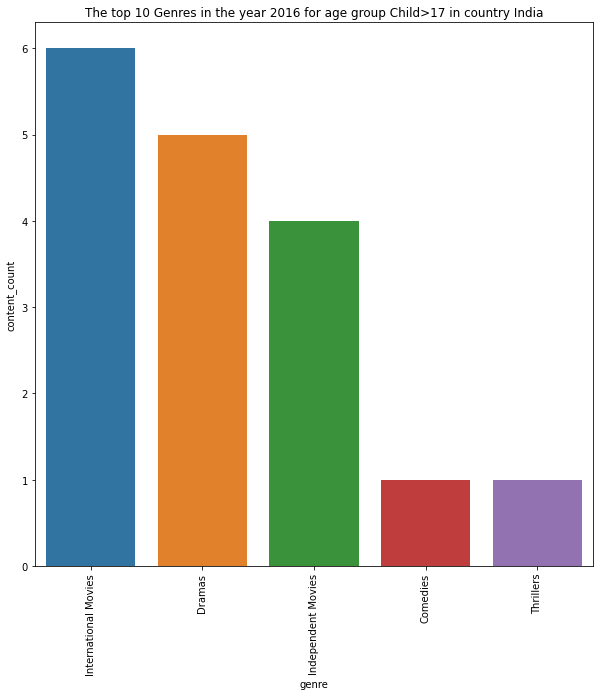

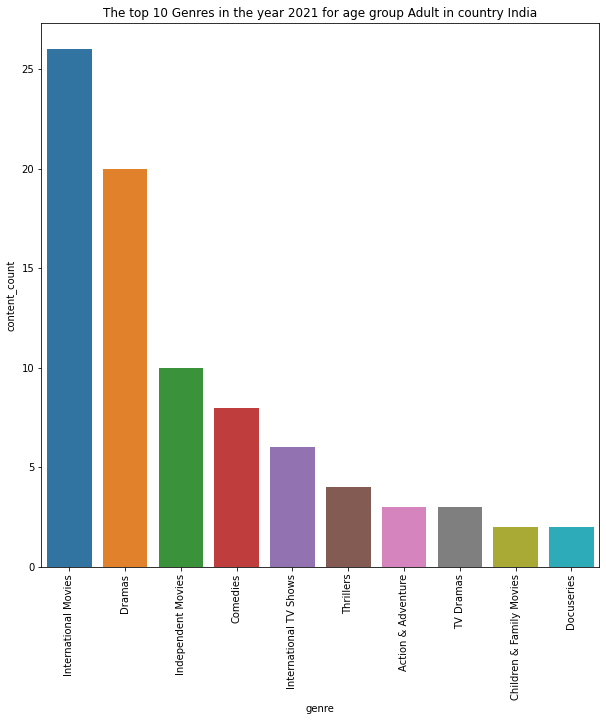

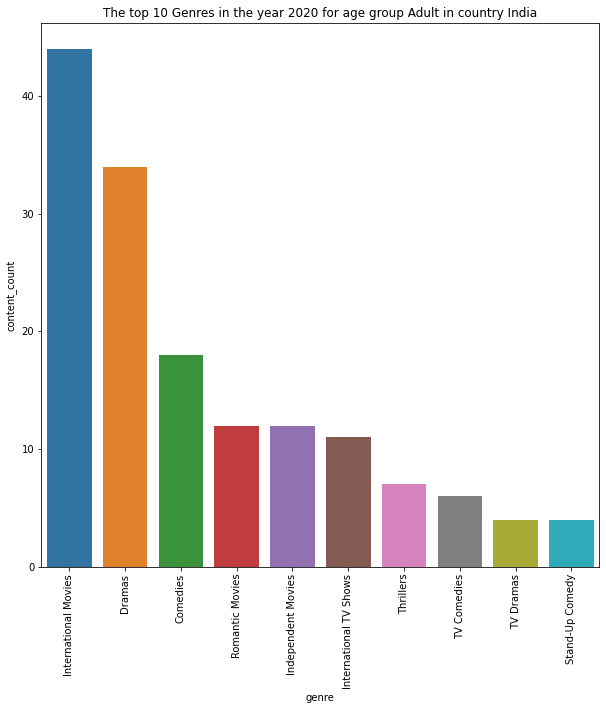

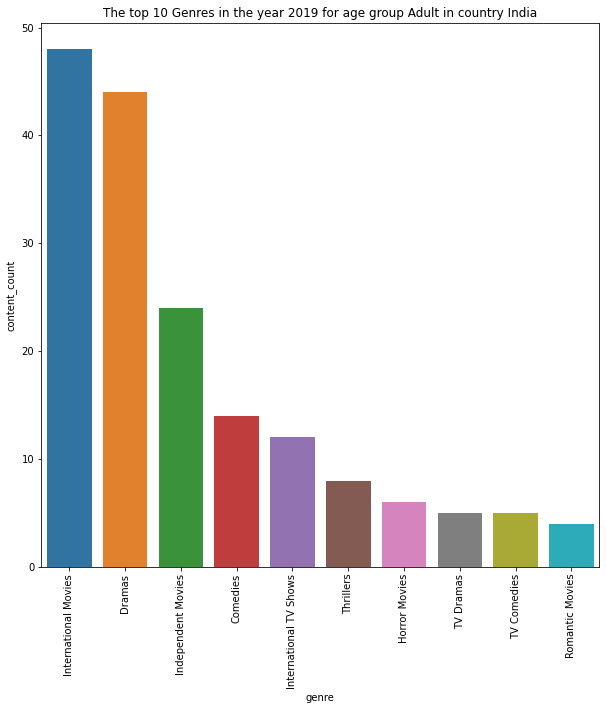

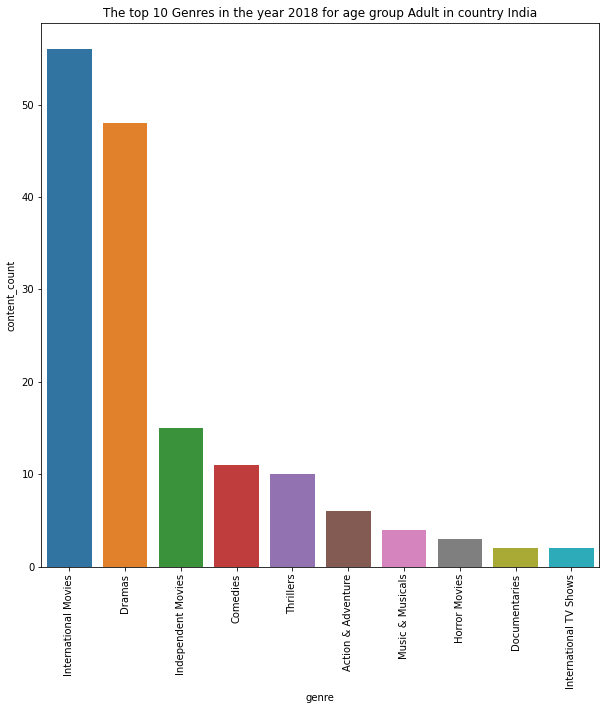

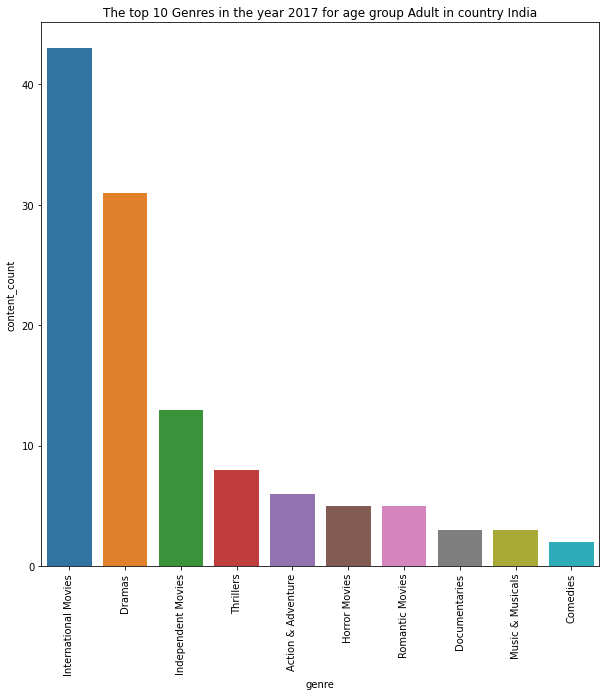

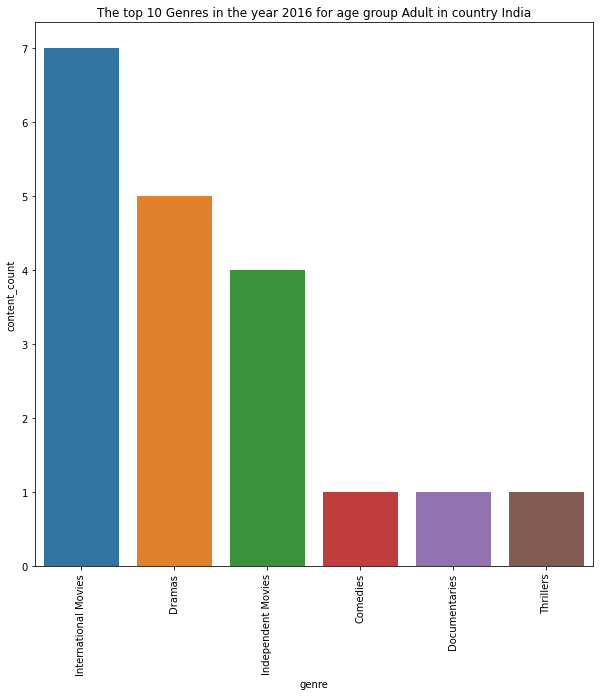

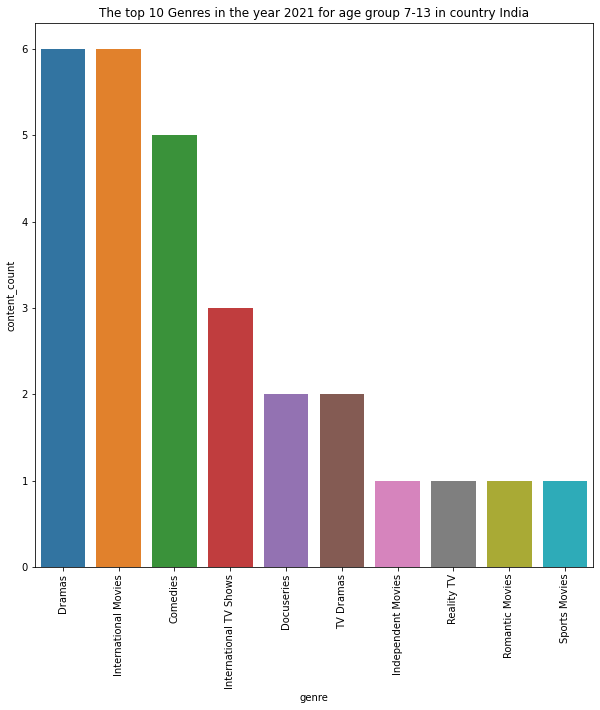

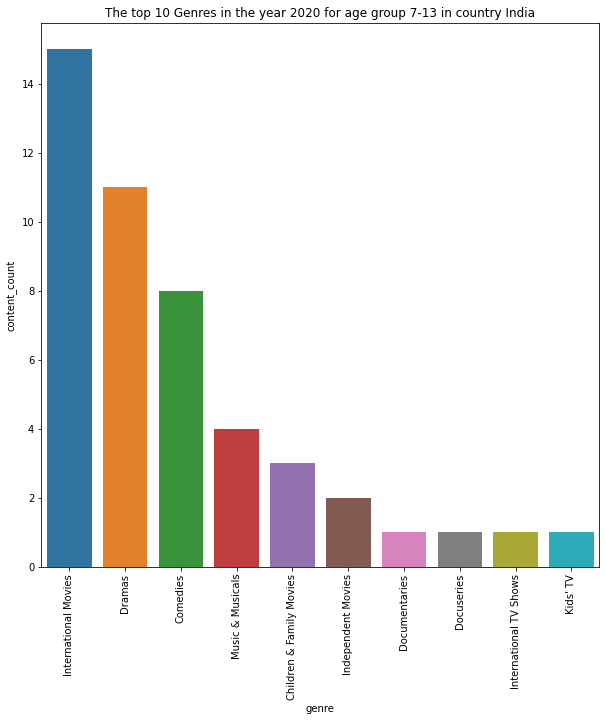

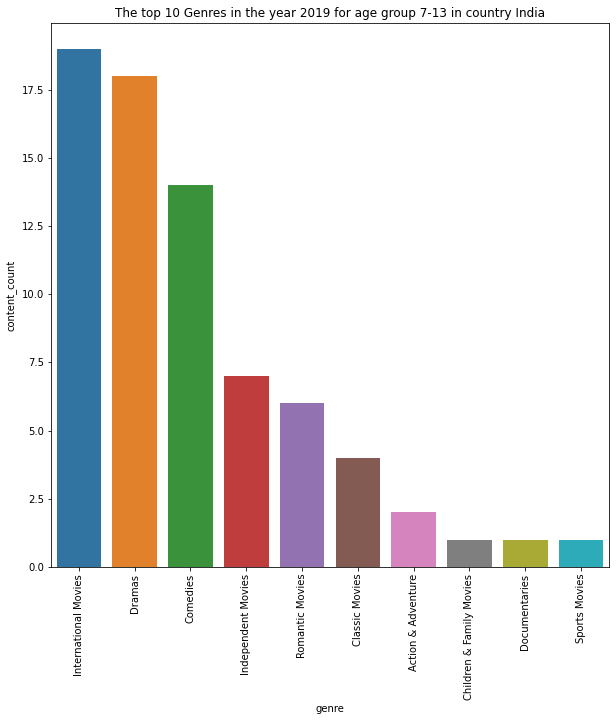

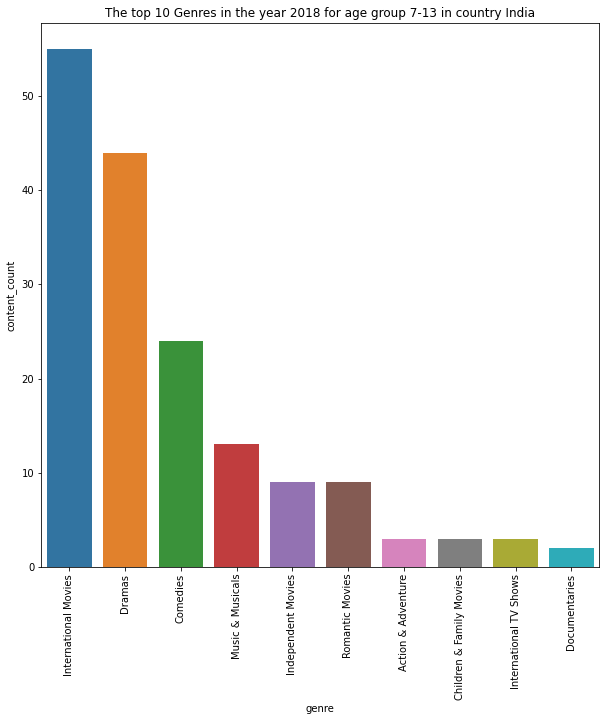

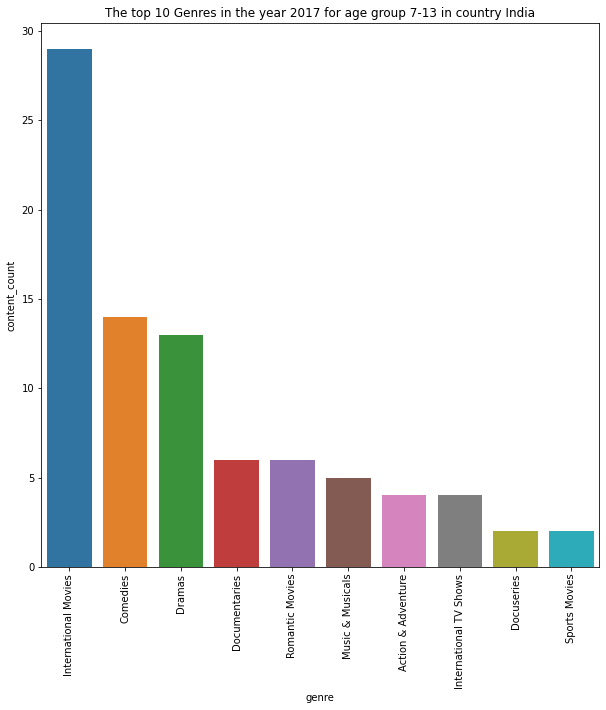

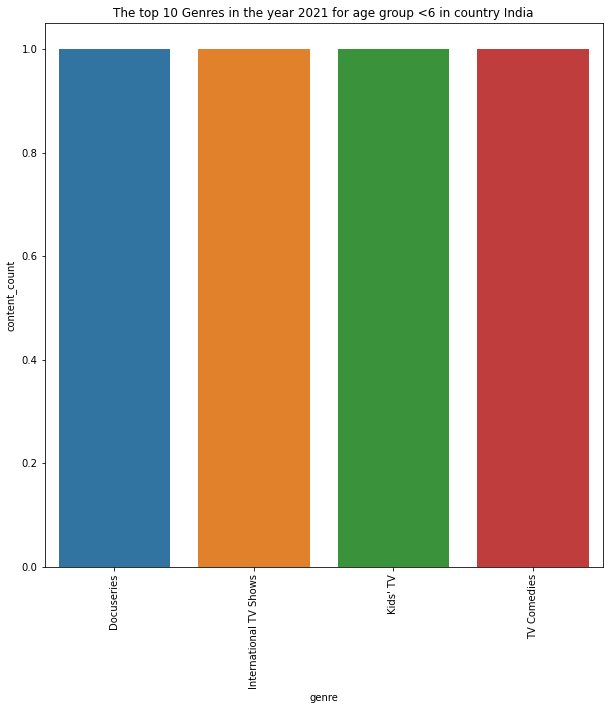

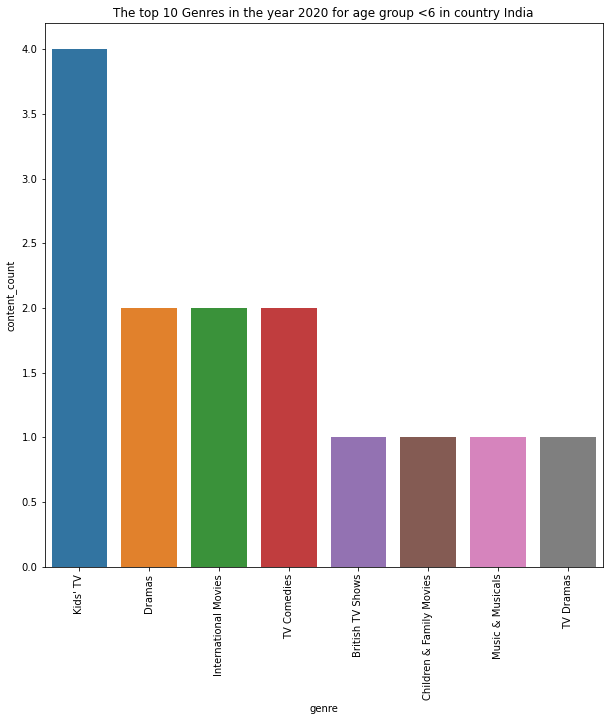

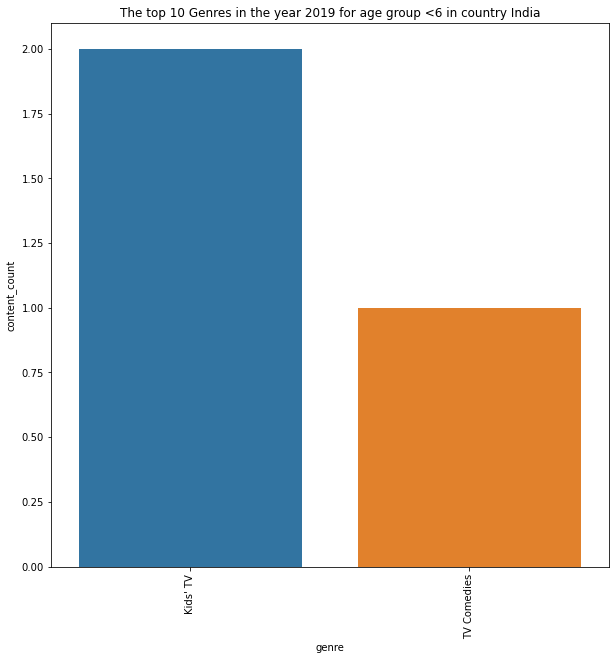

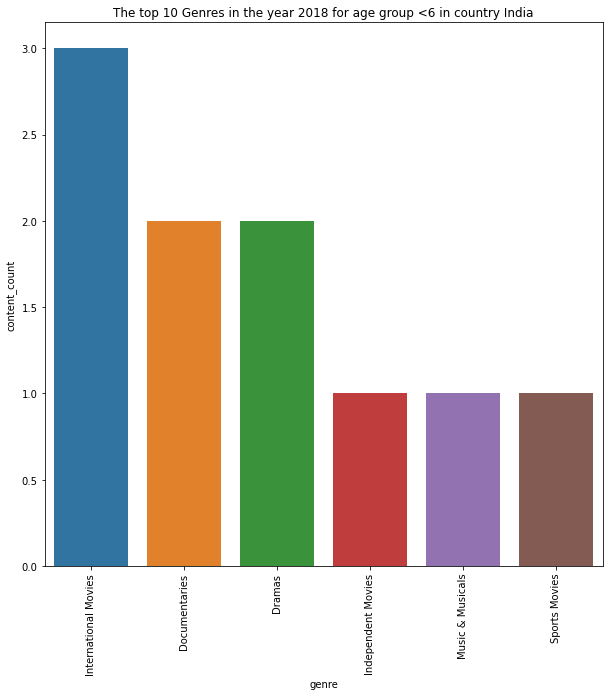

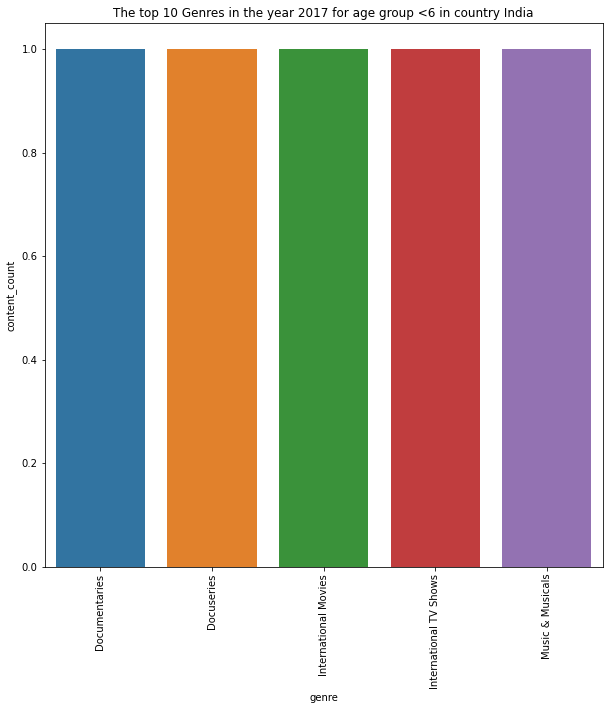

In [39]:
ageg = []
year = []
genres = []
k = input("PLease enter the country name")
d4 = data4.loc[data4["country"] == k, ["show_id","agegroup","genre","date_added"]]
z11 = data.dropna(subset = ["date_added"])
for j in data4["agegroup"].unique() :
    for i in z11["date_added"].dt.year.unique():
        z12 = d4.loc[(d4["date_added"].dt.year == i) & (d4["agegroup"] == j), ["show_id","genre"]].drop_duplicates()
        if len(z12) > 0:
            z13 = z12.groupby("genre").aggregate(content_count = ("show_id","count")).sort_values("content_count", ascending = False).reset_index()
            plt.figure(figsize = (10,10))
            sns.barplot(x = z13["genre"][0:10], y = z13["content_count"][0:10])
            plt.xticks(rotation = 90)
            plt.title(f"The top 10 Genres in the year {i} for age group {j} in country {k}")
            plt.show()
            ageg.append(j)
            year.append(i)
            genres.append(z13["genre"][0:10].values)
            genres
top10genre_country = pd.DataFrame([ageg, year, genres]).T  
top10genre_country.columns = ["age group", "year", "genres"]

In [40]:
top10genre_country.to_csv(f"top10genre_{k}.csv")

In [41]:
movie_content = data.loc[data["type"] == "Movie",::].dropna(subset = ["duration"])
tvshow_content = data.loc[data["type"] == "TV Show",::]

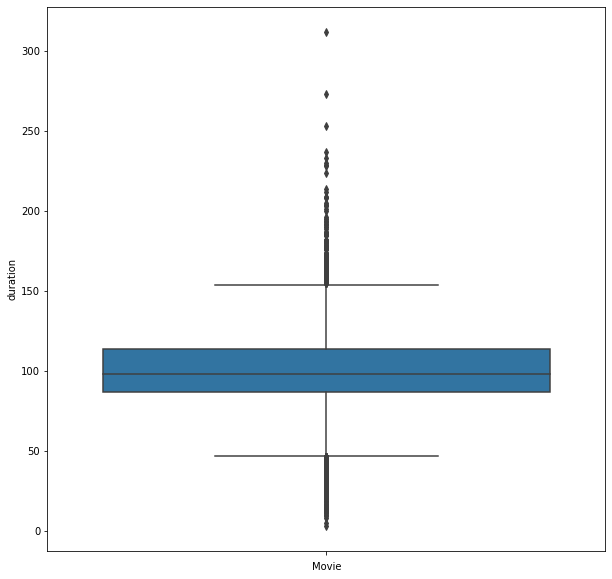

In [42]:
plt.figure(figsize = (10,10))
sns.boxplot(y = movie_content["duration"].astype(int))
plt.xlabel("Movie")
plt.show()

In [43]:
# Identifying all the outliers in the boxplot
per25, per50, per75 = np.quantile(movie_content["duration"].astype(int),[0.25,0.5,0.75])
IQR = per75-per25
upper_whisker = per75 + 1.5*IQR
lower_whisker = per25-1.5*IQR
print(per25, per50, per75,upper_whisker, lower_whisker)
# Observation: 25 percentile, 50 percentile and 75 percentile of the movie distribution are of 87, 98 and 114 minutes respectively.
# Movies which are above 154.5 minutes are outliers and may be called Long Movies
# Movies which are below 46.5 minutes are also outliers and may be considered short movies.
# The movies can be classified into "Short Movies", "Normal Movies" and "Long Movies" based on this and trend can be analyzed
# regarding the short_movies, Normal_movies and Long_movies over the years.  

87.0 98.0 114.0 154.5 46.5


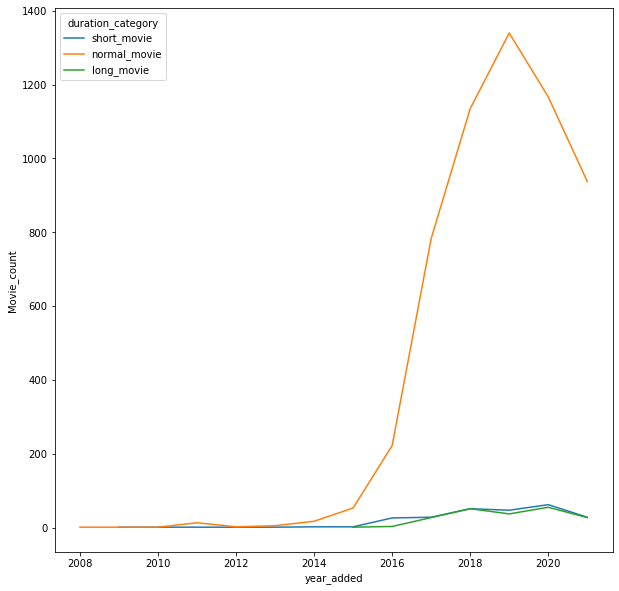

In [44]:
movie_content["duration_category"] = list(map(lambda x: "short_movie" if x < 46.5 else "normal_movie" if x < 154.5 else "long_movie",movie_content["duration"].astype(int)))
movie_content["year_added"] = movie_content["date_added"].dt.year
z13 = movie_content.groupby(["year_added","duration_category"]).aggregate(content_count = ("show_id","count")).sort_values(["duration_category","year_added"], ascending = [False,False]).reset_index()
plt.figure(figsize = (10,10))
sns.lineplot(x = z13["year_added"], y = z13["content_count"], hue = z13["duration_category"])
plt.ylabel("Movie_count")
plt.show()

In [45]:
z13

,year_added,duration_category,content_count
0,2021,short_movie,28
1,2020,short_movie,62
2,2019,short_movie,47
3,2018,short_movie,51
4,2017,short_movie,28
5,2016,short_movie,26
6,2015,short_movie,2
7,2014,short_movie,2
8,2013,short_movie,1
9,2012,short_movie,1


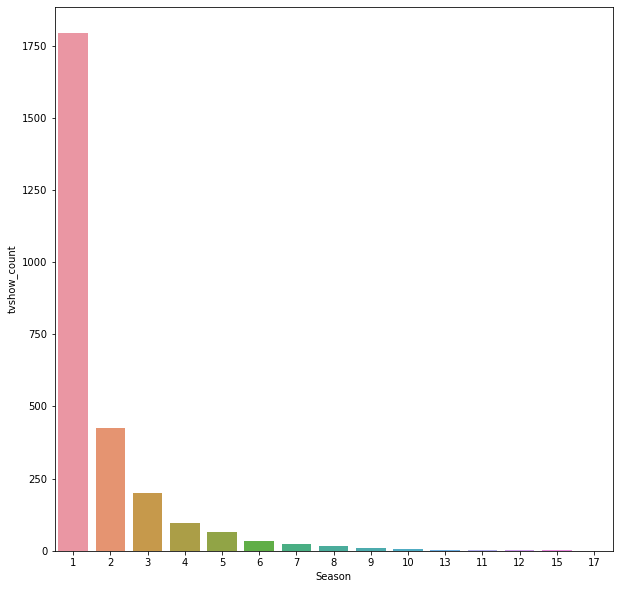

In [46]:
z16 = tvshow_content.groupby("duration").aggregate(tvshow_count = ("show_id","count")).sort_values("tvshow_count",ascending = False).reset_index()
plt.figure(figsize = (10,10))
ax = sns.barplot(x = z16["duration"], y = z16["tvshow_count"])
plt.xlabel("Season")
plt.show()

In [47]:
movie_content["month_added"]=movie_content["date_added"].dt.month_name()
movie_content["day_added"]= movie_content["date_added"].dt.day_name()
movie_content

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_category,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",normal_movie,2021,September,Saturday
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,normal_movie,2021,September,Friday
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",normal_movie,2021,September,Friday
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,normal_movie,2021,September,Friday
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,normal_movie,2021,September,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,normal_movie,2016,March,Wednesday
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",long_movie,2019,November,Wednesday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,normal_movie,2019,November,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",normal_movie,2020,January,Saturday


In [48]:
z19 = movie_content.groupby(["month_added","day_added"]).aggregate(content_count = ("show_id", "count")).sort_values(["month_added","content_count"],\
ascending = [False,False]).reset_index()
z19

,month_added,day_added,content_count
0,September,Friday,129
1,September,Wednesday,109
2,September,Tuesday,70
3,September,Thursday,68
4,September,Saturday,59
...,...,...,...
79,April,Thursday,74
80,April,Saturday,66
81,April,Tuesday,62
82,April,Monday,59


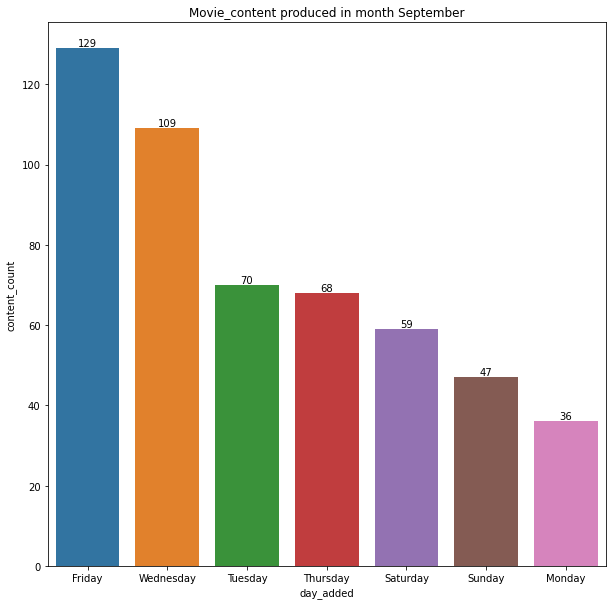

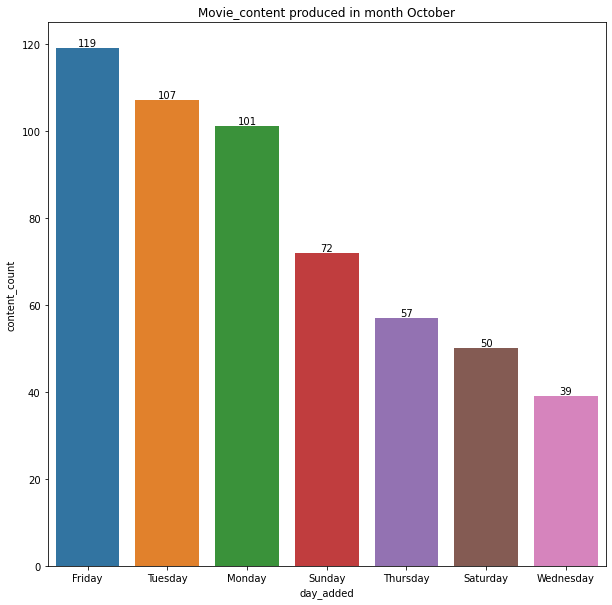

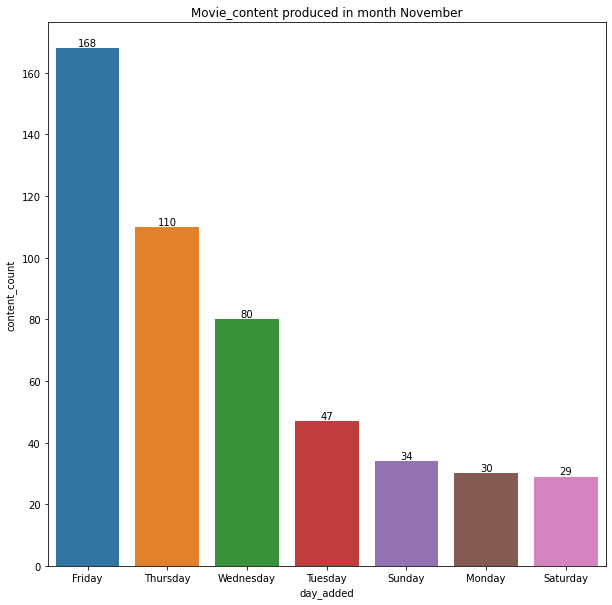

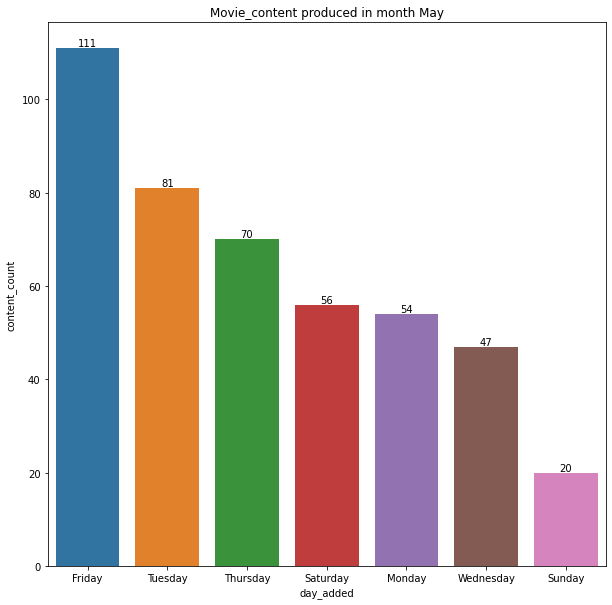

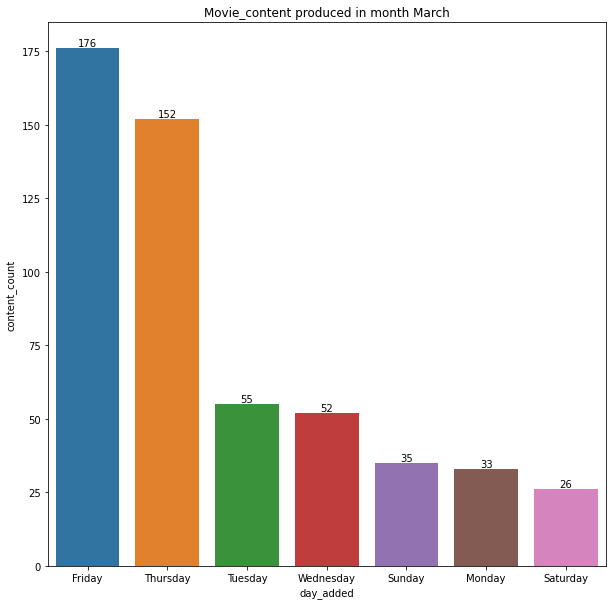

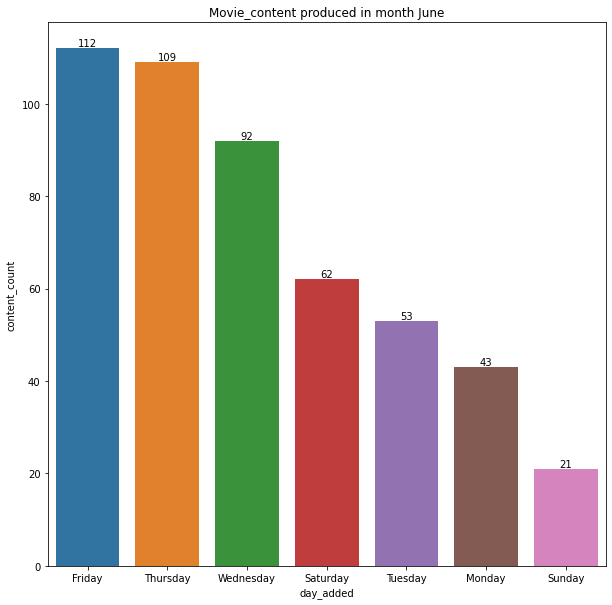

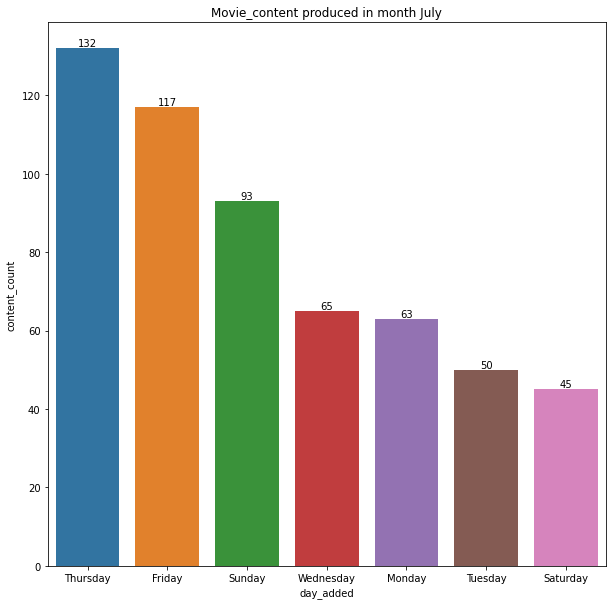

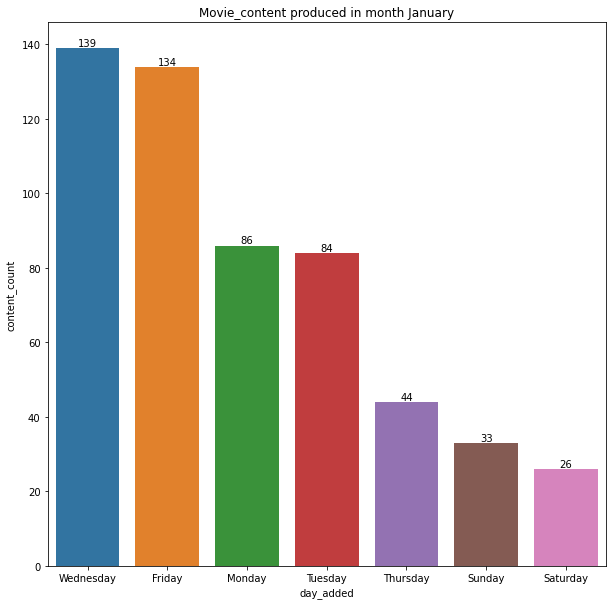

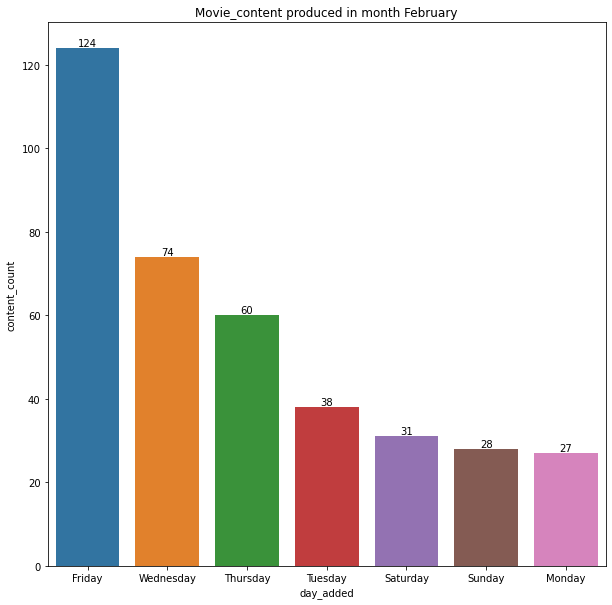

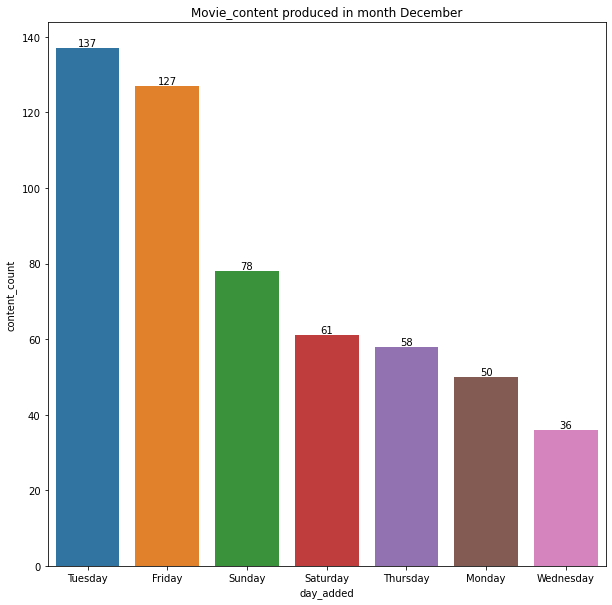

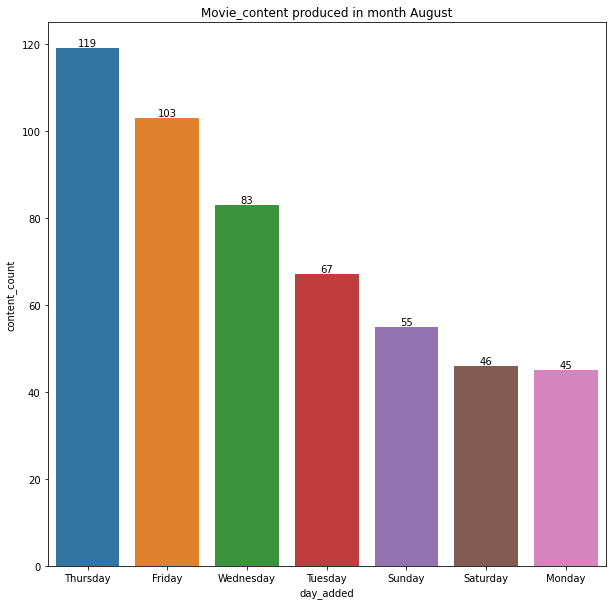

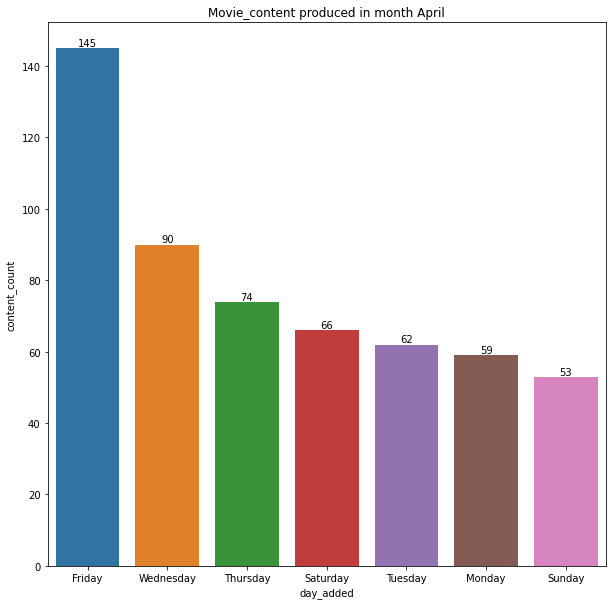

In [49]:
for i in z19["month_added"].unique():
    movie_content_month = z19.loc[z19["month_added"] == i, ::]
    plt.figure(figsize = (10,10))
    ax = sns.barplot(x = movie_content_month["day_added"], y = movie_content_month["content_count"], ci = None)
    plt.bar_label(container = ax.containers[0],label_type='edge')
    plt.title(f"Movie_content produced in month {i}")


Please enter the country nameIndia


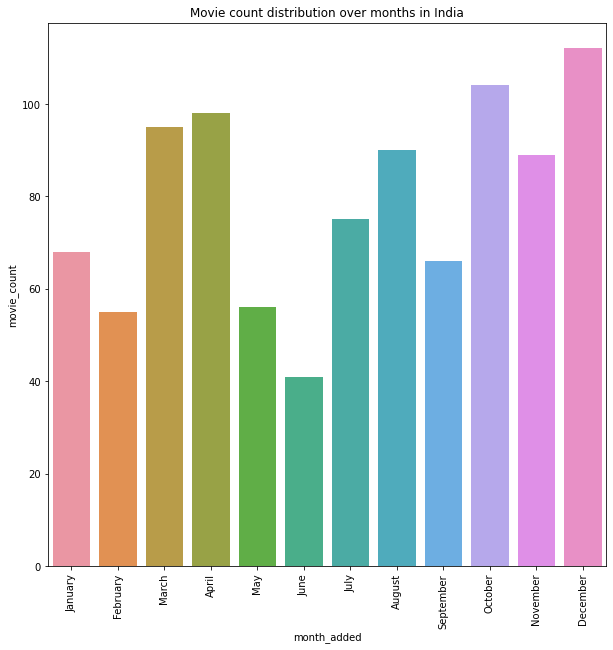

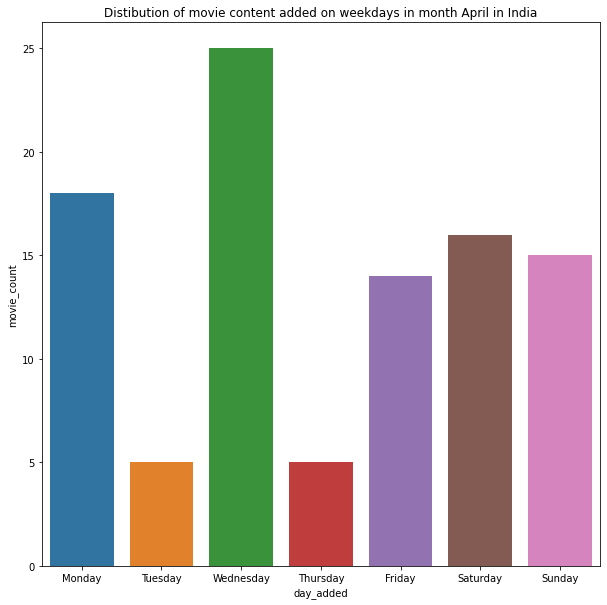

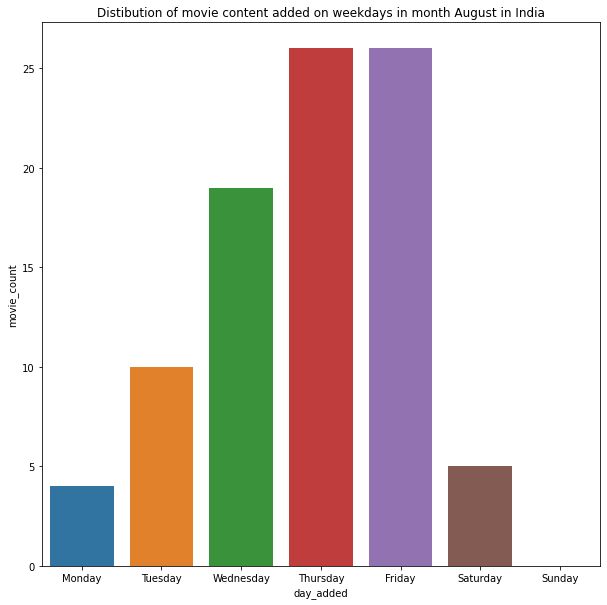

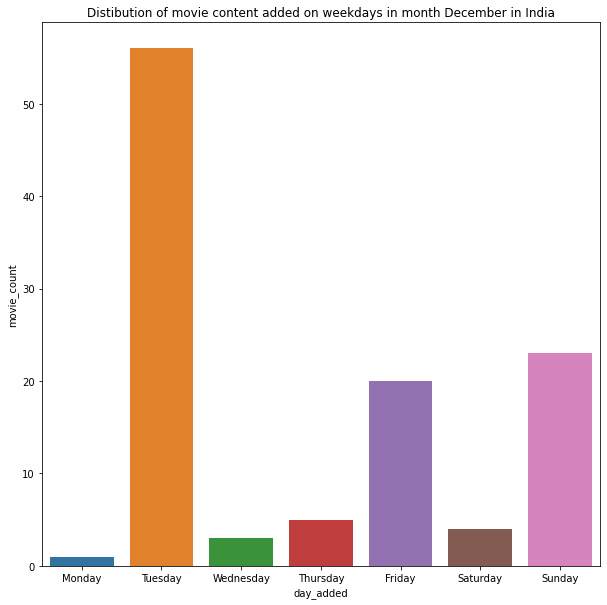

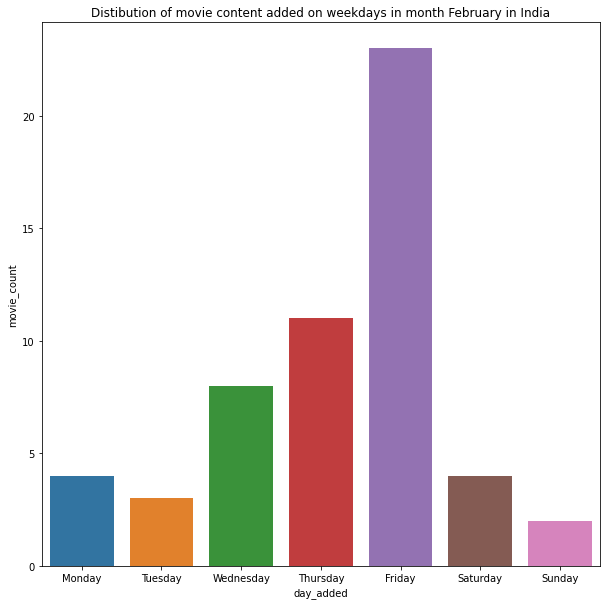

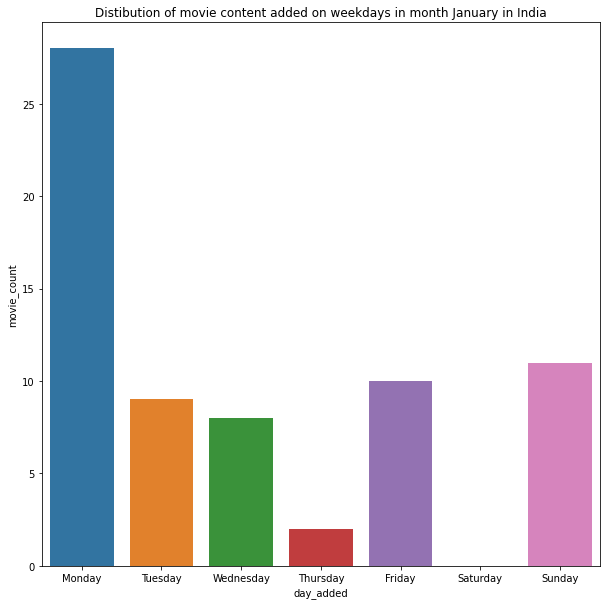

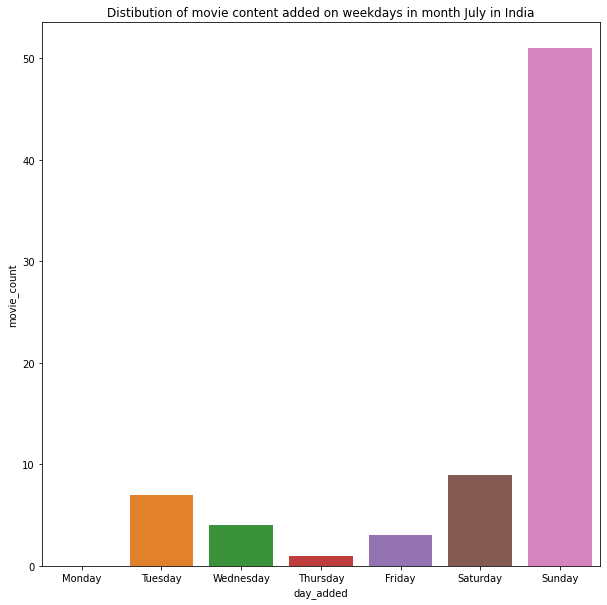

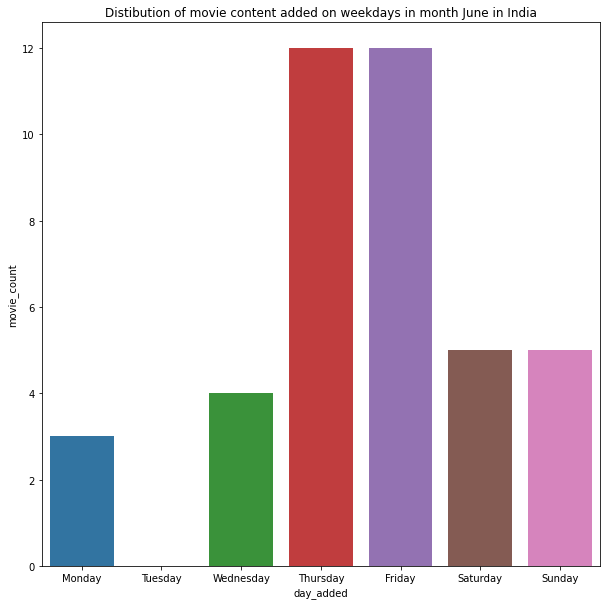

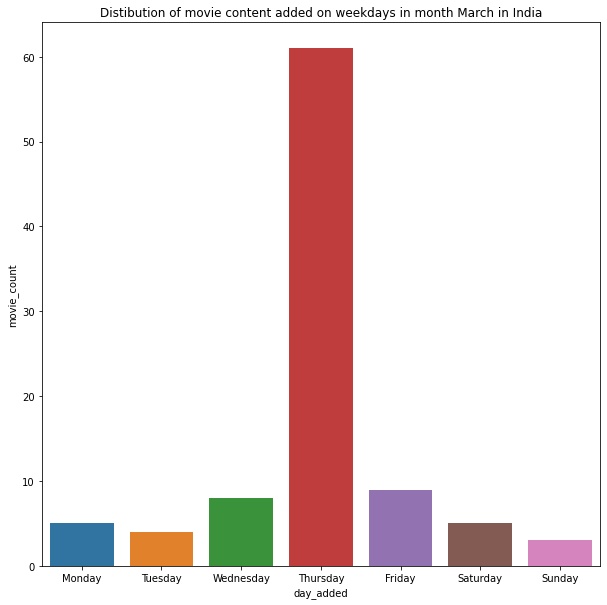

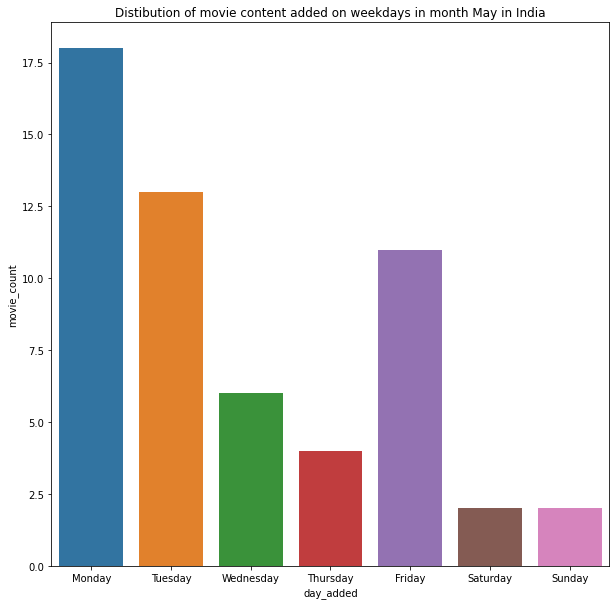

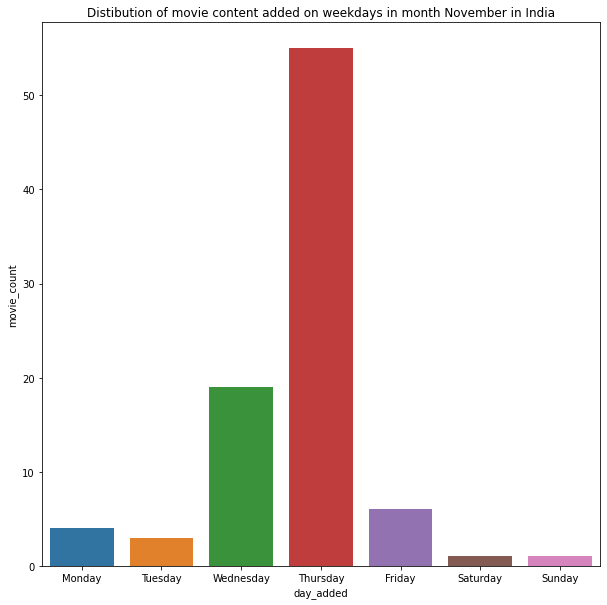

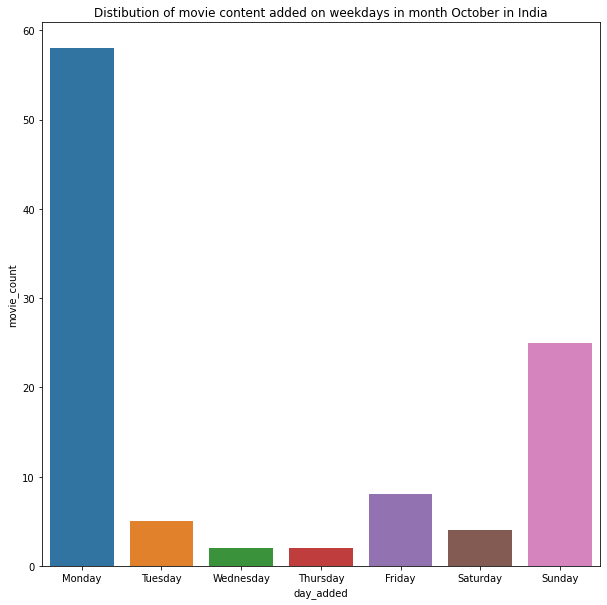

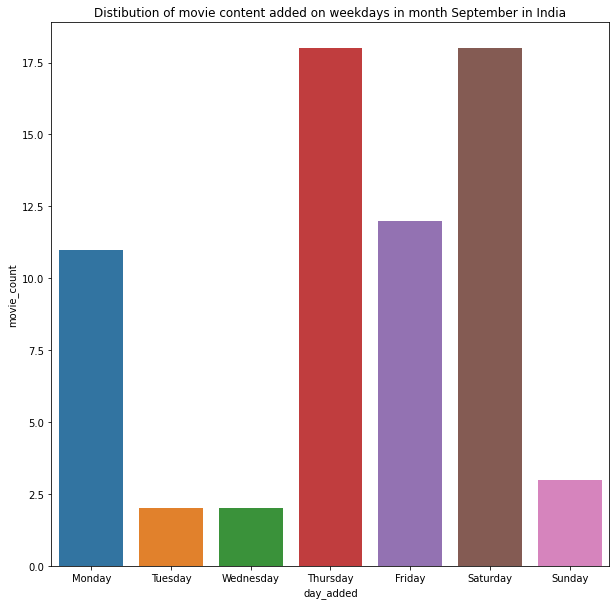

In [50]:
j = input("Please enter the country name")
movie_content = data3.loc[(data3["country"]== j) & (data3["type"] == "Movie"), ["show_id","country","date_added"]].drop_duplicates().reset_index()
tvshow_content = data3.loc[(data3["country"] == j) & (data3["type"]== "TV Show"), ["show_id","country","date_added"]].drop_duplicates().reset_index()
movie_content["month_added"] = movie_content["date_added"].dt.month_name()
movie_content["day_added"] = movie_content["date_added"].dt.day_name()
movie_content["year_added"] = movie_content["date_added"].dt.year
mov_cont_month = movie_content.groupby(["month_added"]).aggregate(movie_count = ("show_id","count")).sort_values(["month_added"])\
            .reset_index()
plt.figure(figsize = (10,10))
sns.barplot(x = mov_cont_month["month_added"], y = mov_cont_month["movie_count"], order = ["January","February","March","April",\
"May", "June", "July", "August", "September", "October", "November", "December"])
plt.xticks(rotation = 90)
plt.title(f"Movie count distribution over months in {j}")
plt.show()
mov_cont_mon = movie_content.groupby(["month_added","day_added"]).aggregate(movie_count = ("show_id","count")).sort_values(["month_added",\
            "day_added"]).reset_index()
for i in mov_cont_mon["month_added"].unique():
    plt.figure(figsize = (10,10))
    sns.barplot(x = mov_cont_mon.loc[mov_cont_mon["month_added"] == i,"day_added"], y = mov_cont_mon.loc[mov_cont_mon["month_added"] == i,"movie_count"], \
                order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ci = 0)
    plt.title(f"Distibution of movie content added on weekdays in month {i} in {j}")
    plt.show()

In [51]:
tvshow_actor = []
movie_actor = []
country = []
for i in data5["country"].unique():
    movie = data5.loc[(data5["country"] == i) & (data5["type"] == "Movie") & (data5["actor"] != "Unknown"),["show_id","actor"]]
    tvshow = data5.loc[(data5["country"] == i) & (data5["type"] == "TV Show") & (data5["actor"] != "Unknown"),["show_id", "actor"]]
    movie_actor.append(movie.groupby("actor").aggregate(movie_count = ("show_id", "count")).sort_values("movie_count", ascending = False).reset_index()["actor"][0:5].tolist())
    tvshow_actor.append(tvshow.groupby("actor").aggregate(tvshow_count = ("show_id", "count")).sort_values("tvshow_count", ascending = False).reset_index()["actor"][0:5].tolist())
    country.append(i)

In [52]:
top_5_actor = pd.DataFrame([country,tvshow_actor,movie_actor]).T
top_5_actor.columns = ["Country", "TV Show top 5 actor", "Movie top 5 actor"]
top_5_actor.to_csv("Top_5_actor.csv")
top_5_actor

,Country,TV Show top 5 actor,Movie top 5 actor
0,United States,"[Mike Colter, David Attenborough, Breanna Yde,...","[Samuel L. Jackson, James Franco, Molly Shanno..."
1,South Africa,"[Cindy Mahlangu, Thabang Molaba, Abdul Khoza, ...","[Deon Lotz, Kagiso Lediga, Tumi Morake, Mikael..."
2,Unknown,"[Frederick Lee, Pemy Peramin Thabkaew, Aenie W...","[Nassar, Shaffy Bello, Alexx Ekubo, Prabhas, S..."
3,India,"[Gagan Arora, Delnaaz Irani, Jitendra Joshi, S...","[Anupam Kher, Naseeruddin Shah, Shah Rukh Khan..."
4,Ghana,[],"[Adjetey Anang, Chris Attoh, Joselyn Dumas, Al..."
...,...,...,...
118,Sudan,[],"[Abdi Sidow Farah, Al Pacino, Armaan Haggio, B..."
119,Panama,[],[Fumio Demura]
120,Uganda,[],[]
121,East Germany,[],"[Denise Nickerson, Dodo Denney, Gene Wilder, J..."


In [53]:
# Getting the actor pairs with highest contents for Movie and TV Show
show_id_1 = []
actor_pair = []
for i in range(len(data)):
    if data.loc[i,"cast"] == "Unknown":
        continue
    for j in range(len(data.loc[i,"cast"].split(','))-1):
        for k in range(j+1, len(data.loc[i,"cast"].split(','))):
            actor_pair.append([data.loc[i,"cast"].split(',')[j].strip().lower(), data.loc[i,"cast"].split(',')[k].strip().lower()])
            show_id_1.append(data.loc[i,"show_id"])
act_pair_data = pd.merge(data5[["show_id","country","type"]].drop_duplicates(),pd.DataFrame(list(zip(show_id_1,actor_pair)), columns = ["show_id","actor_pair"]), on = ["show_id"])
act_pair_data

,show_id,country,type,actor_pair
0,s8,United States,Movie,"[kofi ghanaba, oyafunmike ogunlano]"
1,s8,United States,Movie,"[kofi ghanaba, alexandra duah]"
2,s8,United States,Movie,"[kofi ghanaba, nick medley]"
3,s8,United States,Movie,"[kofi ghanaba, mutabaruka]"
4,s8,United States,Movie,"[kofi ghanaba, afemo omilami]"
...,...,...,...,...
367144,s8511,Ukraine,TV Show,"[sergey leskov, aleksey zorin]"
367145,s8511,Ukraine,TV Show,"[sergey leskov, taras gotovtsev]"
367146,s8511,Ukraine,TV Show,"[stanislav moskvin, aleksey zorin]"
367147,s8511,Ukraine,TV Show,"[stanislav moskvin, taras gotovtsev]"


In [54]:
country4 = []
act_pair_top = []
tvact_pair_top = []
for j in act_pair_data["country"].unique():
    mov_cont = act_pair_data.loc[(act_pair_data["country"] == j) & (act_pair_data["type"] == "Movie"), ::].reset_index()
    tvshow_cont = act_pair_data.loc[(act_pair_data["country"] == j) & (act_pair_data["type"] == "TV Show"), ::].reset_index()
    for i in range(len(mov_cont)):
        mov_cont.loc[i,"actor_pair"] =' and '.join(sorted(mov_cont.loc[i,"actor_pair"]))
    top5_actor_pair = mov_cont.groupby("actor_pair").aggregate(movie_count = ("show_id","count")).sort_values("movie_count", ascending = False).reset_index()
    country4.append(j)
    act_pair_top.append(top5_actor_pair["actor_pair"][0:5].tolist())
    for i in range(len(tvshow_cont)):
        tvshow_cont.loc[i,"actor_pair"] =' and '.join(sorted(tvshow_cont.loc[i,"actor_pair"]))
    top5_actor_pair = tvshow_cont.groupby("actor_pair").aggregate(tv_show_count = ("show_id","count")).sort_values("tv_show_count", ascending = False).reset_index()
    tvact_pair_top.append(top5_actor_pair["actor_pair"][0:5].tolist())    

In [55]:
df17 = pd.DataFrame(list(zip(country4, act_pair_top, tvact_pair_top)), columns = ["Country", "Top 5 Movie_actor_pair", "Top 5 T Show actor pair"])

In [56]:
df17

,Country,Top 5 Movie_actor_pair,Top 5 T Show actor pair
0,United States,"[adam sandler and rob schneider, adam sandler ...","[catherine siachoque and fabián ríos, alice di..."
1,Ghana,"[adjetey anang and joselyn dumas, chris attoh ...",[]
2,Burkina Faso,"[afemo omilami and alexandra duah, afemo omila...",[]
3,United Kingdom,"[eric idle and terry gilliam, eric idle and te...","[michael palin and terry jones, eric idle and ..."
4,Germany,"[lina larissa strahl and lisa-marie koroll, li...","[aaron altaras and alex reid, ivan shvedoff an..."
...,...,...,...
106,Belarus,[],[dmitri davidovich and svetlana tsimokhina]
107,Zimbabwe,"[charmaine mujeri and chimwemwe chipidza, jese...",[]
108,Cyprus,[],"[colin hanks and james adomian, colin hanks an..."
109,Guatemala,"[costanza andrade and juan pablo olyslager, co...",[]
